<a href="https://colab.research.google.com/github/webercg/NLP---Daily-News-for-Stock-Market-Prediction/blob/main/Experimentos_%2B_EDA_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Importação de bibliotecas

In [1]:
#pip install transformers

In [2]:
#pip install lazypredict
#pip install googletrans==4.0.0-rc1
#pip install textblob
#pip install vaderSentiment

In [4]:
#Manipulação de dados
import pandas as pd
import numpy as np

#Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

#Manipulação datas
from datetime import datetime

# Prototipação
from lazypredict.Supervised import LazyClassifier


#Pipeline e pré-process
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


#Models
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier

#Model Tunning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

#Model evaluation
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# 2.0 Leitura dos arquivos

## Leitura de Noticias

In [4]:
dicionario_mes_2021 = {'Jan':'01', 'Fev':'02', 'Mar':'03','Abr':'04', 'Mai':'05', 'Jun':'06','Jul':'07', 'Ago':'08', 'Set':'09','Out':'10', 'Nov':'11', 'Dec':'12'}
dicionario_mes_2020 = {'Jan':'01', 'Fev':'02', 'Mar':'03','Abr':'04', 'Mai':'05', 'Jun':'06','Jul':'07', 'Ago':'08', 'Set':'09','Out':'10', 'Nov':'11', 'Dez':'12'}
dicionario_mes_2022 = {'Jan':'01', 'Fev':'02', 'Mar':'03','Abr':'04', 'Mai':'05', 'Jun':'06'}

In [5]:
df = pd.DataFrame()

for i in dicionario_mes_2020.keys():
    arquivo = "dataset-2020/" + dicionario_mes_2020[i] + "_GoogleNews_Petr_" + i + "-2020.csv"
    df_leitura = pd.read_csv(arquivo, sep='|')
    df = df.append(df_leitura,ignore_index=True)

for i in dicionario_mes_2021.keys():
    arquivo = "dataset-2021/" + dicionario_mes_2021[i] + "_GoogleNews_Petr_" + i + "_21.csv"
    df_leitura = pd.read_csv(arquivo, sep='|')
    df = df.append(df_leitura,ignore_index=True)


for i in dicionario_mes_2022.keys():
    arquivo = "dataset-2022/" + dicionario_mes_2022[i] + "_GoogleNews_Petr_" + i + "_22.csv"
    df_leitura = pd.read_csv(arquivo, sep='|')
    df = df.append(df_leitura,ignore_index=True)
    

In [6]:
df

title                 media  \
0     Pré-sal: Centro Oeste fica com R$ 1 bilhão dos...   Correio Braziliense   
1     Preço do etanol fecha 2019 em alta de 11,5% na...  Diario de Pernambuco   
2     Série "Cineastas" e mais dicas para curtir na ...                   GZH   
3     Feriados em 2020: 11 datas serão em dias da se...           Money Times   
4     O incêndio que matou quase todos os macacos em...                   BBC   
...                                                 ...                   ...   
7978  Petrobras retoma venda de três refinarias: sai...        Gazeta do Povo   
7979  Governo avalia mecanismo para obrigar Petrobra...       BiodieselBR.com   
7980  Postos Petrobras e Shell se rendem à recarga d...          Quatro Rodas   
7981  Ações Petrobras: saiba o preço após fechamento...          UOL Economia   
7982  Alta do preço das commodities favoreceu o lucr...          Mais Retorno   

            date                                               desc  
0     01/01/2020  O dinheiro que será distribuído veio do leilão...  
1     01/01/2020  O diesel foi o segundo combustível com maior a...  
2     01/01/2020  Cosmatos; e, por fim, às 23h15min, Rambo III (...  
3     01/01/2020  O dia 29 de fevereiro cairá em um sábado. Veja...  
4     01/01/2020  Principais notícias. Como a Petrobras virou te...  
...          ...                                                ...  
7978  30/06/2022  Refinarias da Petrobras em Pernambuco, Paraná ...  
7979  30/06/2022  A Petrobras chegou a assinar em 2019 um acordo...  
7980  30/06/2022  O eletroposto foi instalado no posto Petrobras...  
7981  30/06/2022  As ações da Petrobras fecharam em queda nesta ...  
7982  30/06/2022  Dividendos e JCP em junho: Petrobras e Usimina...  

[7983 rows x 4 columns]

In [7]:
#Transformando coluna data para datetime:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

title            object
media            object
date     datetime64[ns]
desc             object
dtype: object

## Leitura dos pregões

In [8]:
df_petro = pd.read_csv('dataset-2021/Hist_Preço_Petr_2021_.csv', sep='|')
df_petro_2020 = pd.read_csv('dataset-2020/Hist_Preço_Petr_2020_.csv', sep='|')
df_petro_2022 = pd.read_csv('dataset-2022/Hist_Preço_Petr_2022_.csv', sep='|')
df_petro = df_petro_2020.append(df_petro,ignore_index=True)
df_petro = df_petro.append(df_petro_2022,ignore_index=True)
df_petro

Date  Adj Close    Volume  Var%
0    2020-01-02      20.47  37774500  0.02
1    2020-01-03      20.30  71595600 -0.01
2    2020-01-06      20.54  81844000  0.01
3    2020-01-07      20.46  32822000 -0.00
4    2020-01-08      20.33  48215600 -0.01
..          ...        ...       ...   ...
614  2022-06-24      26.29  53413400 -0.01
615  2022-06-27      27.98  90417700  0.06
616  2022-06-28      28.33  51388000  0.01
617  2022-06-29      28.08  52048800 -0.01
618  2022-06-30      27.93  49910100 -0.01

[619 rows x 4 columns]

In [9]:
#Transformando a coluna Date para datetime
df_petro['Date'] = pd.to_datetime(df_petro['Date'])
df_petro.dtypes

Date         datetime64[ns]
Adj Close           float64
Volume                int64
Var%                float64
dtype: object

# 3.0 EDA
**H1:** Há uma média razoável de noticias diárias   - **VERDADEIRO**  
**H2:** Há poucos dias sem noticias na base de dados  - **VERDADEIRO**   
**H3:** Há dias em que o pregão da bolsa não funciona (Finais de Semana) **VERDADEIRO**  
**H4:**  
**H5:**  

## 3.1 H1: Há uma média razoável de noticias diárias

In [10]:
df.date.value_counts()

2022-01-06    10
2022-03-06    10
2021-09-12    10
2021-04-16    10
2021-05-05    10
              ..
2020-12-27     2
2022-02-26     2
2021-02-14     2
2021-07-25     1
2022-01-23     1
Name: date, Length: 858, dtype: int64

In [11]:
# Coletando as datas e as frequencias de noticias:
datas = df.date.value_counts()  
data_df = datas.reset_index()
data_df

index  date
0   2022-01-06    10
1   2022-03-06    10
2   2021-09-12    10
3   2021-04-16    10
4   2021-05-05    10
..         ...   ...
853 2020-12-27     2
854 2022-02-26     2
855 2021-02-14     2
856 2021-07-25     1
857 2022-01-23     1

[858 rows x 2 columns]

In [12]:
#Visualizando os tipos dos dados
data_df.dtypes

index    datetime64[ns]
date              int64
dtype: object

In [13]:
#Alterando para o formato datetime
data_df['index'] = pd.to_datetime(data_df['index'])
data_df

index  date
0   2022-01-06    10
1   2022-03-06    10
2   2021-09-12    10
3   2021-04-16    10
4   2021-05-05    10
..         ...   ...
853 2020-12-27     2
854 2022-02-26     2
855 2021-02-14     2
856 2021-07-25     1
857 2022-01-23     1

[858 rows x 2 columns]

In [14]:
# Organizando o dataframe em ordem cronologica
data_df.sort_values(by = 'index', ascending = True, inplace = True) 
data_df.tail()

index  date
787 2022-12-02     6
484 2022-12-03    10
237 2022-12-04    10
399 2022-12-05    10
614 2022-12-06    10

In [15]:
data_df.describe()

date
count 858.00
mean    9.30
std     1.71
min     1.00
25%    10.00
50%    10.00
75%    10.00
max    10.00

Há uma média de 9.25 (+- 2) noticias por dia

<AxesSubplot:xlabel='Datas', ylabel='Num_Noticias'>

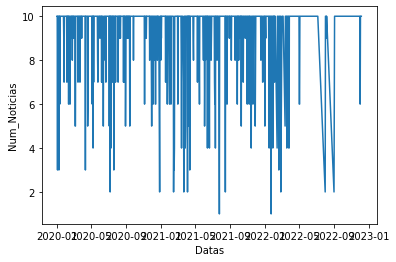

In [16]:
#Visualizando data vs quantidade de notícias
data_df.columns = ['Datas', 'Num_Noticias']
sns.lineplot(x = 'Datas', y = 'Num_Noticias', data = data_df)

In [17]:
# inserindo coluna de mês
data_df['Mes'] = data_df['Datas'].dt.month

# Calculando media de noticias por mês
df_noticia_mes = data_df.groupby('Mes').agg({'Num_Noticias':np.mean})
df_noticia_mes

Num_Noticias
Mes              
1            9.07
2            8.91
3            9.01
4            9.46
5            9.55
6            9.47
7            9.03
8            9.38
9            9.56
10           9.71
11           9.35
12           9.20

In [18]:
data_df.head(20)

Datas  Num_Noticias  Mes
96  2020-01-01            10    1
589 2020-01-02            10    1
841 2020-01-03             3    1
205 2020-01-04            10    1
89  2020-01-05            10    1
616 2020-01-06            10    1
398 2020-01-07            10    1
842 2020-01-08             3    1
303 2020-01-09            10    1
181 2020-01-10            10    1
805 2020-01-11             6    1
496 2020-01-12            10    1
292 2020-01-13            10    1
46  2020-01-14            10    1
619 2020-01-15            10    1
528 2020-01-16            10    1
280 2020-01-17            10    1
319 2020-01-18            10    1
134 2020-01-19            10    1
450 2020-01-20            10    1

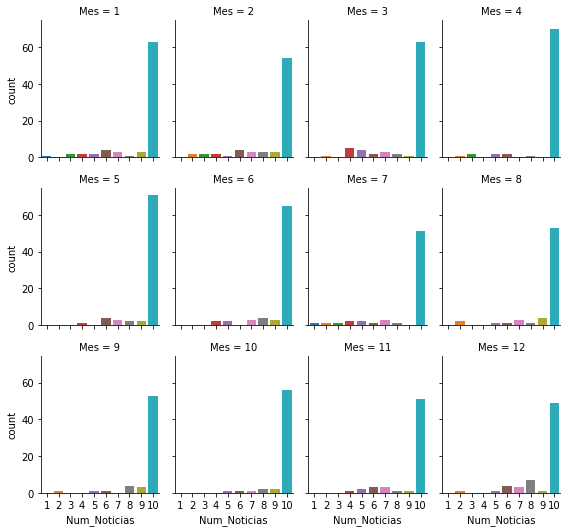

In [19]:
# Visualizando distribuição da quantidade de noticias ao longo dos meses
sns.catplot(x="Num_Noticias", col="Mes", col_wrap=4,
                data=data_df,
                kind="count", height=2.5, aspect=.8)

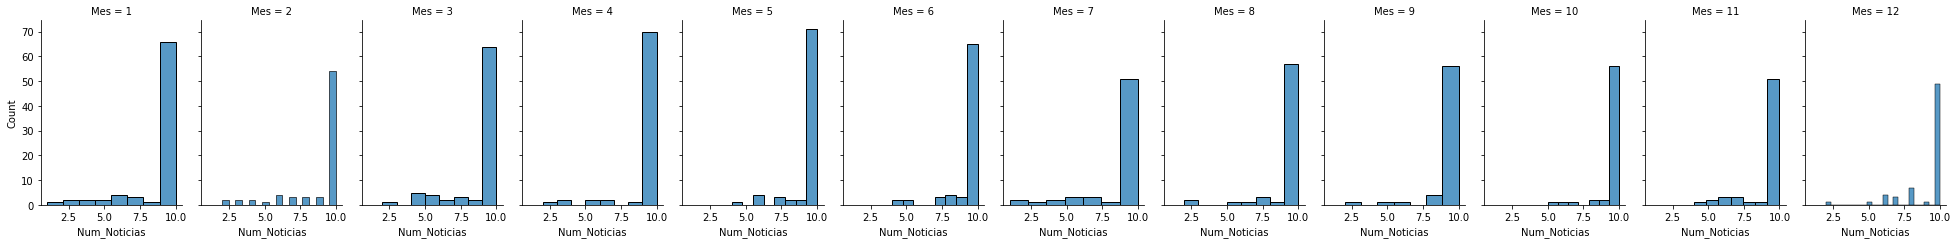

In [20]:
# Visualizando distribuição da quantidade de noticias ao longo dos meses
g = sns.FacetGrid(data_df, col="Mes", height=3.5, aspect=.65)
g.map(sns.histplot, "Num_Noticias")

Há poucas ocorrências de baixo numero de noticias por dia, a maior ocorrência da quantidade de noticias por dia é de 10.
Dessa forma, a média de noticias por mês varia de 8 á 10.

## 3.2 Há poucos dias sem noticias na base de dados

In [21]:
from datetime import datetime

In [22]:
## Gerando uma lista com todos os dias:
start_date = '01/01/2020'
end_date = '31/12/2022'

#Transformando para o padrão inglês
start_date = datetime.strptime(start_date, '%d/%m/%Y').strftime('%m-%d-%Y')
end_date = datetime.strptime(end_date, '%d/%m/%Y').strftime('%m-%d-%Y')

#Gerando a lista com todas as datas
todas_datas = pd.date_range(start=start_date, end=end_date, freq = '1D')
todas_datas = [i.strftime("%d/%m/%Y") for i in todas_datas ]

In [23]:
#Gerando lista com todas as datas com noticias
datas_com_noticias = [i.strftime("%d/%m/%Y") for i in data_df['Datas'] ]

In [24]:
#Gerando lista com todas as datas sem noticias 
datas_sem_noticias = [i for i in todas_datas if i not in datas_com_noticias]
print("Há %s dias sem notícias no periodo considerado!" % len(datas_sem_noticias))

Há 238 dias sem notícias no periodo considerado!


In [25]:
datas_sem_noticias

['14/01/2021',
 '15/01/2021',
 '24/01/2021',
 '27/01/2021',
 '04/02/2021',
 '04/03/2021',
 '05/03/2021',
 '09/03/2021',
 '19/03/2021',
 '02/04/2021',
 '14/04/2021',
 '20/04/2021',
 '24/04/2021',
 '12/05/2021',
 '15/05/2021',
 '23/05/2021',
 '04/06/2021',
 '19/06/2021',
 '27/06/2021',
 '01/07/2021',
 '20/07/2021',
 '22/07/2021',
 '28/07/2021',
 '30/07/2021',
 '06/08/2021',
 '08/08/2021',
 '13/08/2021',
 '09/09/2021',
 '10/09/2021',
 '04/10/2021',
 '16/10/2021',
 '23/10/2021',
 '04/11/2021',
 '21/11/2021',
 '23/11/2021',
 '29/11/2021',
 '04/12/2021',
 '19/12/2021',
 '03/01/2022',
 '07/01/2022',
 '08/01/2022',
 '09/01/2022',
 '10/01/2022',
 '11/01/2022',
 '12/01/2022',
 '18/01/2022',
 '07/02/2022',
 '08/02/2022',
 '09/02/2022',
 '10/02/2022',
 '11/02/2022',
 '12/02/2022',
 '22/02/2022',
 '23/02/2022',
 '27/02/2022',
 '28/02/2022',
 '01/03/2022',
 '07/03/2022',
 '08/03/2022',
 '09/03/2022',
 '10/03/2022',
 '11/03/2022',
 '12/03/2022',
 '22/03/2022',
 '03/04/2022',
 '07/04/2022',
 '08/04/20

Em apenas 38 dias de 2021 não houve retorno de noticias diárias da Petrobras

## 3.3 Há dias em que o pregão da bolsa não funciona (Finais de Semana)

In [26]:
datas_com_pregao = [i.strftime("%d/%m/%Y") for i in df_petro['Date'] ]

In [27]:
datas_sem_pregao = [i for i in todas_datas if i not in datas_com_pregao]

In [28]:
print("Há %s dias sem pregão no periodo considerado!" % len(datas_sem_pregao))

Há 477 dias sem pregão no periodo considerado!


# 4.0 Limpeza e consolidação do dataset

## 4.1 Padronização das palavras contidas nos títulos das noticias para minúsculo

In [29]:
df.head()

title                 media  \
0  Pré-sal: Centro Oeste fica com R$ 1 bilhão dos...   Correio Braziliense   
1  Preço do etanol fecha 2019 em alta de 11,5% na...  Diario de Pernambuco   
2  Série "Cineastas" e mais dicas para curtir na ...                   GZH   
3  Feriados em 2020: 11 datas serão em dias da se...           Money Times   
4  O incêndio que matou quase todos os macacos em...                   BBC   

        date                                               desc  
0 2020-01-01  O dinheiro que será distribuído veio do leilão...  
1 2020-01-01  O diesel foi o segundo combustível com maior a...  
2 2020-01-01  Cosmatos; e, por fim, às 23h15min, Rambo III (...  
3 2020-01-01  O dia 29 de fevereiro cairá em um sábado. Veja...  
4 2020-01-01  Principais notícias. Como a Petrobras virou te...

In [30]:
df['title'] = df['title'].apply(lambda x: x.lower())
df.head()

title                 media  \
0  pré-sal: centro oeste fica com r$ 1 bilhão dos...   Correio Braziliense   
1  preço do etanol fecha 2019 em alta de 11,5% na...  Diario de Pernambuco   
2  série "cineastas" e mais dicas para curtir na ...                   GZH   
3  feriados em 2020: 11 datas serão em dias da se...           Money Times   
4  o incêndio que matou quase todos os macacos em...                   BBC   

        date                                               desc  
0 2020-01-01  O dinheiro que será distribuído veio do leilão...  
1 2020-01-01  O diesel foi o segundo combustível com maior a...  
2 2020-01-01  Cosmatos; e, por fim, às 23h15min, Rambo III (...  
3 2020-01-01  O dia 29 de fevereiro cairá em um sábado. Veja...  
4 2020-01-01  Principais notícias. Como a Petrobras virou te...

## 4.2 Exclusão noticias que não contenham a palavra chave "Petrobras" no título
Embora tenha-se configurado A biblioteca GoogleNews() para baixar noticias pela palavra chave "Petrobras" pode ocorrer casos em que o termo não é citado no título e nem no corpo da noticia.

In [31]:
df.iloc[2][0]

'série "cineastas" e mais dicas para curtir na tv nesta quarta-feira'

In [32]:
df.iloc[2][3]

'Cosmatos; e, por fim, às 23h15min, Rambo III (1988), de Peter MacDonald.  Especial Lenine e Petrobras Sinfônica - TV Brasil, 22h. Concerto especial  com o...'

In [33]:
df['title'] = df['title'].apply(lambda x: "" if "petrobras" not in x else x)
df

title                 media  \
0                                                         Correio Braziliense   
1                                                        Diario de Pernambuco   
2                                                                         GZH   
3                                                                 Money Times   
4                                                                         BBC   
...                                                 ...                   ...   
7978  petrobras retoma venda de três refinarias: sai...        Gazeta do Povo   
7979  governo avalia mecanismo para obrigar petrobra...       BiodieselBR.com   
7980  postos petrobras e shell se rendem à recarga d...          Quatro Rodas   
7981  ações petrobras: saiba o preço após fechamento...          UOL Economia   
7982                                                             Mais Retorno   

           date                                               desc  
0    2020-01-01  O dinheiro que será distribuído veio do leilão...  
1    2020-01-01  O diesel foi o segundo combustível com maior a...  
2    2020-01-01  Cosmatos; e, por fim, às 23h15min, Rambo III (...  
3    2020-01-01  O dia 29 de fevereiro cairá em um sábado. Veja...  
4    2020-01-01  Principais notícias. Como a Petrobras virou te...  
...         ...                                                ...  
7978 2022-06-30  Refinarias da Petrobras em Pernambuco, Paraná ...  
7979 2022-06-30  A Petrobras chegou a assinar em 2019 um acordo...  
7980 2022-06-30  O eletroposto foi instalado no posto Petrobras...  
7981 2022-06-30  As ações da Petrobras fecharam em queda nesta ...  
7982 2022-06-30  Dividendos e JCP em junho: Petrobras e Usimina...  

[7983 rows x 4 columns]

In [34]:
df = df[(df['title'] != "")]
df

title  \
10    indústria tem maior nível de emprego em 4 anos...   
11    clarissa lins, do ibp, renuncia como integrant...   
12    petrobras viverá momento de transformação nos ...   
20    governo não descarta intervir na petrobras par...   
21    postos aguardam petrobras para reajustar preço...   
...                                                 ...   
7977        petrobras pagará r$ 30,9 bi por plataformas   
7978  petrobras retoma venda de três refinarias: sai...   
7979  governo avalia mecanismo para obrigar petrobra...   
7980  postos petrobras e shell se rendem à recarga d...   
7981  ações petrobras: saiba o preço após fechamento...   

                            media       date  \
10                             G1 2020-02-01   
11                 Época Negócios 2020-02-01   
12                Valor Econômico 2020-02-01   
20    Blog do Correio Braziliense 2020-03-01   
21                     Metrópoles 2020-03-01   
...                           ...        ...   
7977              Valor Econômico 2022-06-30   
7978               Gazeta do Povo 2022-06-30   
7979              BiodieselBR.com 2022-06-30   
7980                 Quatro Rodas 2022-06-30   
7981                 UOL Economia 2022-06-30   

                                                   desc  
10    Indústria tem maior nível de emprego em 4 anos...  
11    A Petrobras informa que a conselheira de admin...  
12    Os anos 2020 prometem ser de profundas transfo...  
20    Assessores próximos do presidente Jair Bolsona...  
21    Postos aguardam Petrobras para reajustar preço...  
...                                                 ...  
7977  O resultado da licitação internacional bilioná...  
7978  Refinarias da Petrobras em Pernambuco, Paraná ...  
7979  A Petrobras chegou a assinar em 2019 um acordo...  
7980  O eletroposto foi instalado no posto Petrobras...  
7981  As ações da Petrobras fecharam em queda nesta ...  

[3739 rows x 4 columns]

### Dispersão das fontes de notícias

In [35]:
dfmed1 = df
dfmed1['media'] = dfmed1['media'].str.replace('Click Petróleo e Gás','CPG Click Petroleo e Gas')
dfmed = dfmed1.groupby(['media']).count()
dfmed.sort_values(by='title', ascending=False, inplace=True)
dfmed.reset_index(inplace=True)
totnot = dfmed['title'].sum()
dfmed['title'] = pd.to_numeric(dfmed['title'])
dfmed['perc'] = ((dfmed['title'] / totnot) *100)
dfmed['perc'] = dfmed['perc'].round(2)

<AxesSubplot:ylabel='media'>

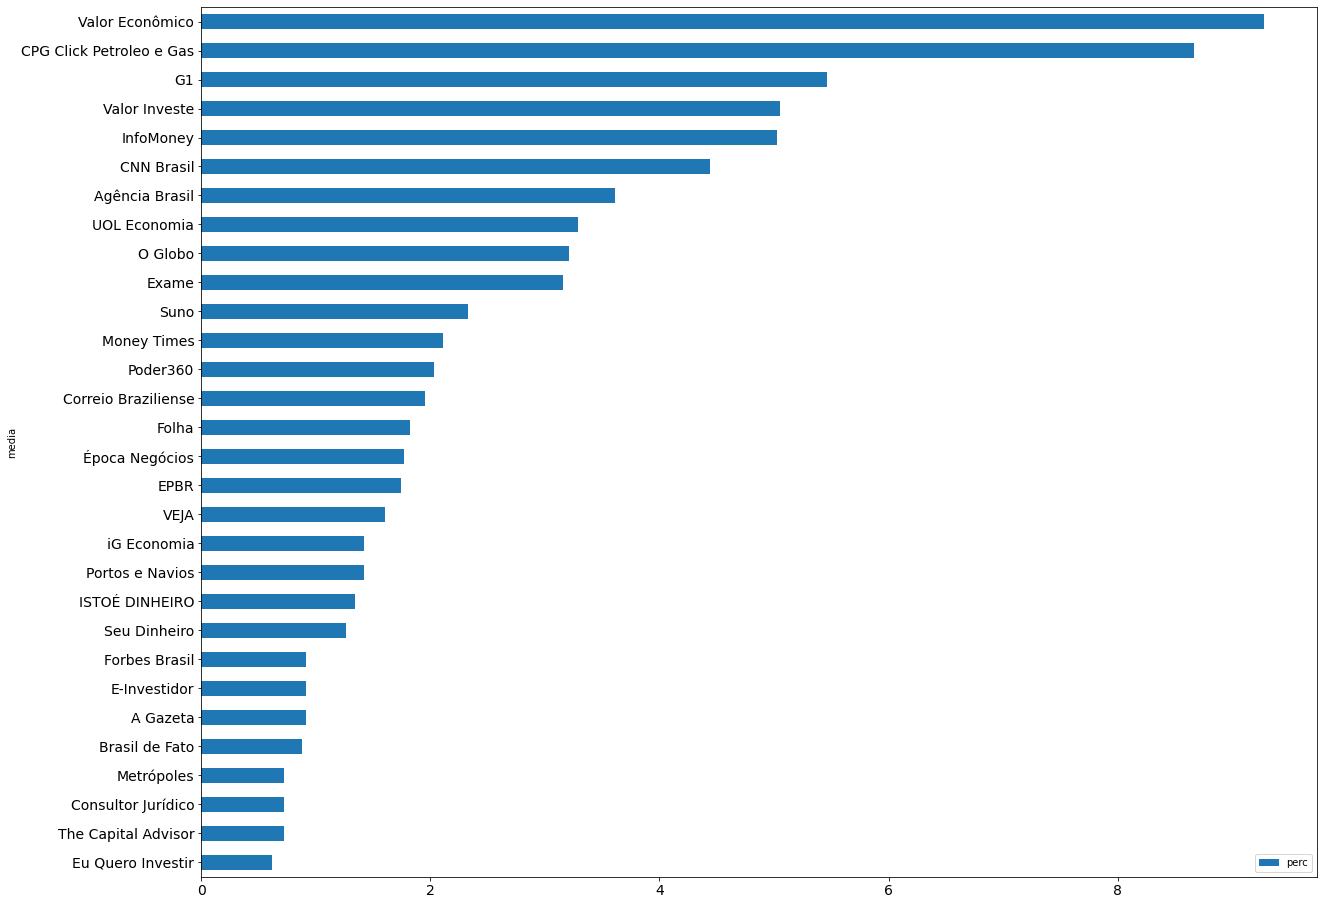

In [36]:
dfmed.sort_values(by='perc', ascending=False, inplace=True)
dfmed.reset_index(inplace=True)
dfmed = dfmed.head(30)
dfmed.sort_index(ascending=False).plot(kind='barh',x='media', y='perc', figsize=(20,16),fontsize=(14))

## 4.4 Adição de classe "Fechamento" ao dataframe de Ações
Classe 1: Fechamento em alta  
Classe 0: Fechamento em queda  

In [37]:
df_petro

Date  Adj Close    Volume  Var%
0   2020-01-02      20.47  37774500  0.02
1   2020-01-03      20.30  71595600 -0.01
2   2020-01-06      20.54  81844000  0.01
3   2020-01-07      20.46  32822000 -0.00
4   2020-01-08      20.33  48215600 -0.01
..         ...        ...       ...   ...
614 2022-06-24      26.29  53413400 -0.01
615 2022-06-27      27.98  90417700  0.06
616 2022-06-28      28.33  51388000  0.01
617 2022-06-29      28.08  52048800 -0.01
618 2022-06-30      27.93  49910100 -0.01

[619 rows x 4 columns]

In [38]:
df_petro['Fechamento'] = df_petro['Var%'].apply(lambda x: 0 if x<0 else 1)
df_petro

Date  Adj Close    Volume  Var%  Fechamento
0   2020-01-02      20.47  37774500  0.02           1
1   2020-01-03      20.30  71595600 -0.01           0
2   2020-01-06      20.54  81844000  0.01           1
3   2020-01-07      20.46  32822000 -0.00           0
4   2020-01-08      20.33  48215600 -0.01           0
..         ...        ...       ...   ...         ...
614 2022-06-24      26.29  53413400 -0.01           0
615 2022-06-27      27.98  90417700  0.06           1
616 2022-06-28      28.33  51388000  0.01           1
617 2022-06-29      28.08  52048800 -0.01           0
618 2022-06-30      27.93  49910100 -0.01           0

[619 rows x 5 columns]

In [39]:
df_petro.Fechamento.value_counts()

1    319
0    300
Name: Fechamento, dtype: int64

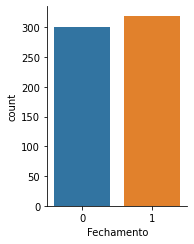

In [40]:
sns.catplot(x="Fechamento",
                data=df_petro,
                kind="count", height=3.5, aspect=.8)

Há um balanceamento de classes! Não precisaremos investir muito tempo em tecnicas de balanceamento para treinar o modelo

# 5.0 Geração de features

## 5.1 Tradução noticias diárias para o idioma inglês

In [44]:
from googletrans import Translator

trans = Translator()

#Exemplo
#trans.translate("The book is on the table", dest = 'pt').text

def traduzir(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    frase = trans.translate(frase, dest = 'en').text
    return frase

In [45]:
df['title_english'] = df['title'].apply(lambda x: traduzir(x))
df

title  \
10    indústria tem maior nível de emprego em 4 anos...   
11    clarissa lins, do ibp, renuncia como integrant...   
12    petrobras viverá momento de transformação nos ...   
20    governo não descarta intervir na petrobras par...   
21    postos aguardam petrobras para reajustar preço...   
...                                                 ...   
7977        petrobras pagará r$ 30,9 bi por plataformas   
7978  petrobras retoma venda de três refinarias: sai...   
7979  governo avalia mecanismo para obrigar petrobra...   
7980  postos petrobras e shell se rendem à recarga d...   
7981  ações petrobras: saiba o preço após fechamento...   

                            media       date  \
10                             G1 2020-02-01   
11                 Época Negócios 2020-02-01   
12                Valor Econômico 2020-02-01   
20    Blog do Correio Braziliense 2020-03-01   
21                     Metrópoles 2020-03-01   
...                           ...        ...   
7977              Valor Econômico 2022-06-30   
7978               Gazeta do Povo 2022-06-30   
7979              BiodieselBR.com 2022-06-30   
7980                 Quatro Rodas 2022-06-30   
7981                 UOL Economia 2022-06-30   

                                                   desc  \
10    Indústria tem maior nível de emprego em 4 anos...   
11    A Petrobras informa que a conselheira de admin...   
12    Os anos 2020 prometem ser de profundas transfo...   
20    Assessores próximos do presidente Jair Bolsona...   
21    Postos aguardam Petrobras para reajustar preço...   
...                                                 ...   
7977  O resultado da licitação internacional bilioná...   
7978  Refinarias da Petrobras em Pernambuco, Paraná ...   
7979  A Petrobras chegou a assinar em 2019 um acordo...   
7980  O eletroposto foi instalado no posto Petrobras...   
7981  As ações da Petrobras fecharam em queda nesta ...   

                                          title_english  
10    industry has highest level of employment in 4 ...  
11    clarissa lins, from ibp, resigns as a member o...  
12    petrobras will experience a moment of transfor...  
20    government does not rule out intervening in pe...  
21    gas stations await petrobras to readjust gasol...  
...                                                 ...  
7977   petrobras will pay r$ 30.9 billion for platforms  
7978  petrobras resumes sale of three refineries: fi...  
7979  government evaluates mechanism to force petrob...  
7980  petrobras and shell stations surrender to elec...  
7981  petrobras shares: know the price after today's...  

[3739 rows x 5 columns]

## 5.2 Feature Score - Sentilex

In [49]:
## Função para montar dicionarios
def montar_dicionario(versao_sentilex):
    versao = 'Versoes dicionarios sentilex/SentiLex-lem-PT01 editado v' + versao_sentilex + '.txt'
    sentilexpt = open(versao,'r',encoding='utf-8-sig')
    dic_palavra_polaridade = {}
    
    for i in sentilexpt.readlines():
        pos_ponto = i.find('.')            # obtem a posiçãodo caracter ponto
        palavra = (i[:pos_ponto])          # Pega a palavra
        pol_pos = i.find('POL')            # obtem a posição do inicio da string POL
        polaridade = (i[pol_pos+4:pol_pos+6]).replace(';','')         # obtem a polaridade da palavra
        #polaridade = (i[pol_pos+4:pol_pos+7]).replace(';','')
        dic_palavra_polaridade[palavra] = polaridade                  # atualiza o dicionario com a palavra a polaridade
    
    return dic_palavra_polaridade


## Funçao para retornar o score do sentimento lendo o dicionario
def Score_sentimento(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    l_sentimento = []                         # cria uma lista vazia
    for p in frase.split():
        l_sentimento.append(int(dic_palavra_polaridade.get(p, 0)))      # para cada palavra obtem a polaridade
        #l_sentimento.append(float(dic_palavra_polaridade.get(p, 0)))      # para cada palavra obtem a polaridade     
    #print (l_sentimento)                                                # imprime a lista de polaridades
    score = sum(l_sentimento)                                           # soma todos os valores da lista
    #if score > 0:
        #return 'Positivo, Score:{}'.format(score)                       # se maior que 0 retorna 'positivo'
    #elif score == 0:
        #return 'Neutro, Score:{}'.format(score)                         # se igual a 0 retorna 'neutro'
    #else:
        #return 'Negativo, Score:{}'.format(score)                       # se menor que 0 retorna 'negativo'
        
    return score

In [50]:
## iniciando as features com a versão original do sentilex
sentilexpt = open('Versoes dicionarios sentilex/SentiLex-lem-PT01.txt','r',encoding='utf-8-sig')

dic_palavra_polaridade = {}

for i in sentilexpt.readlines():
    pos_ponto = i.find('.')            # obtem a posiçãodo caracter ponto
    palavra = (i[:pos_ponto])          # Pega a palavra
    pol_pos = i.find('POL')            # obtem a posição do inicio da string POL
    polaridade = (i[pol_pos+4:pol_pos+6]).replace(';','')         # obtem a polaridade da palavra
    #polaridade = (i[pol_pos+4:pol_pos+7]).replace(';','')
    dic_palavra_polaridade[palavra] = polaridade                  # atualiza o dicionario com a palavra a polaridade

In [51]:
print (dic_palavra_polaridade.get('legal'))

1


In [52]:
print (dic_palavra_polaridade.get('milhão'))

None


In [53]:
versoes_sentilex = ['65_1','65_2','65_3','65_4','65_5','70_1','70_2','70_3','70_4','70_5','75_1','75_2','75_3','75_4','75_5','80_1','80_2','80_3','80_4','80_5']

In [63]:
dic_palavra_polaridade  = montar_dicionario('70_3')
    
df['score'] = df['title'].apply(lambda x: Score_sentimento(str(x)))
df.head()

title  \
10  indústria tem maior nível de emprego em 4 anos...   
11  clarissa lins, do ibp, renuncia como integrant...   
12  petrobras viverá momento de transformação nos ...   
20  governo não descarta intervir na petrobras par...   
21  postos aguardam petrobras para reajustar preço...   

                          media       date  \
10                           G1 2020-02-01   
11               Época Negócios 2020-02-01   
12              Valor Econômico 2020-02-01   
20  Blog do Correio Braziliense 2020-03-01   
21                   Metrópoles 2020-03-01   

                                                 desc  \
10  Indústria tem maior nível de emprego em 4 anos...   
11  A Petrobras informa que a conselheira de admin...   
12  Os anos 2020 prometem ser de profundas transfo...   
20  Assessores próximos do presidente Jair Bolsona...   
21  Postos aguardam Petrobras para reajustar preço...   

                                        title_english  score  
10  industry has highest level of employment in 4 ...     -4  
11  clarissa lins, from ibp, resigns as a member o...     -1  
12  petrobras will experience a moment of transfor...      0  
20  government does not rule out intervening in pe...      0  
21  gas stations await petrobras to readjust gasol...      3

## 5.3 Vader Sentiment: Função gerar scores Vader

In [64]:
from textblob import TextBlob

In [67]:
frase_teste = traduzir("A comida está muito boa")
frase_teste

'the food is very good'

In [68]:
text_blob = TextBlob(frase_teste)
polaridade = text_blob.polarity
subjetividade = text_blob.subjectivity

In [69]:
polaridade, subjetividade

(0.9099999999999999, 0.7800000000000001)

In [70]:
def polaridade(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    text_blob = TextBlob(frase)
    polaridade = text_blob.polarity
    return polaridade

def subjetividade(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    text_blob = TextBlob(frase)
    subjetividade = text_blob.subjectivity
    return subjetividade

In [71]:
polaridade("tudo ótimo e perfeito"), subjetividade("tudo ótimo e perfeito")

(0.0, 0.0)

In [72]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [73]:
s_analyze = SentimentIntensityAnalyzer()
sentiment= s_analyze.polarity_scores(frase_teste)

In [74]:
sentiment

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}

In [75]:
type(sentiment)
sentiment.get('neu')

0.556

In [76]:
def negatividade(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('neg')
    return sentimento

def neutralidade(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('neu')
    return sentimento

def positividade(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('pos')
    return sentimento

def composicao(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('compound')
    return sentimento


In [77]:
negatividade("tudo ótimo e perfeito"), neutralidade("tudo ótimo e perfeito"), positividade("tudo ótimo e perfeito"), composicao("tudo ótimo e perfeito")

(0.0, 1.0, 0.0, 0.0)

In [78]:
df['polaridade_vad'] = df['title_english'].apply(lambda x: polaridade(str(x)))
df['subjetividade_vad'] = df['title_english'].apply(lambda x: subjetividade(str(x)))
df['negatividade_vad'] = df['title_english'].apply(lambda x: negatividade(str(x)))
df['neutralidade_vad'] = df['title_english'].apply(lambda x: neutralidade(str(x)))
df['positividade_vad'] = df['title_english'].apply(lambda x: positividade(str(x)))
df['composicao_vad'] = df['title_english'].apply(lambda x: composicao(str(x)))

In [79]:
df.head()

title  \
10  indústria tem maior nível de emprego em 4 anos...   
11  clarissa lins, do ibp, renuncia como integrant...   
12  petrobras viverá momento de transformação nos ...   
20  governo não descarta intervir na petrobras par...   
21  postos aguardam petrobras para reajustar preço...   

                          media       date  \
10                           G1 2020-02-01   
11               Época Negócios 2020-02-01   
12              Valor Econômico 2020-02-01   
20  Blog do Correio Braziliense 2020-03-01   
21                   Metrópoles 2020-03-01   

                                                 desc  \
10  Indústria tem maior nível de emprego em 4 anos...   
11  A Petrobras informa que a conselheira de admin...   
12  Os anos 2020 prometem ser de profundas transfo...   
20  Assessores próximos do presidente Jair Bolsona...   
21  Postos aguardam Petrobras para reajustar preço...   

                                        title_english  score  polaridade_vad  \
10  industry has highest level of employment in 4 ...     -4            0.20   
11  clarissa lins, from ibp, resigns as a member o...     -1            0.00   
12  petrobras will experience a moment of transfor...      0            0.00   
20  government does not rule out intervening in pe...      0            0.00   
21  gas stations await petrobras to readjust gasol...      3            0.00   

    subjetividade_vad  negatividade_vad  neutralidade_vad  positividade_vad  \
10               0.10              0.00              1.00              0.00   
11               0.00              0.16              0.84              0.00   
12               0.00              0.00              1.00              0.00   
20               0.00              0.00              1.00              0.00   
21               0.00              0.00              0.86              0.14   

    composicao_vad  
10            0.00  
11           -0.32  
12            0.00  
20            0.00  
21            0.10

## 5.4 roBERTa: Função gerar score roBERTa

In [80]:
#pip install –upgrade pip
#pip install tensorflow
#pip install transformers
#pip install torch

In [81]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [82]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [83]:
example = "This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [84]:
def neg_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    neg_roberta = scores[0]
   # neu_roberta = scores[1]
   # pos_roberta = scores[2]
    return neg_roberta

def neu_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    #neg_roberta = scores[0]
    neu_roberta = scores[1]
    #pos_roberta = scores[2]
    return neu_roberta

def pos_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    #neg_roberta = scores[0]
    #neu_roberta = scores[1]
    pos_roberta = scores[2]
    return pos_roberta

In [85]:
df['neg_rob'] = df['title_english'].apply(lambda x: neg_rob(str(x)))
df['neu_rob'] = df['title_english'].apply(lambda x: neu_rob(str(x)))
df['pos_rob'] = df['title_english'].apply(lambda x: pos_rob(str(x)))

In [86]:
df.head()

title  \
10  indústria tem maior nível de emprego em 4 anos...   
11  clarissa lins, do ibp, renuncia como integrant...   
12  petrobras viverá momento de transformação nos ...   
20  governo não descarta intervir na petrobras par...   
21  postos aguardam petrobras para reajustar preço...   

                          media       date  \
10                           G1 2020-02-01   
11               Época Negócios 2020-02-01   
12              Valor Econômico 2020-02-01   
20  Blog do Correio Braziliense 2020-03-01   
21                   Metrópoles 2020-03-01   

                                                 desc  \
10  Indústria tem maior nível de emprego em 4 anos...   
11  A Petrobras informa que a conselheira de admin...   
12  Os anos 2020 prometem ser de profundas transfo...   
20  Assessores próximos do presidente Jair Bolsona...   
21  Postos aguardam Petrobras para reajustar preço...   

                                        title_english  score  polaridade_vad  \
10  industry has highest level of employment in 4 ...     -4            0.20   
11  clarissa lins, from ibp, resigns as a member o...     -1            0.00   
12  petrobras will experience a moment of transfor...      0            0.00   
20  government does not rule out intervening in pe...      0            0.00   
21  gas stations await petrobras to readjust gasol...      3            0.00   

    subjetividade_vad  negatividade_vad  neutralidade_vad  positividade_vad  \
10               0.10              0.00              1.00              0.00   
11               0.00              0.16              0.84              0.00   
12               0.00              0.00              1.00              0.00   
20               0.00              0.00              1.00              0.00   
21               0.00              0.00              0.86              0.14   

    composicao_vad  neg_rob  neu_rob  pos_rob  
10            0.00     0.00     0.18     0.82  
11           -0.32     0.09     0.89     0.02  
12            0.00     0.01     0.58     0.42  
20            0.00     0.16     0.81     0.03  
21            0.10     0.09     0.86     0.06

## 5.5 finBERT: Função gerar score finBERT

In [87]:
#pip install transformers

In [88]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

In [89]:
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

In [90]:
sentences = ["there is a shortage of capital, and we need extra financing"]
results = nlp(sentences)
print(results)  #LABEL_0: neutral; LABEL_1: positive; LABEL_2: negative

[{'label': 'Negative', 'score': 0.9966173768043518}]


In [91]:
sentences = ["cool facinanting loss"]
results = nlp(sentences)
print(results)  #LABEL_0: neutral; LABEL_1: positive; LABEL_2: negative

[{'label': 'Negative', 'score': 0.9918428659439087}]


In [92]:
def sentimento_finbert_pos(string):
    results = nlp([string])
    dict_results = results[0]
    sentimento = dict_results.get('label')
    
    if sentimento == "Positive":
        score = dict_results.get('score')
    else:
        score = 0
        
    return score

def sentimento_finbert_neg(string):
    results = nlp([string])
    dict_results = results[0]
    sentimento = dict_results.get('label')
    
    if sentimento == "Negative":
        score = -1*dict_results.get('score')
    else:
        score = 0
        
    return score

def sentimento_finbert_neu(string):
    results = nlp([string])
    dict_results = results[0]
    sentimento = dict_results.get('label')
    
    if sentimento == "Neutral":
        score = dict_results.get('score')
    else:
        score = 0        
        
    return score

In [93]:
sentimento_finbert_neg("there is a shortage of capital, and we need extra financing")

-0.9966173768043518

In [94]:
df['pos_finbert'] = df['title_english'].apply(lambda x: sentimento_finbert_pos(x))
df['neg_finbert'] = df['title_english'].apply(lambda x: sentimento_finbert_neg(x))
df['neu_finbert'] = df['title_english'].apply(lambda x: sentimento_finbert_neu(x))

In [95]:
df.head()

title  \
10  indústria tem maior nível de emprego em 4 anos...   
11  clarissa lins, do ibp, renuncia como integrant...   
12  petrobras viverá momento de transformação nos ...   
20  governo não descarta intervir na petrobras par...   
21  postos aguardam petrobras para reajustar preço...   

                          media       date  \
10                           G1 2020-02-01   
11               Época Negócios 2020-02-01   
12              Valor Econômico 2020-02-01   
20  Blog do Correio Braziliense 2020-03-01   
21                   Metrópoles 2020-03-01   

                                                 desc  \
10  Indústria tem maior nível de emprego em 4 anos...   
11  A Petrobras informa que a conselheira de admin...   
12  Os anos 2020 prometem ser de profundas transfo...   
20  Assessores próximos do presidente Jair Bolsona...   
21  Postos aguardam Petrobras para reajustar preço...   

                                        title_english  score  polaridade_vad  \
10  industry has highest level of employment in 4 ...     -4            0.20   
11  clarissa lins, from ibp, resigns as a member o...     -1            0.00   
12  petrobras will experience a moment of transfor...      0            0.00   
20  government does not rule out intervening in pe...      0            0.00   
21  gas stations await petrobras to readjust gasol...      3            0.00   

    subjetividade_vad  negatividade_vad  neutralidade_vad  positividade_vad  \
10               0.10              0.00              1.00              0.00   
11               0.00              0.16              0.84              0.00   
12               0.00              0.00              1.00              0.00   
20               0.00              0.00              1.00              0.00   
21               0.00              0.00              0.86              0.14   

    composicao_vad  neg_rob  neu_rob  pos_rob  pos_finbert  neg_finbert  \
10            0.00     0.00     0.18     0.82         1.00         0.00   
11           -0.32     0.09     0.89     0.02         0.00         0.00   
12            0.00     0.01     0.58     0.42         0.78         0.00   
20            0.00     0.16     0.81     0.03         0.00         0.00   
21            0.10     0.09     0.86     0.06         0.00        -1.00   

    neu_finbert  
10         0.00  
11         0.98  
12         0.00  
20         1.00  
21         0.00

In [151]:
#df.to_csv('Noticias_e_features.csv',index=False)
#df.head()

# 6.0 Pré-processamento

## 6.1 Concatenar noticias diárias

In [98]:
df_petro.head()

Date  Adj Close    Volume  Var%  Fechamento
0 2020-01-02      20.47  37774500  0.02           1
1 2020-01-03      20.30  71595600 -0.01           0
2 2020-01-06      20.54  81844000  0.01           1
3 2020-01-07      20.46  32822000 -0.00           0
4 2020-01-08      20.33  48215600 -0.01           0

In [99]:
df.head()

title  \
10  indústria tem maior nível de emprego em 4 anos...   
11  clarissa lins, do ibp, renuncia como integrant...   
12  petrobras viverá momento de transformação nos ...   
20  governo não descarta intervir na petrobras par...   
21  postos aguardam petrobras para reajustar preço...   

                          media       date  \
10                           G1 2020-02-01   
11               Época Negócios 2020-02-01   
12              Valor Econômico 2020-02-01   
20  Blog do Correio Braziliense 2020-03-01   
21                   Metrópoles 2020-03-01   

                                                 desc  \
10  Indústria tem maior nível de emprego em 4 anos...   
11  A Petrobras informa que a conselheira de admin...   
12  Os anos 2020 prometem ser de profundas transfo...   
20  Assessores próximos do presidente Jair Bolsona...   
21  Postos aguardam Petrobras para reajustar preço...   

                                        title_english  score  polaridade_vad  \
10  industry has highest level of employment in 4 ...     -4            0.20   
11  clarissa lins, from ibp, resigns as a member o...     -1            0.00   
12  petrobras will experience a moment of transfor...      0            0.00   
20  government does not rule out intervening in pe...      0            0.00   
21  gas stations await petrobras to readjust gasol...      3            0.00   

    subjetividade_vad  negatividade_vad  neutralidade_vad  positividade_vad  \
10               0.10              0.00              1.00              0.00   
11               0.00              0.16              0.84              0.00   
12               0.00              0.00              1.00              0.00   
20               0.00              0.00              1.00              0.00   
21               0.00              0.00              0.86              0.14   

    composicao_vad  neg_rob  neu_rob  pos_rob  pos_finbert  neg_finbert  \
10            0.00     0.00     0.18     0.82         1.00         0.00   
11           -0.32     0.09     0.89     0.02         0.00         0.00   
12            0.00     0.01     0.58     0.42         0.78         0.00   
20            0.00     0.16     0.81     0.03         0.00         0.00   
21            0.10     0.09     0.86     0.06         0.00        -1.00   

    neu_finbert  
10         0.00  
11         0.98  
12         0.00  
20         1.00  
21         0.00

In [120]:
df.columns

Index(['title', 'media', 'date', 'desc', 'title_english', 'score',
       'polaridade_vad', 'subjetividade_vad', 'negatividade_vad',
       'neutralidade_vad', 'positividade_vad', 'composicao_vad', 'neg_rob',
       'neu_rob', 'pos_rob', 'pos_finbert', 'neg_finbert', 'neu_finbert'],
      dtype='object')

In [137]:
lista_datas = []
lista_news = []
agrupado_por_data = []

for i in df.date.unique():
    news = ""
    title_english = ""
    score = 0
    polaridade_vad = 0
    subjetividade_vad = 0
    negatividade_vad = 0
    neutralidade_vad = 0
    positividade_vad = 0
    composicao_vad = 0
    neg_rob = 0
    neu_rob = 0
    pos_rob = 0
    pos_finbert = 0
    neg_finbert = 0
    neu_finbert = 0
    
    for row in df[(df['date']==i)].iterrows():
        news = news + " " + row[1][0]
        title_english = title_english + " " + row[1][4]
        score = score + row[1][5]
        polaridade_vad = polaridade_vad + row[1][6]
        subjetividade_vad = subjetividade_vad + row[1][7]
        negatividade_vad = negatividade_vad + row[1][8]
        neutralidade_vad = neutralidade_vad + row[1][9]
        positividade_vad = positividade_vad + row[1][10]
        composicao_vad = composicao_vad + row[1][11]
        neg_rob = neg_rob + row[1][12]
        neu_rob = neu_rob + row[1][13]
        pos_rob = pos_rob + row[1][14]
        pos_finbert = pos_finbert + row[1][15]
        neg_finbert = neg_finbert + row[1][16]
        neu_finbert = neu_finbert + row[1][17]
        
       
    agrupado_por_data.append(np.array([i,news,title_english,score,polaridade_vad,subjetividade_vad,negatividade_vad,neutralidade_vad,positividade_vad,composicao_vad,neg_rob,neu_rob,pos_rob,pos_finbert,neg_finbert,neu_finbert]))
 
    
        
    lista_news.append(news)
    lista_datas.append(i)

In [138]:
df_news_diaria = pd.DataFrame(np.array(agrupado_por_data), columns=['Date','Noticias','Noticias_ingles','score',
       'polaridade_vad', 'subjetividade_vad', 'negatividade_vad',
       'neutralidade_vad', 'positividade_vad', 'composicao_vad', 'neg_rob',
       'neu_rob', 'pos_rob', 'pos_finbert', 'neg_finbert', 'neu_finbert'])  
df_news_diaria.head()

Date                                           Noticias  \
0 2020-02-01   indústria tem maior nível de emprego em 4 ano...   
1 2020-03-01   governo não descarta intervir na petrobras pa...   
2 2020-06-01   petrobras tem margens de combustíveis apertad...   
3 2020-07-01                  petrobras: compro petr3 ou petr4?   
4 2020-08-01   trabalhador morre em transporte de plataforma...   

                                     Noticias_ingles score polaridade_vad  \
0   industry has highest level of employment in 4...    -5           0.20   
1   government does not rule out intervening in p...     3           0.07   
2   Petrobras has tight fuel margins after oil ra...    -3          -0.18   
3                     petrobras: buy petr3 or petr4?     0           0.00   
4   worker dies in transport of petrobras platfor...    -2           0.53   

  subjetividade_vad negatividade_vad neutralidade_vad positividade_vad  \
0              0.10             0.16             2.84             0.00   
1              0.52             0.00             2.68             0.32   
2              0.29             0.00             1.00             0.00   
3              0.00             0.00             1.00             0.00   
4              1.17             0.14             5.70             0.15   

  composicao_vad neg_rob neu_rob pos_rob pos_finbert neg_finbert neu_finbert  
0          -0.32    0.10    1.64    1.26        1.77        0.00        0.98  
1           0.42    0.35    2.53    0.12        0.00       -1.00        1.99  
2           0.00    0.34    0.62    0.04        0.00       -0.61        0.00  
3           0.00    0.07    0.90    0.03        0.97        0.00        0.00  
4           0.05    3.20    2.68    0.12        0.00       -0.96        4.48

In [139]:
#pd.set_option('display.max_rows', 50)

In [140]:
#df_news_diaria = pd.DataFrame(list(zip(lista_datas,lista_news)),
               #columns =['Date', 'Noticias'])
#df_news_diaria.sort_values(by = 'Date', ascending = True, inplace = True)
#df_news_diaria

## 6.2 Concatenar noticias referentes a datas sem pregões.

- O próximo dia útil após o periodo sem pregões deverá consolidar as noticias acumuladas dos dias sem pregões.
- O dataset final deverá conter apenas as datas em que ocorreu o pregão

Dessa forma, iniciaremos o procedimento, concatenando as noticias de dias que não houveram pregões

In [141]:
## Iterar sobre as datas dos pregões (iniciando pelo segundo dia do pregão de 2021 df_petro.Date.iloc[1:])

## Calcular delta (diferença entre dias entre dois registros seguidos de pregões):
import datetime

df_news_sem_pregao = pd.DataFrame()
timedelta_1dia = datetime.timedelta(days=1)

lista_datas = []
lista_noticias_sem_pregao = []

for i, data in enumerate(df_petro.Date.iloc[1:]):
    data_anterior = df_petro['Date'].iloc[i]  
    delta = data - data_anterior

    
    # Se houver mais de 1 dia sem pregão:    
    if delta > timedelta_1dia:
            
            
        # Filtra as noticias entre as datas sem pregão:
        df_aux = df_news_diaria[ (df_news_diaria['Date']> data_anterior) & (df_news_diaria['Date']<= data)  ]
        
        ## Concatena as noticias das datas sem pregão
        news = ""
        for row in df_aux.iterrows():
            news = news + " " + row[1][1]


        ## Armazena as noticias e data do ultimo pregão valido em listas
        lista_noticias_sem_pregao.append(news)
        lista_datas.append(data)
        
        #Cria um dataframe auxiliar com a data do ultimo pregão e as noticias concatenadas dos dias sem pregões:
        df_aux2 = pd.DataFrame(list(zip(lista_datas,lista_noticias_sem_pregao)),
               columns =['Date', 'Noticias'])
    
        # Gera o dataframe com as noticias sem pregões + datas do ultimo pregão valido.
        df_news_sem_pregao = df_news_sem_pregao.append(df_aux2, ignore_index = True)
        
        #Resetando as listas para geração de novo DF
        lista_noticias_sem_pregao = []
        lista_datas = []
        
df_news_sem_pregao

Date                                           Noticias
0   2020-01-06    petrobras faz redução em produção de petróle...
1   2020-01-13    vazamento de gás atinge plataforma da petrob...
2   2020-01-20    após bb, petrobras também anuncia que aposen...
3   2020-01-27    demissões em empresa da petrobras em araucár...
4   2020-02-03    indústria tem maior nível de emprego em 4 an...
..         ...                                                ...
134 2022-06-06    governo indica josé mauro ferreira coelho pa...
135 2022-06-13    defasagem de combustíveis se sustenta nas re...
136 2022-06-17    petrobras anuncia reajuste da gasolina e do ...
137 2022-06-20    bolsonaro faz novos ataques à petrobras por ...
138 2022-06-27    caio andrade nega recomendação do governo pa...

[139 rows x 2 columns]

## 6.3 Atualiza as noticias concatenadas no df_news_diaria:

In [142]:
df_news_diaria_atualizada = df_news_diaria.copy()

# itera sobre os dias com pregão cujo noticias de dias anteriores foram concatenadas:
for data in df_news_sem_pregao.Date.unique():
    
    #Filtra pelo dia com pregão que teve noticias concatenada
    df_noticia_dias_sem_pregao = df_news_sem_pregao[(df_news_sem_pregao['Date']==data)]


    #Checa se há registro referente a data no df de noticias
    df_check_noticias = df_news_diaria_atualizada[(df_news_diaria_atualizada['Date']==data)]
    
    # Se não houver registros referente á data então o registro deverá ser criado no df de noticias:
    # Se houver, então o registro será atualizado no df de noticias
    
    if len(df_check_noticias) > 0:
        
        #Substitui os registros
        df_news_diaria_atualizada = df_news_diaria_atualizada.replace ((df_news_diaria_atualizada.loc[df_news_diaria_atualizada['Date'].isin(df_noticia_dias_sem_pregao['Date'])])['Noticias'].values, df_noticia_dias_sem_pregao['Noticias'].values)
        
    else:
        #Insere o novo registro
        df_news_diaria_atualizada = df_news_diaria_atualizada.append(df_noticia_dias_sem_pregao, ignore_index = True)

In [143]:
len(df_news_diaria), len(df_news_diaria_atualizada)

(767, 785)

## 6.4 Mesclando o dataframe noticias finais e ações

In [144]:
df_final = pd.merge(left = df_petro, right = df_news_diaria_atualizada, how = 'left', on = 'Date')
df_final.head(10)

Date  Adj Close    Volume  Var%  Fechamento  \
0 2020-01-02      20.47  37774500  0.02           1   
1 2020-01-03      20.30  71595600 -0.01           0   
2 2020-01-06      20.54  81844000  0.01           1   
3 2020-01-07      20.46  32822000 -0.00           0   
4 2020-01-08      20.33  48215600 -0.01           0   
5 2020-01-09      20.27  36102700 -0.00           0   
6 2020-01-10      20.18  25397500 -0.00           0   
7 2020-01-13      20.22  30676800  0.00           1   
8 2020-01-14      20.00  39796500 -0.01           0   
9 2020-01-15      19.70  34405700 -0.02           0   

                                            Noticias  \
0   petrobras e vale retiram seus funcionários de...   
1   petrobras reduz preços do diesel e da gasolin...   
2    petrobras faz redução em produção de petróle...   
3   o adeus da petrobras ao amazonas petrobras vê...   
4                                                NaN   
5   refinarias da petrobras apresentam queda na c...   
6   petrobras pode criar subsidiárias para vender...   
7    vazamento de gás atinge plataforma da petrob...   
8   fábrica de fertilizantes da petrobras no para...   
9   petrobras vende ativos na nigéria e encerra a...   

                                     Noticias_ingles  score  polaridade_vad  \
0   petrobras and vale withdraw their employees f...   0.00            0.00   
1   petrobras reduces diesel and gasoline prices ...   0.00            0.00   
2   petrobras advances the process of selling oil...   0.00            0.00   
3   Petrobras' goodbye to the Amazon petrobras se...  -6.00            0.50   
4                                                NaN    nan             nan   
5   Petrobras refineries show a drop in global oi...  -3.00            0.00   
6   petrobras may create subsidiaries to sell 8 r...  -2.00            0.00   
7   gas leak hits petrobras platform fuel: petrob...   3.00            0.19   
8   petrobras fertilizer factory in paraná closes... -12.00           -0.59   
9   petrobras sells assets in nigeria and ends ac...  -8.00           -0.16   

   subjetividade_vad  negatividade_vad  neutralidade_vad  positividade_vad  \
0               0.00              0.17              2.83              0.00   
1               0.00              0.00              1.00              0.00   
2               0.00              0.18              1.65              0.18   
3               0.60              0.00              3.70              0.30   
4                nan               nan               nan               nan   
5               0.12              0.15              0.85              0.00   
6               0.00              0.00              4.20              0.80   
7               0.31              0.38              3.38              0.24   
8               1.87              0.00              4.77              0.23   
9               0.29              0.17              5.28              0.55   

   composicao_vad  neg_rob  neu_rob  pos_rob  pos_finbert  neg_finbert  \
0           -0.38     1.40     1.54     0.06         0.00        -2.00   
1            0.00     0.13     0.78     0.09         1.00         0.00   
2            0.00     0.13     1.79     0.08         0.00         0.00   
3            0.18     0.20     3.44     0.35         0.00         0.00   
4             nan      nan      nan      nan          nan          nan   
5           -0.27     0.29     0.68     0.03         0.00        -1.00   
6            1.19     0.35     4.28     0.37         0.00         0.00   
7            0.20     0.66     2.74     0.60         2.00        -0.75   
8            0.40     1.94     2.39     0.68         0.00         0.00   
9            0.61     2.25     3.64     0.11         0.00        -1.59   

   neu_finbert  
0         1.00  
1         0.00  
2         2.00  
3         4.00  
4          nan  
5         0.00  
6         4.99  
7         0.96  
8         4.93  
9         4.00

In [145]:
df_news_diaria_atualizada.head(12)

Date                                           Noticias  \
0  2020-02-01   indústria tem maior nível de emprego em 4 ano...   
1  2020-03-01   governo não descarta intervir na petrobras pa...   
2  2020-06-01    petrobras tem margens de combustíveis aperta...   
3  2020-07-01                  petrobras: compro petr3 ou petr4?   
4  2020-08-01   trabalhador morre em transporte de plataforma...   
5  2020-09-01   agora é oficial, em março petrobras fechará a...   
6  2020-10-01   mergulhador morre após prestar serviços em pl...   
7  2020-11-01   stj retoma aposentadoria de gabrielli, ex-pre...   
8  2020-01-13    vazamento de gás atinge plataforma da petrob...   
9  2020-01-14   fábrica de fertilizantes da petrobras no para...   
10 2020-01-15   petrobras vende ativos na nigéria e encerra a...   
11 2020-01-16   empresa reestatizada pela petrobras no govern...   

                                      Noticias_ingles  score  polaridade_vad  \
0    industry has highest level of employment in 4...  -5.00            0.20   
1    government does not rule out intervening in p...   3.00            0.07   
2    Petrobras has tight fuel margins after oil ra...  -3.00           -0.18   
3                      petrobras: buy petr3 or petr4?   0.00            0.00   
4    worker dies in transport of petrobras platfor...  -2.00            0.53   
5    it is now official, in march petrobras will c...   1.00            0.00   
6    diver dies after providing services on a petr...  -4.00           -0.10   
7    stj resumes retirement of gabrielli, former p...   0.00            0.00   
8    gas leak hits petrobras platform fuel: petrob...   3.00            0.19   
9    petrobras fertilizer factory in paraná closes... -12.00           -0.59   
10   petrobras sells assets in nigeria and ends ac...  -8.00           -0.16   
11   company renationalized by petrobras in the di... -15.00            0.04   

    subjetividade_vad  negatividade_vad  neutralidade_vad  positividade_vad  \
0                0.10              0.16              2.84              0.00   
1                0.52              0.00              2.68              0.32   
2                0.29              0.00              1.00              0.00   
3                0.00              0.00              1.00              0.00   
4                1.17              0.14              5.70              0.15   
5                0.00              0.00              2.00              0.00   
6                0.10              0.18              1.82              0.00   
7                0.00              0.00              1.00              0.00   
8                0.31              0.38              3.38              0.24   
9                1.87              0.00              4.77              0.23   
10               0.29              0.17              5.28              0.55   
11               0.95              0.18              5.60              0.22   

    composicao_vad  neg_rob  neu_rob  pos_rob  pos_finbert  neg_finbert  \
0            -0.32     0.10     1.64     1.26         1.77         0.00   
1             0.42     0.35     2.53     0.12         0.00        -1.00   
2             0.00     0.34     0.62     0.04         0.00        -0.61   
3             0.00     0.07     0.90     0.03         0.97         0.00   
4             0.05     3.20     2.68     0.12         0.00        -0.96   
5             0.00     0.83     1.12     0.05         0.00         0.00   
6            -0.40     1.35     0.63     0.02         0.00         0.00   
7             0.00     0.02     0.94     0.04         0.00         0.00   
8             0.20     0.66     2.74     0.60         2.00        -0.75   
9             0.40     1.94     2.39     0.68         0.00         0.00   
10            0.61     2.25     3.64     0.11         0.00        -1.59   
11           -0.26     1.24     4.57     0.19         0.00         0.00   

    neu_finbert  
0          0.98  
1          1.99  
2          0.00  
3      

In [146]:
df_final[(df_final['Noticias'].isnull())].Date, len(df_final[(df_final['Noticias'].isnull())].Date)

(4     2020-01-08
 25    2020-02-06
 28    2020-02-11
 31    2020-02-14
 43    2020-03-05
          ...    
 600   2022-06-03
 602   2022-06-07
 603   2022-06-08
 604   2022-06-09
 605   2022-06-10
 Name: Date, Length: 76, dtype: datetime64[ns],
 76)

No total houveram 76 registros de pregões sem atribuição de noticias.

Para esses registros observou-se que:  

**1) Não houveram noticias na respectiva data e/ou**  
**2) Considerando as datas sem pregões que antecederam a data do pregão também não houveram noticias.**  

In [147]:
len(df_final), len(df_final[(df_final['Noticias'].isnull())].Date)

(619, 76)

## 6.5 Exclusão dias com pregões sem noticias

In [148]:
df_final = df_final.dropna()

In [149]:
len(df_final)

525

In [150]:
df_final

Date  Adj Close    Volume  Var%  Fechamento  \
0   2020-01-02      20.47  37774500  0.02           1   
1   2020-01-03      20.30  71595600 -0.01           0   
2   2020-01-06      20.54  81844000  0.01           1   
3   2020-01-07      20.46  32822000 -0.00           0   
5   2020-01-09      20.27  36102700 -0.00           0   
..         ...        ...       ...   ...         ...   
614 2022-06-24      26.29  53413400 -0.01           0   
615 2022-06-27      27.98  90417700  0.06           1   
616 2022-06-28      28.33  51388000  0.01           1   
617 2022-06-29      28.08  52048800 -0.01           0   
618 2022-06-30      27.93  49910100 -0.01           0   

                                              Noticias  \
0     petrobras e vale retiram seus funcionários de...   
1     petrobras reduz preços do diesel e da gasolin...   
2      petrobras faz redução em produção de petróle...   
3     o adeus da petrobras ao amazonas petrobras vê...   
5     refinarias da petrobras apresentam queda na c...   
..                                                 ...   
614   comitê de elegibilidade da petrobras dá aval ...   
615    caio andrade nega recomendação do governo pa...   
616   petrobras: novo presidente não conseguirá mud...   
617   paes de andrade falta à primeira reunião do c...   
618   caio paes de andrade: como um dos investidore...   

                                       Noticias_ingles  score  polaridade_vad  \
0     petrobras and vale withdraw their employees f...   0.00            0.00   
1     petrobras reduces diesel and gasoline prices ...   0.00            0.00   
2     petrobras advances the process of selling oil...   0.00            0.00   
3     Petrobras' goodbye to the Amazon petrobras se...  -6.00            0.50   
5     Petrobras refineries show a drop in global oi...  -3.00            0.00   
..                                                 ...    ...             ...   
614   petrobras eligibility committee approves caio...   3.00            0.15   
615   petrobras: remember the presidents in the bol...   3.00            0.00   
616   petrobras: new president will not be able to ...   9.00            0.58   
617   paes de andrade misses the first meeting of t...   0.00            0.99   
618   caio paes de andrade: how one of the pioneer ...   1.00            0.10   

     subjetividade_vad  negatividade_vad  neutralidade_vad  positividade_vad  \
0                 0.00              0.17              2.83              0.00   
1                 0.00              0.00              1.00              0.00   
2                 0.00              0.18              1.65              0.18   
3                 0.60              0.00              3.70              0.30   
5                 0.12              0.15              0.85              0.00   
..                 ...               ...               ...               ...   
614               0.87              0.40              6.71              0.89   
615               0.00              0.15              9.85              0.00   
616               1.49              0.49              9.40              0.10   
617               2.55              0.32              8.44              1.24   
618               0.65              0.30              8.35              0.35   

     composicao_vad  neg_rob  neu_rob  pos_rob  pos_finbert  neg_finbert  \
0             -0.38     1.40     1.54     0.06         0.00        -2.00   
1              0.00     0.13     0.78     0.09         1.00         0.00   
2              0.00     0.13     1.79     0.08         0.00         0.00   
3              0.18     0.20     3.44     0.35         0.00         0.00   
5             -0.27     0.29     0.68     0.03         0.00        -1.00   
..              ...      ...      ...      ...          ...          ...   
614            0.90     1.46     5.83     0.71         0.00        -0.98   
615           -0.05     1.23     8.23     0.54         1.00         0.00   
616       

## Armazenando as features e noticias concatenadas

In [152]:
df_final.to_csv('Noticias_e_features.csv',index=False)

## 6.6  Adição do conjunto de features de dias anteriores


adicionaremos as features de n dias anteriores para avaliar a performance da classificação
n = 4

In [153]:
df_final99 = df_final.copy()
df_final99.columns

Index(['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias',
       'Noticias_ingles', 'score', 'polaridade_vad', 'subjetividade_vad',
       'negatividade_vad', 'neutralidade_vad', 'positividade_vad',
       'composicao_vad', 'neg_rob', 'neu_rob', 'pos_rob', 'pos_finbert',
       'neg_finbert', 'neu_finbert'],
      dtype='object')

In [154]:
features = ['polaridade_vad', 'subjetividade_vad', 'negatividade_vad', 'neutralidade_vad', 'positividade_vad',
       'composicao_vad','score', 'neg_rob','neu_rob','pos_rob','pos_finbert', 'neg_finbert', 'neu_finbert']
featuresd1 = [i + "d1" for i in features]
featuresd2 = [i + "d2" for i in features]
featuresd3 = [i + "d3" for i in features]
featuresd4 = [i + "d4" for i in features]

In [155]:
#Criando as colunas de features para d-1, d-2, d-3, d-4 e inicializando com valores zeros:
for i in features:
    df_final99[i+"d1"] = 0
    df_final99[i+"d2"] = 0
    df_final99[i+"d3"] = 0
    df_final99[i+"d4"] = 0
df_final99.head()

Date  Adj Close    Volume  Var%  Fechamento  \
0 2020-01-02      20.47  37774500  0.02           1   
1 2020-01-03      20.30  71595600 -0.01           0   
2 2020-01-06      20.54  81844000  0.01           1   
3 2020-01-07      20.46  32822000 -0.00           0   
5 2020-01-09      20.27  36102700 -0.00           0   

                                            Noticias  \
0   petrobras e vale retiram seus funcionários de...   
1   petrobras reduz preços do diesel e da gasolin...   
2    petrobras faz redução em produção de petróle...   
3   o adeus da petrobras ao amazonas petrobras vê...   
5   refinarias da petrobras apresentam queda na c...   

                                     Noticias_ingles  score  polaridade_vad  \
0   petrobras and vale withdraw their employees f...   0.00            0.00   
1   petrobras reduces diesel and gasoline prices ...   0.00            0.00   
2   petrobras advances the process of selling oil...   0.00            0.00   
3   Petrobras' goodbye to the Amazon petrobras se...  -6.00            0.50   
5   Petrobras refineries show a drop in global oi...  -3.00            0.00   

   subjetividade_vad  ...  pos_finbertd3  pos_finbertd4  neg_finbertd1  \
0               0.00  ...              0              0              0   
1               0.00  ...              0              0              0   
2               0.00  ...              0              0              0   
3               0.60  ...              0              0              0   
5               0.12  ...              0              0              0   

   neg_finbertd2  neg_finbertd3  neg_finbertd4  neu_finbertd1  neu_finbertd2  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
5              0              0              0              0              0   

   neu_finbertd3  neu_finbertd4  
0              0              0  
1              0              0  
2              0              0  
3              0              0  
5              0              0  

[5 rows x 72 columns]

In [156]:
df_final99[['Date','score','scored4']]

Date  score  scored4
0   2020-01-02   0.00        0
1   2020-01-03   0.00        0
2   2020-01-06   0.00        0
3   2020-01-07  -6.00        0
5   2020-01-09  -3.00        0
..         ...    ...      ...
614 2022-06-24   3.00        0
615 2022-06-27   3.00        0
616 2022-06-28   9.00        0
617 2022-06-29   0.00        0
618 2022-06-30   1.00        0

[525 rows x 3 columns]

In [157]:
import itertools

#atualiza as features de d-1
for a,b in itertools.zip_longest(features,featuresd1):
    df_final99[b] = df_final99.shift(periods=1)[a]
    
#atualiza as features de d-2
for a,b in itertools.zip_longest(features,featuresd2):
    df_final99[b] = df_final99.shift(periods=2)[a]
    
#atualiza as features de d-3
for a,b in itertools.zip_longest(features,featuresd3):
    df_final99[b] = df_final99.shift(periods=3)[a]
    
#atualiza as features de d-4
for a,b in itertools.zip_longest(features,featuresd4):
    df_final99[b] = df_final99.shift(periods=4)[a]


In [158]:
df_final99[['Date','score','scored4']]

Date  score  scored4
0   2020-01-02   0.00      nan
1   2020-01-03   0.00      nan
2   2020-01-06   0.00      nan
3   2020-01-07  -6.00      nan
5   2020-01-09  -3.00     0.00
..         ...    ...      ...
614 2022-06-24   3.00     1.00
615 2022-06-27   3.00     5.00
616 2022-06-28   9.00     2.00
617 2022-06-29   0.00     3.00
618 2022-06-30   1.00     3.00

[525 rows x 3 columns]

In [159]:
df_final99.isnull().sum()

Date             0
Adj Close        0
Volume           0
Var%             0
Fechamento       0
                ..
neg_finbertd4    4
neu_finbertd1    1
neu_finbertd2    2
neu_finbertd3    3
neu_finbertd4    4
Length: 72, dtype: int64

In [160]:
## Eliminação dos registros sem as features de dias anteriores (os primeiros 4 dias)
df_final99 = df_final99.dropna()
df_final99.isnull().sum()

Date             0
Adj Close        0
Volume           0
Var%             0
Fechamento       0
                ..
neg_finbertd4    0
neu_finbertd1    0
neu_finbertd2    0
neu_finbertd3    0
neu_finbertd4    0
Length: 72, dtype: int64

In [161]:
df_final99.columns

Index(['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias',
       'Noticias_ingles', 'score', 'polaridade_vad', 'subjetividade_vad',
       'negatividade_vad', 'neutralidade_vad', 'positividade_vad',
       'composicao_vad', 'neg_rob', 'neu_rob', 'pos_rob', 'pos_finbert',
       'neg_finbert', 'neu_finbert', 'polaridade_vadd1', 'polaridade_vadd2',
       'polaridade_vadd3', 'polaridade_vadd4', 'subjetividade_vadd1',
       'subjetividade_vadd2', 'subjetividade_vadd3', 'subjetividade_vadd4',
       'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3',
       'negatividade_vadd4', 'neutralidade_vadd1', 'neutralidade_vadd2',
       'neutralidade_vadd3', 'neutralidade_vadd4', 'positividade_vadd1',
       'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4',
       'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3',
       'composicao_vadd4', 'scored1', 'scored2', 'scored3', 'scored4',
       'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_robd4', 'n

In [162]:
df_final99

Date  Adj Close    Volume  Var%  Fechamento  \
5   2020-01-09      20.27  36102700 -0.00           0   
6   2020-01-10      20.18  25397500 -0.00           0   
7   2020-01-13      20.22  30676800  0.00           1   
8   2020-01-14      20.00  39796500 -0.01           0   
9   2020-01-15      19.70  34405700 -0.02           0   
..         ...        ...       ...   ...         ...   
614 2022-06-24      26.29  53413400 -0.01           0   
615 2022-06-27      27.98  90417700  0.06           1   
616 2022-06-28      28.33  51388000  0.01           1   
617 2022-06-29      28.08  52048800 -0.01           0   
618 2022-06-30      27.93  49910100 -0.01           0   

                                              Noticias  \
5     refinarias da petrobras apresentam queda na c...   
6     petrobras pode criar subsidiárias para vender...   
7      vazamento de gás atinge plataforma da petrob...   
8     fábrica de fertilizantes da petrobras no para...   
9     petrobras vende ativos na nigéria e encerra a...   
..                                                 ...   
614   comitê de elegibilidade da petrobras dá aval ...   
615    caio andrade nega recomendação do governo pa...   
616   petrobras: novo presidente não conseguirá mud...   
617   paes de andrade falta à primeira reunião do c...   
618   caio paes de andrade: como um dos investidore...   

                                       Noticias_ingles  score  polaridade_vad  \
5     Petrobras refineries show a drop in global oi...  -3.00            0.00   
6     petrobras may create subsidiaries to sell 8 r...  -2.00            0.00   
7     gas leak hits petrobras platform fuel: petrob...   3.00            0.19   
8     petrobras fertilizer factory in paraná closes... -12.00           -0.59   
9     petrobras sells assets in nigeria and ends ac...  -8.00           -0.16   
..                                                 ...    ...             ...   
614   petrobras eligibility committee approves caio...   3.00            0.15   
615   petrobras: remember the presidents in the bol...   3.00            0.00   
616   petrobras: new president will not be able to ...   9.00            0.58   
617   paes de andrade misses the first meeting of t...   0.00            0.99   
618   caio paes de andrade: how one of the pioneer ...   1.00            0.10   

     subjetividade_vad  ...  pos_finbertd3  pos_finbertd4  neg_finbertd1  \
5                 0.12  ...           1.00           0.00           0.00   
6                 0.00  ...           0.00           1.00          -1.00   
7                 0.31  ...           0.00           0.00           0.00   
8                 1.87  ...           0.00           0.00          -0.75   
9                 0.29  ...           0.00           0.00           0.00   
..                 ...  ...            ...            ...            ...   
614               0.87  ...           0.00           1.00           0.00   
615               0.00  ...           0.00           0.00          -0.98   
616               1.49  ...           0.00           0.00           0.00   
617               2.55  ...           0.00           0.00           0.00   
618               0.65  ...           1.00           0.00           0.00   

     neg_finbertd2  neg_finbertd3  neg_finbertd4  neu_finbertd1  \
5             0.00           0.00          -2.00           4.00   
6             0.00           0.00           0.00           0.00   
7            -1.00           0.00           0.00           4.99   
8             0.00          -1.00           0.00           0.96   
9            -0.75           0.00          -1.00           4.93   
..             ...            ...            ...            ...   
614           0.00          -0.99          -0.99           8.45   
615           0.00           0.00          -0.99           6.93   
616          -0.98           0.00           0.00           8.71   
617           0.00          -0.98           0.00           8.72   
618  

# 7.0 Amostragem

### ATENÇÃO: As seções 5, 6 e 7 Foram automatizadas e otimizadas na seção 8. Rodar os códigos das seções 5, 6 e 7 pode demorar um pouco

## 7.1 Separação entre Treino+Validação / Teste

- Dados de 2020 e 2021: Treino + Validação - Separados para treinar e selecionar melhores hyperparametros do modelo
- Dados de 2022: Teste - Servirá como teste final dos algoritmos prevendo um cenário futuro (2022) com dados nunca vistos

In [166]:
from dateutil import parser
df_treino_valid = df_final99[(df_final99['Date'] <= parser.parse('2021-12-31'))]
df_test = df_final99[(df_final99['Date'] > parser.parse('2021-12-31'))]

X_test = df_test.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticias_ingles"],axis=1)
y_test = df_test['Fechamento']

df_test.Date.unique()

array(['2022-01-04T00:00:00.000000000', '2022-01-05T00:00:00.000000000',
       '2022-01-06T00:00:00.000000000', '2022-01-13T00:00:00.000000000',
       '2022-01-14T00:00:00.000000000', '2022-01-17T00:00:00.000000000',
       '2022-01-19T00:00:00.000000000', '2022-01-20T00:00:00.000000000',
       '2022-01-21T00:00:00.000000000', '2022-01-24T00:00:00.000000000',
       '2022-01-25T00:00:00.000000000', '2022-01-26T00:00:00.000000000',
       '2022-01-27T00:00:00.000000000', '2022-01-28T00:00:00.000000000',
       '2022-01-31T00:00:00.000000000', '2022-02-01T00:00:00.000000000',
       '2022-02-02T00:00:00.000000000', '2022-02-03T00:00:00.000000000',
       '2022-02-04T00:00:00.000000000', '2022-02-14T00:00:00.000000000',
       '2022-02-15T00:00:00.000000000', '2022-02-16T00:00:00.000000000',
       '2022-02-17T00:00:00.000000000', '2022-02-18T00:00:00.000000000',
       '2022-02-21T00:00:00.000000000', '2022-02-24T00:00:00.000000000',
       '2022-02-25T00:00:00.000000000', '2022-03-02

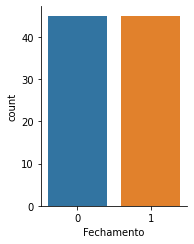

In [169]:
sns.catplot(x="Fechamento",
                data=df_test,
                kind="count", height=3.5, aspect=.8)

## 7.2 Separação entre Treino/Validação - Amostragem Sistemática
- De forma que ambas amostras representem equitativamente e proporcionalmente todo o espaço temporal (Jan de 2020 á Dez 2021), portanto, realizaremos amostragem sistemática definindo um intervalo dependente da proporção treino/validação desejada.

Para proporção de 33% validação e 66% treino o intervalo para amostragem é de 3 ( para representar todo o espaço temporal )

In [170]:
indices_validacao = np.arange(0,len(df_treino_valid),3)
indices_validacao_lista = indices_validacao.tolist()

In [171]:
#cria array com todos os indexes
indices_train = np.arange(0,len(df_treino_valid),1)
indices_train_lista = indices_train.tolist()

# seleciona os indexes que nao estejam na validacao
indices_train_lista = [ i for i in indices_train_lista if i not in indices_validacao_lista]

#transforma para array
indices_train = np.array(indices_train)

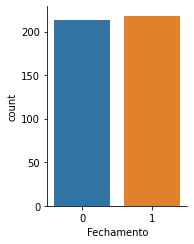

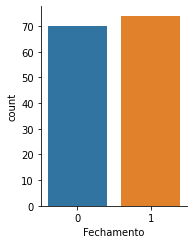

In [173]:
df_train =  df_treino_valid.iloc[indices_train]
X_train = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticias_ingles"],axis=1)
y_train = df_train['Fechamento']

df_valid = df_treino_valid.iloc[indices_validacao]
X_valid = df_valid.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticias_ingles"],axis=1)
y_valid = df_valid['Fechamento']


sns.catplot(x="Fechamento",
                data=df_train,
                kind="count", height=3.5, aspect=.8)

sns.catplot(x="Fechamento",
                data=df_valid,
                kind="count", height=3.5, aspect=.8)



In [174]:
len(df_valid)/len(df_train)

0.33410672853828305

# 8.0 Consolidação dos dados de diversas versões do sentilex (repetição e automação das etapas:

### - 5.2 (Atualização do score);
### - 6.6 (Atualização de features de dias anteriores de acordo com o novo score) e;
### - 7 (Nova reamostragem considerando novo score).

In [5]:
## Função para montar dicionarios
def montar_dicionario(versao_sentilex):
    versao = 'Versoes dicionarios sentilex/SentiLex-lem-PT01 editado v' + versao_sentilex + '.txt'
    sentilexpt = open(versao,'r',encoding='utf-8-sig')
    dic_palavra_polaridade = {}
    
    for i in sentilexpt.readlines():
        pos_ponto = i.find('.')            # obtem a posiçãodo caracter ponto
        palavra = (i[:pos_ponto])          # Pega a palavra
        pol_pos = i.find('POL')            # obtem a posição do inicio da string POL
        polaridade = (i[pol_pos+4:pol_pos+6]).replace(';','')         # obtem a polaridade da palavra
        #polaridade = (i[pol_pos+4:pol_pos+7]).replace(';','')
        dic_palavra_polaridade[palavra] = polaridade                  # atualiza o dicionario com a palavra a polaridade
    
    return dic_palavra_polaridade


## Funçao para retornar o score do sentimento lendo o dicionario
def Score_sentimento(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    l_sentimento = []                         # cria uma lista vazia
    for p in frase.split():
        l_sentimento.append(int(dic_palavra_polaridade.get(p, 0)))      # para cada palavra obtem a polaridade
        #l_sentimento.append(float(dic_palavra_polaridade.get(p, 0)))      # para cada palavra obtem a polaridade     
    #print (l_sentimento)                                                # imprime a lista de polaridades
    score = sum(l_sentimento)                                           # soma todos os valores da lista
    #if score > 0:
        #return 'Positivo, Score:{}'.format(score)                       # se maior que 0 retorna 'positivo'
    #elif score == 0:
        #return 'Neutro, Score:{}'.format(score)                         # se igual a 0 retorna 'neutro'
    #else:
        #return 'Negativo, Score:{}'.format(score)                       # se menor que 0 retorna 'negativo'
        
    return score

In [6]:
#df_final = pd.read_csv('Alldata_with_features.csv', sep=',')
df_final = pd.read_csv('Noticias_e_features.csv', sep=',')
df_final['Date'] = pd.to_datetime(df_final['Date'])
df_final

Date  Adj Close    Volume  Var%  Fechamento  \
0   2020-01-02      20.47  37774500  0.02           1   
1   2020-01-03      20.30  71595600 -0.01           0   
2   2020-01-06      20.54  81844000  0.01           1   
3   2020-01-07      20.46  32822000 -0.00           0   
4   2020-01-09      20.27  36102700 -0.00           0   
..         ...        ...       ...   ...         ...   
520 2022-06-24      26.29  53413400 -0.01           0   
521 2022-06-27      27.98  90417700  0.06           1   
522 2022-06-28      28.33  51388000  0.01           1   
523 2022-06-29      28.08  52048800 -0.01           0   
524 2022-06-30      27.93  49910100 -0.01           0   

                                              Noticias  \
0     petrobras e vale retiram seus funcionários de...   
1     petrobras reduz preços do diesel e da gasolin...   
2      petrobras faz redução em produção de petróle...   
3     o adeus da petrobras ao amazonas petrobras vê...   
4     refinarias da petrobras apresentam queda na c...   
..                                                 ...   
520   comitê de elegibilidade da petrobras dá aval ...   
521    caio andrade nega recomendação do governo pa...   
522   petrobras: novo presidente não conseguirá mud...   
523   paes de andrade falta à primeira reunião do c...   
524   caio paes de andrade: como um dos investidore...   

                                       Noticias_ingles  score  polaridade_vad  \
0     petrobras and vale withdraw their employees f...   0.00            0.00   
1     petrobras reduces diesel and gasoline prices ...   0.00            0.00   
2     petrobras advances the process of selling oil...   0.00            0.00   
3     Petrobras' goodbye to the Amazon petrobras se...  -6.00            0.50   
4     Petrobras refineries show a drop in global oi...  -3.00            0.00   
..                                                 ...    ...             ...   
520   petrobras eligibility committee approves caio...   3.00            0.15   
521   petrobras: remember the presidents in the bol...   3.00            0.00   
522   petrobras: new president will not be able to ...   9.00            0.58   
523   paes de andrade misses the first meeting of t...   0.00            0.99   
524   caio paes de andrade: how one of the pioneer ...   1.00            0.10   

     subjetividade_vad  negatividade_vad  neutralidade_vad  positividade_vad  \
0                 0.00              0.17              2.83              0.00   
1                 0.00              0.00              1.00              0.00   
2                 0.00              0.18              1.65              0.18   
3                 0.60              0.00              3.70              0.30   
4                 0.12              0.15              0.85              0.00   
..                 ...               ...               ...               ...   
520               0.87              0.40              6.71              0.89   
521               0.00              0.15              9.85              0.00   
522               1.49              0.49              9.40              0.10   
523               2.55              0.32              8.44              1.24   
524               0.65              0.30              8.35              0.35   

     composicao_vad  neg_rob  neu_rob  pos_rob  pos_finbert  neg_finbert  \
0             -0.38     1.40     1.54     0.06         0.00        -2.00   
1              0.00     0.13     0.78     0.09         1.00         0.00   
2              0.00     0.13     1.79     0.08         0.00         0.00   
3              0.18     0.20     3.44     0.35         0.00         0.00   
4             -0.27     0.29     0.68     0.03         0.00        -1.00   
..              ...      ...      ...      ...          ...          ...   
520            0.90     1.46     5.83     0.71         0.00        -0.98   
521           -0.05     1.23     8.23     0.54         1.00         0.00   
522       

In [7]:
versoes_sentilex = ['65_1','65_2','65_3','65_4','65_5','70_1','70_2','70_3','70_4','70_5','75_1','75_2','75_3','75_4','75_5','80_1','80_2','80_3','80_4','80_5']
dict_dados_variacoes_sentilex = {}

correlacoes = []

for versao in versoes_sentilex:
    
    #print(versao)
    ## Atualizando Score Sentilex (Etapa 5.1)
    dic_palavra_polaridade  = montar_dicionario(versao)

    ### Copia o df atualiza o score do dicionário recém-lido
    df_final99 = df_final.copy()
    
    df_final99['score'] = df_final99['Noticias'].apply(lambda x: Score_sentimento(str(x)))
    
    ### Criação de novas features combinadas
    #df_final99['pos_combinada'] = (df_final99['positividade_vad'] * df_final99['pos_rob'] * df_final99['pos_finbert'])**1/2
    #df_final99['neg_combinada'] = (df_final99['negatividade_vad'] * df_final99['neg_rob'] * df_final99['neg_finbert'])**1/2
    #df_final99['neu_combinada'] = (df_final99['neutralidade_vad'] * df_final99['neu_rob'] * df_final99['neu_finbert'])**1/2
    
    
    #pesos_aleatorios = np.random.random(3).tolist()
    #pesos_aleatorios
    
    #df_final99['pos_teste'] = 3* df_final99['positividade_vad'] + 2* df_final99['pos_rob'] + 1*df_final99['pos_finbert']
    #df_final99['neg_teste'] = 2* df_final99['negatividade_vad'] + 3* df_final99['neg_rob'] + 1*df_final99['neg_finbert']
    #df_final99['neu_teste'] = 1* df_final99['neutralidade_vad'] + 3* df_final99['neu_rob'] + 2* df_final99['neu_finbert']
        
    #corr_pos = df_final99.corr().iloc[20, 3]
    #corr_neg = df_final99.corr().iloc[21, 3]
    #corr_neu = df_final99.corr().iloc[22, 3]
    
    #correlacoes.append(np.array([corr_pos,corr_neg,corr_neu,pesos_aleatorios[0],pesos_aleatorios[1],pesos_aleatorios[2]]))
    
    #df_final99['pos_teste'] = 3* df_final99['positividade_vad'] + 2* df_final99['pos_rob'] + 1*df_final99['pos_finbert']
    #df_final99['neg_teste'] = 2* df_final99['negatividade_vad'] + 3* df_final99['neg_rob'] + 1*df_final99['neg_finbert']
    #df_final99['neu_teste'] = 1* df_final99['neutralidade_vad'] + 3* df_final99['neu_rob'] + 2* df_final99['neu_finbert']
    
    
    features = ['polaridade_vad', 'subjetividade_vad', 'negatividade_vad', 'neutralidade_vad', 'positividade_vad',
    'composicao_vad','score', 'neg_rob','neu_rob','pos_rob','pos_finbert', 'neg_finbert', 'neu_finbert']
    
    #features = ['polaridade_vad', 'subjetividade_vad', 'negatividade_vad', 'neutralidade_vad', 'positividade_vad', 'composicao_vad','score', 'neg_rob','neu_rob','pos_rob','pos_finbert', 'neg_finbert', 'neu_finbert','pos_combinada','neg_combinada','neu_combinada']
    
    featuresd1 = [i + "d1" for i in features]
    featuresd2 = [i + "d2" for i in features]
    featuresd3 = [i + "d3" for i in features]
    featuresd4 = [i + "d4" for i in features]


    #Criando as colunas de features para d-1, d-2, d-3, d-4 e inicializando com valores zeros:
    for i in features:
        df_final99[i+"d1"] = 0
        df_final99[i+"d2"] = 0
        df_final99[i+"d3"] = 0
        df_final99[i+"d4"] = 0


    import itertools

    #atualiza as features de d-1
    for a,b in itertools.zip_longest(features,featuresd1):
        df_final99[b] = df_final99.shift(periods=1)[a]

    #atualiza as features de d-2
    for a,b in itertools.zip_longest(features,featuresd2):
        df_final99[b] = df_final99.shift(periods=2)[a]

    #atualiza as features de d-3
    for a,b in itertools.zip_longest(features,featuresd3):
        df_final99[b] = df_final99.shift(periods=3)[a]

    #atualiza as features de d-4
    for a,b in itertools.zip_longest(features,featuresd4):
        df_final99[b] = df_final99.shift(periods=4)[a]


    df_final99 = df_final99.dropna()


    ## Aplicando mesma reamostragem

    from dateutil import parser
    df_treino_valid = df_final99[(df_final99['Date'] <= parser.parse('2021-12-31'))]
    df_test = df_final99[(df_final99['Date'] > parser.parse('2021-12-31'))]
    #df_test.Date.unique()

    indices_validacao = np.arange(0,len(df_treino_valid),3)
    indices_validacao_lista = indices_validacao.tolist()

    #cria array com todos os indexes
    indices_train = np.arange(0,len(df_treino_valid),1)
    indices_train_lista = indices_train.tolist()

    # seleciona os indexes que nao estejam na validacao para compor o treino
    indices_train_lista = [ i for i in indices_train_lista if i not in indices_validacao_lista]
    
    #transforma para array
    indices_train = np.array(indices_train_lista)

    # Redefinindo os datasets
    df_train =  df_treino_valid.iloc[indices_train]                 
                   
    df_valid = df_treino_valid.iloc[indices_validacao]
                      
    
    dict_dados_variacoes_sentilex[versao] = [df_train,df_valid,df_test]

## 8.1 Etapa adicional: Feature Engineering (gerando features a partir da combinação linear de todas as features)

- Método: Combinação linear aleatoria entre 3 features avaliando a correlação da combinação Vs correlação das variáveis únicas.

In [7]:
df_final99.corr().sort_values(by = 'Fechamento', ascending = False).head(10)

Adj Close  Volume  Var%  Fechamento  score  polaridade_vad  \
Fechamento             0.05   -0.01  0.61        1.00  -0.03            0.00   
Var%                   0.04   -0.11  1.00        0.61  -0.08           -0.04   
composicao_vadd2      -0.01   -0.08  0.04        0.06  -0.00            0.07   
neg_finbertd2         -0.25   -0.10  0.07        0.06  -0.02           -0.07   
neg_finbertd1         -0.26   -0.11  0.02        0.06  -0.03           -0.03   
Adj Close              1.00   -0.18  0.04        0.05   0.07            0.13   
neg_finbert           -0.26   -0.18  0.08        0.04   0.00           -0.11   
pos_finbert            0.16    0.06 -0.01        0.03  -0.04            0.23   
pos_finbertd3          0.16    0.00 -0.02        0.03  -0.06            0.04   
neg_finbertd4         -0.25   -0.08  0.00        0.03  -0.04           -0.12   

                  subjetividade_vad  negatividade_vad  neutralidade_vad  \
Fechamento                    -0.02             -0.04             -0.01   
Var%                          -0.06             -0.08             -0.02   
composicao_vadd2               0.04             -0.10             -0.03   
neg_finbertd2                 -0.17             -0.18             -0.26   
neg_finbertd1                 -0.19             -0.25             -0.23   
Adj Close                      0.39              0.36              0.59   
neg_finbert                   -0.32             -0.60             -0.38   
pos_finbert                    0.22              0.13              0.36   
pos_finbertd3                  0.05              0.11              0.12   
neg_finbertd4                 -0.12             -0.15             -0.22   

                  positividade_vad  ...  pos_finbertd3  pos_finbertd4  \
Fechamento                   -0.05  ...           0.03           0.01   
Var%                         -0.03  ...          -0.02          -0.01   
composicao_vadd2             -0.04  ...           0.11           0.03   
neg_finbertd2                -0.18  ...          -0.10          -0.00   
neg_finbertd1                -0.16  ...           0.00          -0.06   
Adj Close                     0.31  ...           0.16           0.16   
neg_finbert                  -0.22  ...          -0.06          -0.22   
pos_finbert                   0.44  ...          -0.02           0.06   
pos_finbertd3                 0.15  ...           1.00           0.04   
neg_finbertd4                -0.18  ...          -0.06          -0.05   

                  neg_finbertd1  neg_finbertd2  neg_finbertd3  neg_finbertd4  \
Fechamento                 0.06           0.06           0.01           0.03   
Var%                       0.02           0.07           0.04           0.00   
composicao_vadd2           0.06           0.28           0.05          -0.02   
neg_finbertd2              0.23           1.00           0.23           0.09   
neg_finbertd1              1.00           0.23           0.09           0.06   
Adj Close                 -0.26          -0.25          -0.25          -0.25   
neg_finbert                0.23           0.09           0.07           0.10   
pos_finbert               -0.06          -0.17          -0.13          -0.05   
pos_finbertd3              0.00          -0.10          -0.05          -0.06   
neg_finbertd4              0.06           0.09           0.22           1.00   

                  neu_finbertd1  neu_finbertd2  neu_finbertd3  neu_finbertd4  
Fechamento                -0.02          -0.03          -0.06          -0.04  
Var%                      -0.03           0.02          -0.07          -0.05  
composicao_vadd2          -0.01           0.15          -0.03          -0.00  
neg_finbertd2             -0.20          -0.14          -0.25          -0.19  
neg_finbertd1             -0.13          -0.24          -0.18          -0.21  
Adj Close                  0.56           0.56           0.55           0.54  
neg_finbert               -0.24          -0.18          -0.21          -0

In [7]:
import random
from random import sample

correlacoes = []
lista_colunas_para_sorteio = df_final99.columns.tolist()[8:72] + ['score']

for i in range(1000000):
    
    print(i)  
    
    ## Definição dos pesos
    fator_mult = random.randint(0, 8)
    pesos_aleatorios = np.random.random(3).tolist()
    p1 = pesos_aleatorios[0] * fator_mult
    p2 = pesos_aleatorios[1] * fator_mult
    p3 = pesos_aleatorios[2] * fator_mult
    
    ## Definição das colunas:
    amostras = sample(range(0,64,1), 3)
    
    var1 = lista_colunas_para_sorteio[amostras[0]]
    var2 = lista_colunas_para_sorteio[amostras[1]]
    var3 = lista_colunas_para_sorteio[amostras[2]]
    
    ## Calculando correlação da var sorteada
    corr_var1 = df_final99.corr()[var1][3]
    corr_var2 = df_final99.corr()[var2][3]
    corr_var3 = df_final99.corr()[var3][3]
    
    max_corr_var_sorteadas = max(corr_var1,corr_var2,corr_var3)
    
    df_final99['comp1'] = p1 * df_final99[var1] + p2 * df_final99[var2] + p3 * df_final99[var3]
    df_final99['comp2'] = p1 * df_final99[var1] + p3 * df_final99[var2] + p2 * df_final99[var3]
    df_final99['comp3'] = p2 * df_final99[var1] + p1 * df_final99[var2] + p3 * df_final99[var3]
    df_final99['comp4'] = p2 * df_final99[var1] + p3 * df_final99[var2] + p1 * df_final99[var3]
    df_final99['comp5'] = p3 * df_final99[var1] + p1 * df_final99[var2] + p2 * df_final99[var3]
    df_final99['comp6'] = p3 * df_final99[var1] + p2 * df_final99[var2] + p1 * df_final99[var3]

    
    
    #df_final99['pos_teste'] = p1 * df_final99['positividade_vad'] + p2 * df_final99['pos_rob'] + p3 * df_final99['pos_finbert']
    #df_final99['neg_teste'] = p1 * df_final99['negatividade_vad'] + p2 * df_final99['neg_rob'] + p3 * df_final99['neg_finbert']
    #df_final99['neu_teste'] = p1 * df_final99['neutralidade_vad'] + p2 * df_final99['neu_rob'] + p3 * df_final99['neu_finbert']

    corr1 = df_final99.corr().iloc[69:, 3][0]
    corr2 = df_final99.corr().iloc[69:, 3][1]
    corr3 = df_final99.corr().iloc[69:, 3][2]
    corr4 = df_final99.corr().iloc[69:, 3][3]
    corr5 = df_final99.corr().iloc[69:, 3][4]
    corr6 = df_final99.corr().iloc[69:, 3][5]

    if corr1<0:
        corr1 = -1 * corr1
    if corr2<0:
        corr2 = -1 * corr2    
    if corr3<0:
        corr3 = -1 * corr3
    if corr4<0:
        corr4 = -1 * corr4        
    if corr5<0:
        corr5 = -1 * corr5        
    if corr6<0:
        corr6 = -1 * corr6
        
    melhor_corr = max(corr1,corr2,corr3,corr4,corr5,corr6)
    
    ## Sò armazena os resultados se a melhor correlação das combinações testadas for maior das variaveis individuais sorteadas
    if melhor_corr > max_corr_var_sorteadas:
        correlacoes.append(np.array([melhor_corr,var1,var2,var3,p1,p2,p3,corr1,corr2,corr3,corr4,corr5,corr6]))
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41


KeyboardInterrupt: 

In [223]:
resultados_correlacoes_df = pd.DataFrame(np.array(correlacoes), columns=['melhor_corr','var1','var2','var3','p1','p2','p3','comb1','comb2','comb3','comb4','comb5','comb6'])
resultados_correlacoes_df.sort_values(by = 'melhor_corr', ascending = False).head(50)

melhor_corr                 var1                 var2  \
129  0.09624266389210755   negatividade_vadd2     positividade_vad   
211  0.09311118879868849            neg_robd4        neg_finbertd4   
611  0.09301175343780346   negatividade_vadd4   negatividade_vadd2   
122  0.09281276902459927   positividade_vadd1              neg_rob   
640  0.09024981810595117   negatividade_vadd2   positividade_vadd1   
445  0.08913074095918194     negatividade_vad            neg_robd2   
56   0.08788518476581675   positividade_vadd1   negatividade_vadd4   
70   0.08763712593930685   negatividade_vadd2     positividade_vad   
297  0.08617618854079172            neg_robd4            neu_robd3   
570   0.0855675024702595              neg_rob            neg_robd4   
2    0.08511339266102887     composicao_vadd1   positividade_vadd3   
511  0.08454621661538231        neg_finbertd3            neg_robd4   
360  0.08430837912892222            neg_robd4              scored4   
206   0.0841734152712781     polaridade_vadd2   positividade_vadd1   
595  0.08414657905867541            pos_robd1            neg_robd4   
68   0.08238879880622098   negatividade_vadd2              scored4   
334   0.0822575149682251              scored3        neg_finbertd1   
543   0.0818745871298697              neg_rob   positividade_vadd3   
144  0.08165293419887354     polaridade_vadd4            neg_robd2   
322  0.08161554202918023   positividade_vadd4   neutralidade_vadd3   
114  0.08154181153532374            neg_robd4              scored2   
8    0.08148356227095133   negatividade_vadd2            neg_robd2   
120  0.08085751954466228        neu_finbertd1   negatividade_vadd2   
580   0.0799367936310004            pos_robd1     polaridade_vadd1   
261  0.07951228068773632        neu_finbertd3  subjetividade_vadd4   
442  0.07931190962170909  subjetividade_vadd1     composicao_vadd4   
621  0.07901416667772158  subjetividade_vadd3            neg_robd4   
210  0.07851056901225296       polaridade_vad            pos_robd2   
437  0.07834604243229326            neg_robd2        neg_finbertd3   
5    0.07798555649709521   negatividade_vadd2   positividade_vadd3   
612   0.0779584523670132        neg_finbertd2   positividade_vadd2   
323  0.07795752633758055    subjetividade_vad     polaridade_vadd2   
12    0.0779571947081072            pos_robd2        neu_finbertd3   
377  0.07753175715907197              scored1        neu_finbertd3   
42   0.07740247154978029              scored4   negatividade_vadd4   
55   0.07701114458366162   negatividade_vadd4   negatividade_vadd1   
470  0.07693663856658248            neg_robd1   negatividade_vadd2   
77   0.07617426055864615            neg_robd2  subjetividade_vadd4   
130  0.07588953336434387          neg_finbert            neg_robd2   
420  0.07571384611387857            neg_robd4          pos_finbert   
337  0.07557236073452687     polaridade_vadd4   positividade_vadd1   
484   0.0754837715002421   negatividade_vadd3   positividade_vadd1   
532  0.07422899190093184     polaridade_vadd4            neg_robd4   
97   0.07363903367979738        neg_finbertd3   negatividade_vadd2   
509  0.07351466092371592            neg_robd2   negatividade_vadd4   
75   0.07327427170168671            neu_robd4            neg_robd4   
646  0.07319418731002278     composicao_vadd4            neg_robd4   
329  0.07291434863474879       polaridade_vad  subjetividade_vadd4   
113   0.0727733239685336       polaridade_vad     polaridade_vadd2   
112  0.07269979523302839            neg_robd4   negatividade_vadd3   

                    var3                    p1                   p2  \
129   positividade_vadd1    0.3237580419121905    2.185073972242591   
211   positividade_vadd4    0.5723120737826564   0.3263838132594289   
611        pos_finbertd2     4.991941230177784  0.39376865106673176   
122            neg_robd4    0.9234384654695127   1.6463854683726826   
640     polaridade_vadd4    1.0630645340786804   2.5357207058990205   
445            n

## Criação de novas features de acordo com os resultados dos experimentos

In [8]:
## Os seguintes resultados compõe as melhores combinações de features:

# corr = 0.010
df_final99['combinacao1'] = 0.29199120719327354 * df_final99['polaridade_vadd2'] + 0.5022549394129787 * df_final99['negatividade_vadd2'] + 0.29199120719327354 * df_final99['positividade_vadd1']

# corr = 0.088
df_final99['combinacao2'] = 0.17326302219131495 * df_final99['scored4'] + 0.9331897755934577 * df_final99['neg_robd4'] + 0.34827167253272817 * df_final99['composicao_vadd1']

df_final99.corr().tail(10)

Adj Close  Volume  Var%  Fechamento  score  polaridade_vad  \
neg_finbertd1      -0.26   -0.11  0.02        0.06  -0.03           -0.03   
neg_finbertd2      -0.25   -0.10  0.07        0.06  -0.02           -0.07   
neg_finbertd3      -0.25   -0.14  0.04        0.01   0.00           -0.03   
neg_finbertd4      -0.25   -0.08  0.00        0.03  -0.04           -0.12   
neu_finbertd1       0.56    0.01 -0.03       -0.02   0.08            0.14   
neu_finbertd2       0.56    0.00  0.02       -0.03   0.08            0.12   
neu_finbertd3       0.55    0.01 -0.07       -0.06   0.04            0.08   
neu_finbertd4       0.54   -0.00 -0.05       -0.04   0.03            0.09   
combinacao1         0.41    0.06 -0.10       -0.11   0.09            0.09   
combinacao2         0.38    0.06 -0.06       -0.09   0.05            0.12   

               subjetividade_vad  negatividade_vad  neutralidade_vad  \
neg_finbertd1              -0.19             -0.25             -0.23   
neg_finbertd2              -0.17             -0.18             -0.26   
neg_finbertd3              -0.11             -0.09             -0.23   
neg_finbertd4              -0.12             -0.15             -0.22   
neu_finbertd1               0.36              0.32              0.48   
neu_finbertd2               0.29              0.25              0.43   
neu_finbertd3               0.32              0.34              0.49   
neu_finbertd4               0.30              0.27              0.40   
combinacao1                 0.24              0.24              0.34   
combinacao2                 0.21              0.22              0.32   

               positividade_vad  ...  neg_finbertd1  neg_finbertd2  \
neg_finbertd1             -0.16  ...           1.00           0.23   
neg_finbertd2             -0.18  ...           0.23           1.00   
neg_finbertd3             -0.09  ...           0.09           0.23   
neg_finbertd4             -0.18  ...           0.06           0.09   
neu_finbertd1              0.25  ...          -0.13          -0.20   
neu_finbertd2              0.23  ...          -0.24          -0.14   
neu_finbertd3              0.28  ...          -0.18          -0.25   
neu_finbertd4              0.20  ...          -0.21          -0.19   
combinacao1                0.19  ...          -0.27          -0.50   
combinacao2                0.22  ...          -0.09          -0.16   

               neg_finbertd3  neg_finbertd4  neu_finbertd1  neu_finbertd2  \
neg_finbertd1           0.09           0.06          -0.13          -0.24   
neg_finbertd2           0.23           0.09          -0.20          -0.14   
neg_finbertd3           1.00           0.22          -0.23          -0.20   
neg_finbertd4           0.22           1.00          -0.19          -0.23   
neu_finbertd1          -0.23          -0.19           1.00           0.45   
neu_finbertd2          -0.20          -0.23           0.45           1.00   
neu_finbertd3          -0.14          -0.20           0.39           0.44   
neu_finbertd4          -0.25          -0.14           0.47           0.39   
combinacao1            -0.25          -0.18           0.48           0.45   
combinacao2            -0.31          -0.61           0.38           0.32   

               neu_finbertd3  neu_finbertd4  combinacao1  combinacao2  
neg_finbertd1          -0.18          -0.21        -0.27        -0.09  
neg_finbertd2          -0.25          -0.19        -0.50        -0.16  
neg_finbertd3          -0.14          -0.25        -0.25        -0.31  
neg_finbertd4          -0.20          -0.14        -0.18        -0.61  
neu_finbertd1           0.39           0.47         0.48         0.38  
neu_finbertd2           0.44           0.39         0.45         0.32  
neu_finbertd3           1.00           0.44         0.37         0.36  
neu_finbertd4           0.44           1.00         0.33         0.49  
combinacao1             0.37           0.33         1.00         0.38  
combinacao2             0.36       

# Atualizando o dicionário com as novas features:

In [9]:
versoes_sentilex = ['65_1','65_2','65_3','65_4','65_5','70_1','70_2','70_3','70_4','70_5','75_1','75_2','75_3','75_4','75_5','80_1','80_2','80_3','80_4','80_5']
dict_dados_variacoes_sentilex = {}

correlacoes = []

for versao in versoes_sentilex:
    
    #print(versao)
    ## Atualizando Score Sentilex (Etapa 5.1)
    dic_palavra_polaridade  = montar_dicionario(versao)

    ### Copia o df atualiza o score do dicionário recém-lido
    df_final99 = df_final.copy()
    
    df_final99['score'] = df_final99['Noticias'].apply(lambda x: Score_sentimento(str(x)))
    
    ### Criação de novas features combinadas
    #df_final99['pos_combinada'] = (df_final99['positividade_vad'] * df_final99['pos_rob'] * df_final99['pos_finbert'])**1/2
    #df_final99['neg_combinada'] = (df_final99['negatividade_vad'] * df_final99['neg_rob'] * df_final99['neg_finbert'])**1/2
    #df_final99['neu_combinada'] = (df_final99['neutralidade_vad'] * df_final99['neu_rob'] * df_final99['neu_finbert'])**1/2
    
    
    #pesos_aleatorios = np.random.random(3).tolist()
    #pesos_aleatorios
    
    #df_final99['pos_teste'] = 3* df_final99['positividade_vad'] + 2* df_final99['pos_rob'] + 1*df_final99['pos_finbert']
    #df_final99['neg_teste'] = 2* df_final99['negatividade_vad'] + 3* df_final99['neg_rob'] + 1*df_final99['neg_finbert']
    #df_final99['neu_teste'] = 1* df_final99['neutralidade_vad'] + 3* df_final99['neu_rob'] + 2* df_final99['neu_finbert']
        
    #corr_pos = df_final99.corr().iloc[20, 3]
    #corr_neg = df_final99.corr().iloc[21, 3]
    #corr_neu = df_final99.corr().iloc[22, 3]
    
    #correlacoes.append(np.array([corr_pos,corr_neg,corr_neu,pesos_aleatorios[0],pesos_aleatorios[1],pesos_aleatorios[2]]))
    
    #df_final99['pos_teste'] = 3* df_final99['positividade_vad'] + 2* df_final99['pos_rob'] + 1*df_final99['pos_finbert']
    #df_final99['neg_teste'] = 2* df_final99['negatividade_vad'] + 3* df_final99['neg_rob'] + 1*df_final99['neg_finbert']
    #df_final99['neu_teste'] = 1* df_final99['neutralidade_vad'] + 3* df_final99['neu_rob'] + 2* df_final99['neu_finbert']
    
    
    features = ['polaridade_vad', 'subjetividade_vad', 'negatividade_vad', 'neutralidade_vad', 'positividade_vad',
    'composicao_vad','score', 'neg_rob','neu_rob','pos_rob','pos_finbert', 'neg_finbert', 'neu_finbert']
    
    #features = ['polaridade_vad', 'subjetividade_vad', 'negatividade_vad', 'neutralidade_vad', 'positividade_vad', 'composicao_vad','score', 'neg_rob','neu_rob','pos_rob','pos_finbert', 'neg_finbert', 'neu_finbert','pos_combinada','neg_combinada','neu_combinada']
    
    featuresd1 = [i + "d1" for i in features]
    featuresd2 = [i + "d2" for i in features]
    featuresd3 = [i + "d3" for i in features]
    featuresd4 = [i + "d4" for i in features]


    #Criando as colunas de features para d-1, d-2, d-3, d-4 e inicializando com valores zeros:
    for i in features:
        df_final99[i+"d1"] = 0
        df_final99[i+"d2"] = 0
        df_final99[i+"d3"] = 0
        df_final99[i+"d4"] = 0


    import itertools

    #atualiza as features de d-1
    for a,b in itertools.zip_longest(features,featuresd1):
        df_final99[b] = df_final99.shift(periods=1)[a]

    #atualiza as features de d-2
    for a,b in itertools.zip_longest(features,featuresd2):
        df_final99[b] = df_final99.shift(periods=2)[a]

    #atualiza as features de d-3
    for a,b in itertools.zip_longest(features,featuresd3):
        df_final99[b] = df_final99.shift(periods=3)[a]

    #atualiza as features de d-4
    for a,b in itertools.zip_longest(features,featuresd4):
        df_final99[b] = df_final99.shift(periods=4)[a]


    df_final99 = df_final99.dropna()

    
    
    ## Adição das features recém criadas (combinações)
    # corr = 0.010
    df_final99['combinacao1'] = 0.29199120719327354 * df_final99['polaridade_vadd2'] + 0.5022549394129787 * df_final99['negatividade_vadd2'] + 0.29199120719327354 * df_final99['positividade_vadd1']

    # corr = 0.088
    df_final99['combinacao2'] = 0.17326302219131495 * df_final99['scored4'] + 0.9331897755934577 * df_final99['neg_robd4'] + 0.34827167253272817 * df_final99['composicao_vadd1']



    ## Aplicando mesma reamostragem

    from dateutil import parser
    df_treino_valid = df_final99[(df_final99['Date'] <= parser.parse('2021-12-31'))]
    df_test = df_final99[(df_final99['Date'] > parser.parse('2021-12-31'))]
  
    
    #df_treino_valid = df_final99[(df_final99['Date'] <= parser.parse('2022-03-31'))] 
    #df_test = df_final99[(df_final99['Date'] > parser.parse('2021-12-31')) & (df_final99['Date'] <= parser.parse('2022-03-31'))]
    #df_test = df_final99[(df_final99['Date'] > parser.parse('2022-03-31'))]

    
    indices_validacao = np.arange(0,len(df_treino_valid),3)
    indices_validacao_lista = indices_validacao.tolist()

    #cria array com todos os indexes
    indices_train = np.arange(0,len(df_treino_valid),1)
    indices_train_lista = indices_train.tolist()

    # seleciona os indexes que nao estejam na validacao para compor o treino
    indices_train_lista = [ i for i in indices_train_lista if i not in indices_validacao_lista]
    
    #transforma para array
    indices_train = np.array(indices_train_lista)

    # Redefinindo os datasets
    df_train =  df_treino_valid.iloc[indices_train]                 
                   
    df_valid = df_treino_valid.iloc[indices_validacao]
                      
    
    dict_dados_variacoes_sentilex[versao] = [df_train,df_valid,df_test]

In [8]:
len(df_train), len(df_valid), len(df_test), 

(287, 144, 90)

os dados de validação correspondem a 33% dos dados de treino+valid

# 9.0 Prototipação

Iremos treinar modelos ingenuos com dados de treino e verificar quais deles performam melhor em:

- Dados de validação (2020 e 2021): Para avaliar a capacidade de generalização dos algoritmos
- Dados de teste (2022): Para avaliar a performance em dados de produção.

A ideia inicial é analisar o potencial de generalização de cada algorítmo assim como a performance em produção, para isso o experimento será repetido 10x treinando o modelo com um conjunto distinto composto por 80% dos dados de treino a cada repetição.


Pipeline:

-> Seleção da versao do sentilex (20 versões) -> Holdout aleatório de 80% dos dados de treino -> Aplicação de PCA / Normalização / Dados brutos (3 técnicas de pré-processamento) -> Treino -> Avaliação sobre dados de validação / Avaliação sobre dados de teste -> Repete 10x

In [233]:
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
    
df_models_valid = pd.DataFrame()
df_models_test = pd.DataFrame()

#Loop numero de repetições do experimento
for rep in range(1):
    
   ##Loop do dicionário Sentilex Escolhido: 
    for versao in dict_dados_variacoes_sentilex.keys():
        
        print("Iterando versão do sentilex = {} - Repetição = {}".format(versao,rep))

        df_train = dict_dados_variacoes_sentilex[versao][0]
        df_valid = dict_dados_variacoes_sentilex[versao][1]
        df_test = dict_dados_variacoes_sentilex[versao][2]

        #Separando os dados (é a mesma separação de indexes independente da versao do sentilex, seed, etc)
        X_test2 = df_test.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticias_ingles"],axis=1)
        y_test2 = df_test['Fechamento']

        X_train2 = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticias_ingles"],axis=1)
        y_train2 = df_train['Fechamento']

        X_valid2 = df_valid.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticias_ingles"],axis=1)
        y_valid2 = df_valid['Fechamento']


        #Definindo dados de treino (aprendendo com 70% da amostra de treino)
        X_train4, X_descarte, y_train4, y_descarte = train_test_split(X_train2, y_train2, test_size=0.8, random_state=rep, stratify = y_train2)
            
        #X_train4 = X_train2
        #y_train4 = y_train2 
        

        # Normalizando - FIT APENAS TREINO
        scaler = StandardScaler()
        scaler.fit(X_train4)
        
        
        X_train_norm = scaler.transform(X_train4)
        
        X_test_norm = scaler.transform(X_test2)
        
        X_valid_norm = scaler.transform(X_valid2)
        
        
        ########################### Previsao dados validação ###########################
        #Treinando e avaliando dados nao normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train4, X_valid2, y_train4, y_valid2)
        models['n_PCA'] = "N/A"
        models['versao_sentilex'] = versao
        models['Normalizacao'] = "NAO"
        df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)
        
        #Treinando e avaliando dados normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train_norm, X_valid_norm, y_train4, y_valid2)
        models['n_PCA'] = "N/A"
        models['versao_sentilex'] = versao
        models['Normalizacao'] = "SIM"
        df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)
        
        ########################### Previsao dados teste ###########################
                #Treinando e avaliando dados nao normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train4, X_test2, y_train4, y_test2)
        models['n_PCA'] = "N/A"
        models['versao_sentilex'] = versao
        models['Normalizacao'] = "NAO"
        df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)
        
        #Treinando e avaliando dados normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train_norm, X_test_norm, y_train4, y_test2)
        models['n_PCA'] = "N/A"
        models['versao_sentilex'] = versao
        models['Normalizacao'] = "SIM"
        df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)
        
        
         ## iterar sobre a quantidade de reduções de dimensionalidade das features (PCA) de 9 a 12 reduções
        for i in range(9,13,1): 

            #Aplicando PCA - FIT APENAS TREINO
            pca = PCA(n_components=i)
            
            pca.fit(X_train4,y_train4)
            
            X_train_pca = pca.transform(X_train4)
            X_test_pca = pca.transform(X_test2)
            X_valid_pca = pca.transform(X_valid2)

            #Aplicando Normalização - FIT APENAS TREINO
            scaler = StandardScaler()

            scaler.fit(X_train_pca)
            
            X_train_pca_normalized = scaler.transform(X_train_pca)
            
            X_test_pca_normalized = scaler.transform(X_test_pca)
            
            X_valid_pca_normalized = scaler.transform(X_valid_pca)


            ########################### Previsao dados validação ###########################
            
            #Testando PCA + normalizado 
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(X_train_pca_normalized, X_valid_pca_normalized, y_train4, y_valid2)
            #models['conjunto_features'] = k
            models['n_PCA'] = i
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "SIM"
            # Armazenando os modelos
            df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)

            #Testando PCA
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(X_train_pca, X_valid_pca, y_train4, y_valid2)
            #models['conjunto_features'] = k
            models['n_PCA'] = i 
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "NAO"
            # Armazenando os modelos
            df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True) 
            
            ########################### Previsao dados teste ###########################
            
            #Testando PCA + normalizado
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(X_train_pca_normalized, X_test_pca_normalized, y_train4, y_test2)
            #models['conjunto_features'] = k
            models['n_PCA'] = i
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "SIM"
            # Armazenando os modelos
            df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)

            #Testando PCA
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(X_train_pca, X_test_pca, y_train4, y_test2)
            #models['conjunto_features'] = k
            models['n_PCA'] = i 
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "NAO"
            # Armazenando os modelos
            df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)

Iterando versão do sentilex = 65_1 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.48it/s]


Iterando versão do sentilex = 65_2 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Iterando versão do sentilex = 65_3 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.20it/s]


Iterando versão do sentilex = 65_4 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.32it/s]


Iterando versão do sentilex = 65_5 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.61it/s]


Iterando versão do sentilex = 70_1 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.76it/s]


Iterando versão do sentilex = 70_2 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.59it/s]


Iterando versão do sentilex = 70_3 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.72it/s]


Iterando versão do sentilex = 70_4 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Iterando versão do sentilex = 70_5 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Iterando versão do sentilex = 75_1 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.08it/s]


Iterando versão do sentilex = 75_2 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.49it/s]


Iterando versão do sentilex = 75_4 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.39it/s]


Iterando versão do sentilex = 75_5 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.36it/s]


Iterando versão do sentilex = 80_1 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.49it/s]


Iterando versão do sentilex = 80_2 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Iterando versão do sentilex = 80_3 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 80_4 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.41it/s]


Iterando versão do sentilex = 80_5 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.62it/s]


In [17]:
pd.set_option('display.precision',5)

In [18]:
pd.reset_option('^display.',silent=True)

In [236]:
df_prototipacao = pd.merge(left = df_models_valid, right = df_models_test, how = 'left', on = ['Model','n_PCA','versao_sentilex','Normalizacao'], suffixes=('_valid', '_test'))

##Media acuracia teste e valid
df_prototipacao['Acuracia_balanc_test_valid'] = (df_prototipacao['Accuracy_valid'] + df_prototipacao['Accuracy_test'])/2

#df_prototipacao.groupby(['Model','n_PCA','versao_sentilex','Normalizacao']).agg({'Accuracy_valid':np.mean, 'Balanced Accuracy_valid':np.mean, 'ROC AUC_valid':np.mean, 'F1 Score_valid':np.mean, 'Accuracy_test':np.mean, 'Balanced Accuracy_test':np.mean, 'ROC AUC_test':np.mean, 'F1 Score_test':np.mean}).sort_values(by='ROC AUC_valid', ascending=False).head(50)
df_prototipacao.groupby(['Model','n_PCA','versao_sentilex','Normalizacao']).agg({'Accuracy_valid':np.mean, 'Accuracy_test':np.mean, 'Acuracia_balanc_test_valid': np.mean}).sort_values(by='Acuracia_balanc_test_valid', ascending=False).head(50)

## Agrupa os resultados e retorna acuracy_teste > 60 e ordena por acuracy_valid
df_agrupado = df_prototipacao.groupby(['Model','n_PCA','versao_sentilex','Normalizacao']).agg({'Accuracy_valid':np.mean, 'Accuracy_test':np.mean, 'Acuracia_balanc_test_valid': np.mean}).sort_values(by='Acuracia_balanc_test_valid', ascending=False)
df_filtrado = df_agrupado[(df_agrupado['Accuracy_test']>0.6)].sort_values(by='Accuracy_valid', ascending=False)
df_filtrado.head(50)

Accuracy_valid  \
Model                         n_PCA versao_sentilex Normalizacao                   
NuSVC                         12    75_3            NAO                 0.645833   
                              11    75_3            SIM                 0.618056   
                                                    NAO                 0.597222   
LabelSpreading                12    75_3            SIM                 0.590278   
SVC                           10    75_3            SIM                 0.590278   
LabelPropagation              12    75_3            NAO                 0.590278   
LabelSpreading                12    75_3            NAO                 0.590278   
LabelPropagation              12    75_3            SIM                 0.590278   
QuadraticDiscriminantAnalysis 11    80_1            SIM                 0.583333   
ExtraTreesClassifier          9     75_3            SIM                 0.576389   
NuSVC                         10    75_3            SIM                 0.576389   
ExtraTreesClassifier          9     75_3            NAO                 0.569444   
                              11    75_3            NAO                 0.569444   
BaggingClassifier             9     80_3            SIM                 0.562500   
SGDClassifier                 10    75_3            SIM                 0.562500   
LabelSpreading                11    75_3            SIM                 0.562500   
ExtraTreeClassifier           11    80_2            SIM                 0.555556   
LabelPropagation              11    75_3            SIM                 0.555556   
QuadraticDiscriminantAnalysis 12    80_1            SIM                 0.555556   
NuSVC                         9     75_3            NAO                 0.555556   
QuadraticDiscriminantAnalysis 10    80_1            SIM                 0.555556   
NuSVC                         10    75_3            NAO                 0.548611   
                              9     75_3            SIM                 0.548611   
ExtraTreeClassifier           11    80_2            NAO                 0.541667   
ExtraTreesClassifier          11    75_3            SIM                 0.534722   
LabelSpreading                10    75_3            SIM                 0.534722   
LabelPropagation              10    75_3            SIM                 0.534722   
                                                    NAO                 0.527778   
LabelSpreading                10    75_3            NAO                 0.527778   
SGDClassifier                 9     80_5            NAO                 0.513889   
LabelPropagation              9     75_3            NAO                 0.513889   
LabelSpreading                9     75_3            NAO                 0.513889   
AdaBoostClassifier            10    80_2            SIM                 0.506944   
GaussianNB                    12    70_1            NAO                 0.493056   
LabelSpreading                9     75_3            SIM                 0.493056   
LabelPropagation              9     75_3            SIM                 0.493056   
DecisionTreeClassifier        9     75_5            NAO                 0.486111   
BernoulliNB                   12    70_2            NAO                 0.479167   
                                                    SIM                 0.479167   
CalibratedClassifierCV        11    75_4            NAO                 0.479167   
                                                    SIM                 0.479167   
KNeighborsClassifier          11    80_5            SIM                 0.472222   
ExtraTreesClassifier          9     70_1            NAO                 0.472222   
PassiveAggressiveClassifier   9     75_3            SIM                 0.465278   
CalibratedClassifierCV        10    75_4            SIM                 0.444444   
                                                    NAO                 0.444444   
KNeighborsClassifier          11  

## Prototipação com features selecionadas aleatoriamente

In [279]:
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
    
df_models_valid = pd.DataFrame()
df_models_test = pd.DataFrame()
versoes_iteradas = ['75_3']


#Loop numero de repetições do experimento
for rep in range(1000):
    
   ##Loop do dicionário Sentilex Escolhido: 
    #for versao in dict_dados_variacoes_sentilex.keys():
    for versao in versoes_iteradas:
    
        print("Iterando versão do sentilex = {} - Repetição = {}".format(versao,rep))

        df_train = dict_dados_variacoes_sentilex[versao][0]
        df_valid = dict_dados_variacoes_sentilex[versao][1]
        df_test = dict_dados_variacoes_sentilex[versao][2]
        
        df_features = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticias_ingles"],axis=1)
        
        ##Loop numero de features selecionadas
        for k in range(4,6,1):
        
            #Seletor de features
            selected = np.random.choice(df_features.columns, k, replace=False)
            #selected = np.random.choice(df_features.columns, k-1, replace=False)  ### Seleciona k-1 feature e adiciona a feature 'Score'
            #selected = np.append(selected, 'score')

            #nome das features
            features_selecionadas = ','.join(list(selected))


            #Separando os dados (é a mesma separação de indexes independente da versao do sentilex, seed, etc)
            X_test2 = df_test[selected]
            y_test2 = df_test['Fechamento']

            X_train2 = df_train[selected]
            y_train2 = df_train['Fechamento']

            X_valid2 = df_valid[selected]
            y_valid2 = df_valid['Fechamento']


            #Definindo dados de treino (aprendendo com 80% da amostra de treino)
            X_train4, X_descarte, y_train4, y_descarte = train_test_split(X_train2, y_train2, test_size=0.8, random_state=rep, stratify = y_train2)

            #X_train4 = X_train2
            #y_train4 = y_train2 


            # Normalizando - FIT APENAS TREINO
            scaler = StandardScaler()
            
            scaler.fit(X_train4)
            
            X_train_norm = scaler.transform(X_train4)

            X_test_norm = scaler.transform(X_test2)

            X_valid_norm = scaler.transform(X_valid2)


            ########################### Previsao dados validação ###########################
            #Treinando e avaliando dados nao normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train4, X_valid2, y_train4, y_valid2)
            models['n_PCA'] = "N/A"
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "NAO"
            models['n_feat'] = k
            models['features'] = features_selecionadas
            df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)

            #Treinando e avaliando dados normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train_norm, X_valid_norm, y_train4, y_valid2)
            models['n_PCA'] = "N/A"
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "SIM"
            models['n_feat'] = k
            models['features'] = features_selecionadas
            df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)

            ########################### Previsao dados teste ###########################
                    #Treinando e avaliando dados nao normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train4, X_test2, y_train4, y_test2)
            models['n_PCA'] = "N/A"
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "NAO"
            models['n_feat'] = k
            models['features'] = features_selecionadas
            df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)

            #Treinando e avaliando dados normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train_norm, X_test_norm, y_train4, y_test2)
            models['n_PCA'] = "N/A"
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "SIM"
            models['n_feat'] = k
            models['features'] = features_selecionadas
            df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)




Iterando versão do sentilex = 75_3 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 2


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 3


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 4


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 5


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 6


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 7


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 8


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 9


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 10


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 11


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 12


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 13


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 14


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 15


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 16


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 17


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 18


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 19


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 20


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 21


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 22


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 23


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 24


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 25


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 26


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 27


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 28


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 29


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 31


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 32


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 33


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 34


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 35


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:05<00:00,  5.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 36


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 37


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 38


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 39


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 40


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 41


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 42


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 43


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 44


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 45


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 46


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 47


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 48


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 49


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 50


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 51


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 52


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 53


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 54


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 55


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 56


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 57


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 58


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 59


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 61


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 62


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 63


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 64


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 65


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 66


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 67


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 68


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 69


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 70


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 71


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 72


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 73


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 74


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 75


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 76


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 77


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 78


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 79


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 80


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 81


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 82


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 83


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 84


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 85


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 86


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 87


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 88


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 89


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 90


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 91


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 92


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 93


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 94


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 95


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 96


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 97


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 98


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 99


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 100


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 101


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 102


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 103


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 104


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 105


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 106


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 107


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 108


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 109


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 110


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 111


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 112


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 113


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 114


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 115


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 116


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 117


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 118


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 119


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 120


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 121


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 122


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 123


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 124


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 125


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 126


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 127


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 128


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 129


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 130


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 131


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 132


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 133


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 134


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 135


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 136


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 137


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 138


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 139


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 140


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 141


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 142


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 143


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 144


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 145


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 146


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 147


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 148


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 149


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 150


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 151


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 152


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 153


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 154


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 155


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 156


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 157


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 158


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 159


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 160


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 161


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 162


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 163


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 164


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 165


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 166


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 167


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 168


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 169


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 170


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 171


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 172


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 173


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 174


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 175


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 176


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 177


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 178


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 179


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 180


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 181


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 182


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 183


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 184


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 185


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 186


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 187


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 188


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 189


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 190


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 191


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 192


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 193


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 194


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 195


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 196


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 197


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 198


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 199


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 200


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 201


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 202


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 203


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 204


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 205


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 206


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 207


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 208


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 209


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 210


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 211


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 212


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 213


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 214


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 215


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 216


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 217


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 218


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 219


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 220


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 221


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 222


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 223


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 224


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 225


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 226


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 227


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 228


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 229


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 230


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 231


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 232


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 233


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 234


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 235


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 236


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 237


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 238


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 239


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 240


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 241


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 242


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 243


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 244


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 245


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 246


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 247


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 248


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 249


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 250


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 251


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 252


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 253


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 254


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 255


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 256


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 257


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 258


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 259


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 260


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 261


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 262


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 263


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 264


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 265


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 266


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 267


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 268


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 269


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 270


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 271


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 272


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 273


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 274


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 275


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 276


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 277


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 278


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 279


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 280


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 281


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 282


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 283


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 284


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 285


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 286


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 287


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 288


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 289


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 290


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 291


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 292


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 293


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 294


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 295


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 296


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 297


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 298


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 299


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 300


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 301


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 302


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 303


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 304


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 305


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 306


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 307


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 308


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 309


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 310


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 311


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 312


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 313


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 314


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 315


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 316


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 317


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 318


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 319


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 320


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 321


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 322


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 323


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 324


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 325


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 326


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 327


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 328


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 329


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 330


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 331


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 332


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 333


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 334


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 335


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 336


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 337


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 338


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 339


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 340


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 341


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 342


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 343


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 344


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 345


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 346


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 347


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 348


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 349


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 350


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 351


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 352


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 353


 86%|██████████████████████████████████████████████████████████████████████▋           | 25/29 [00:00<00:00, 26.10it/s]


KeyboardInterrupt: 

In [280]:
df_prototipacao = pd.merge(left = df_models_valid, right = df_models_test, how = 'left', on = ['Model','n_PCA','versao_sentilex','Normalizacao','n_feat','features'], suffixes=('_valid', '_test'))

##Media acuracia teste e valid
df_prototipacao['Acuracia_balanc_test_valid'] = (df_prototipacao['Accuracy_valid'] + df_prototipacao['Accuracy_test'])/2

#df_prototipacao.groupby(['Model','n_PCA','versao_sentilex','Normalizacao']).agg({'Accuracy_valid':np.mean, 'Balanced Accuracy_valid':np.mean, 'ROC AUC_valid':np.mean, 'F1 Score_valid':np.mean, 'Accuracy_test':np.mean, 'Balanced Accuracy_test':np.mean, 'ROC AUC_test':np.mean, 'F1 Score_test':np.mean}).sort_values(by='ROC AUC_valid', ascending=False).head(50)
#df_prototipacao.groupby(['Model','n_PCA','versao_sentilex','Normalizacao','n_feat','features']).agg({'Accuracy_valid':np.mean, 'Accuracy_test':np.mean, 'Acuracia_balanc_test_valid': np.mean}).sort_values(by='Acuracia_balanc_test_valid', ascending=False).head(50)

## Agrupa os resultados e retorna acuracy_teste > 60 e ordena por acuracy_valid
df_agrupado = df_prototipacao.groupby(['Model','n_PCA','versao_sentilex','Normalizacao','n_feat','features']).agg({'Accuracy_valid':np.mean, 'Accuracy_test':np.mean, 'Acuracia_balanc_test_valid': np.mean}).sort_values(by='Acuracia_balanc_test_valid', ascending=False)
df_filtrado = df_agrupado[(df_agrupado['Accuracy_test']>0.63)].sort_values(by='Accuracy_valid', ascending=False)
df_filtrado.head(50)

Accuracy_valid  \
Model                  n_PCA versao_sentilex Normalizacao n_feat features                                                             
LabelPropagation       N/A   75_3            NAO          4      positividade_vadd2,subjetividade_vad,composicao...        0.597222   
LabelSpreading         N/A   75_3            NAO          4      positividade_vadd2,subjetividade_vad,composicao...        0.597222   
RandomForestClassifier N/A   75_3            SIM          4      polaridade_vadd4,subjetividade_vadd4,positivida...        0.590278   
KNeighborsClassifier   N/A   75_3            NAO          5      pos_finbertd1,negatividade_vadd2,polaridade_vad...        0.576389   
BaggingClassifier      N/A   75_3            SIM          4      pos_finbertd3,polaridade_vadd2,pos_robd4,neg_rob          0.576389   
                                             NAO          4      pos_finbertd3,polaridade_vadd2,pos_robd4,neg_rob          0.569444   
LabelSpreading         N/A   75_3            SIM          4      positividade_vadd2,subjetividade_vad,composicao...        0.569444   
LabelPropagation       N/A   75_3            SIM          4      positividade_vadd2,subjetividade_vad,composicao...        0.569444   
RidgeClassifierCV      N/A   75_3            SIM          5      polaridade_vadd1,negatividade_vadd1,pos_robd1,n...        0.562500   
AdaBoostClassifier     N/A   75_3            NAO          5      negatividade_vad,neu_robd4,subjetividade_vad,co...        0.555556   
DecisionTreeClassifier N/A   75_3            SIM          4      subjetividade_vadd3,subjetividade_vadd1,scored2...        0.555556   
                                             NAO          4      subjetividade_vadd3,subjetividade_vadd1,scored2...        0.555556   
LabelPropagation       N/A   75_3            SIM          4      neutralidade_vadd4,pos_finbertd1,combinacao2,po...        0.555556   
KNeighborsClassifier   N/A   75_3            NAO          5      combinacao1,pos_finbertd1,score,positividade_va...        0.548611   
ExtraTreeClassifier    N/A   75_3            SIM          5      neu_finbertd3,neu_robd4,neu_finbertd1,polaridad...        0.548611   
LabelSpreading         N/A   75_3            SIM          4      neutralidade_vadd4,pos_finbertd1,combinacao2,po...        0.548611   
KNeighborsClassifier   N/A   75_3            SIM          5      pos_finbertd1,negatividade_vadd2,polaridade_vad...        0.548611   
AdaBoostClassifier     N/A   75_3            SIM          5      negatividade_vad,neu_robd4,subjetividade_vad,co...        0.548611   
ExtraTreesClassifier   N/A   75_3            SIM          4      composicao_vadd3,neg_finbertd4,negatividade_vad...        0.541667   
RidgeClassifierCV      N/A   75_3            NAO          5      polaridade_vadd1,negatividade_vadd1,pos_robd1,n...        0.541667   
DecisionTreeClassifier N/A   75_3            SIM          4      pos_finbert,pos_robd2,scored1,polaridade_vadd4            0.534722   
LabelPropagation       N/A   75_3            NAO          4      neutralidade_vadd4,pos_finbertd1,combinacao2,po...        0.534722   
ExtraTreeClassifier    N/A   75_3            NAO          5      composicao_vad,polaridade_vad,scored2,negativid...        0.534722   
SGDClassifier          N/A   75_3            SIM          5      pos_finbertd4,pos_finbertd1,pos_robd3,neu_finbe...        0.527778   
RandomForestClassifier N/A   75_3            NAO          4      polaridade_vadd4,subjetividade_vadd4,positivida...        0.527778   
BaggingClassifier      N/A   75_3            NAO          4      positividade_vadd2,subjetividade_vad,composicao...        0.527778   
SVC                    N/A   75_3            NAO          4      negatividade_vad,neutralidade_vadd3,neg_finbert...        0.520833   
ExtraTreeClassifier    N/A   75_3            SIM          5      neg_finbertd1,pos_robd2,composicao_vadd3,pos_fi...        0.520833   
                                             NAO          5      ne

# Prototipação com features selecionadas aleatoriamente + PCA

In [10]:
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
    
df_models_valid = pd.DataFrame()
df_models_test = pd.DataFrame()
versoes_iteradas = ['75_3']


#Loop numero de repetições do experimento
for rep in range(1000):
    
   ##Loop do dicionário Sentilex Escolhido: 
    #for versao in dict_dados_variacoes_sentilex.keys():
    for versao in versoes_iteradas:
    
        print("Iterando versão do sentilex = {} - Repetição = {}".format(versao,rep))

        df_train = dict_dados_variacoes_sentilex[versao][0]
        df_valid = dict_dados_variacoes_sentilex[versao][1]
        df_test = dict_dados_variacoes_sentilex[versao][2]
        
        df_features = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticias_ingles"],axis=1)
        
        ##Loop numero de features selecionadas 4 a 8 features
        for k in range(4,8,1):
        
            #Seletor de features
            selected = np.random.choice(df_features.columns, k, replace=False)
            #selected = np.random.choice(df_features.columns, k-1, replace=False)  ### Seleciona k-1 feature e adiciona a feature 'Score'
            #selected = np.append(selected, 'score')

            #nome das features
            features_selecionadas = ','.join(list(selected))


            #Separando os dados (é a mesma separação de indexes independente da versao do sentilex, seed, etc)
            X_test2 = df_test[selected]
            y_test2 = df_test['Fechamento']

            X_train2 = df_train[selected]
            y_train2 = df_train['Fechamento']

            X_valid2 = df_valid[selected]
            y_valid2 = df_valid['Fechamento']


            #Definindo dados de treino (aprendendo com 80% da amostra de treino)
            X_train4, X_descarte, y_train4, y_descarte = train_test_split(X_train2, y_train2, test_size=0.8, random_state=rep, stratify = y_train2)

            #X_train4 = X_train2
            #y_train4 = y_train2 


            # Normalizando - FIT APENAS TREINO
            scaler = StandardScaler()
            
            scaler.fit(X_train4)
            
            X_train_norm = scaler.transform(X_train4)

            X_test_norm = scaler.transform(X_test2)

            X_valid_norm = scaler.transform(X_valid2)


            ########################### Previsao dados validação ###########################
            #Treinando e avaliando dados nao normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train4, X_valid2, y_train4, y_valid2)
            models['n_PCA'] = "N/A"
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "NAO"
            models['n_feat'] = k
            models['features'] = features_selecionadas
            df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)

            #Treinando e avaliando dados normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train_norm, X_valid_norm, y_train4, y_valid2)
            models['n_PCA'] = "N/A"
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "SIM"
            models['n_feat'] = k
            models['features'] = features_selecionadas
            df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)

            ########################### Previsao dados teste ###########################
                    #Treinando e avaliando dados nao normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train4, X_test2, y_train4, y_test2)
            models['n_PCA'] = "N/A"
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "NAO"
            models['n_feat'] = k
            models['features'] = features_selecionadas
            df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)

            #Treinando e avaliando dados normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train_norm, X_test_norm, y_train4, y_test2)
            models['n_PCA'] = "N/A"
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "SIM"
            models['n_feat'] = k
            models['features'] = features_selecionadas
            df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)


             ## iterar sobre a quantidade de reduções de dimensionalidade das features (PCA) de k-2 á k-1 (num total de features -1) de reduções
            for i in range(k-2,k,1): 

                #Aplicando PCA - FIT APENAS TREINO
                pca = PCA(n_components=i)

                pca.fit(X_train4,y_train4)

                X_train_pca = pca.transform(X_train4)
                X_test_pca = pca.transform(X_test2)
                X_valid_pca = pca.transform(X_valid2)

                #Aplicando Normalização - FIT APENAS TREINO
                scaler = StandardScaler()

                scaler.fit(X_train_pca)
                
                X_train_pca_normalized = scaler.transform(X_train_pca)

                X_test_pca_normalized = scaler.transform(X_test_pca)

                X_valid_pca_normalized = scaler.transform(X_valid_pca)


                ########################### Previsao dados validação ###########################

                #Testando PCA + normalizado 
                reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
                models, predictions = reg.fit(X_train_pca_normalized, X_valid_pca_normalized, y_train4, y_valid2)
                #models['conjunto_features'] = k
                models['n_PCA'] = i
                models['versao_sentilex'] = versao
                models['Normalizacao'] = "SIM"
                models['n_feat'] = k
                models['features'] = features_selecionadas
                # Armazenando os modelos
                df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)

                #Testando PCA
                reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
                models, predictions = reg.fit(X_train_pca, X_valid_pca, y_train4, y_valid2)
                #models['conjunto_features'] = k
                models['n_PCA'] = i 
                models['versao_sentilex'] = versao
                models['Normalizacao'] = "NAO"
                models['n_feat'] = k
                models['features'] = features_selecionadas
                # Armazenando os modelos
                df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True) 

                ########################### Previsao dados teste ###########################

                #Testando PCA + normalizado
                reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
                models, predictions = reg.fit(X_train_pca_normalized, X_test_pca_normalized, y_train4, y_test2)
                #models['conjunto_features'] = k
                models['n_PCA'] = i
                models['versao_sentilex'] = versao
                models['Normalizacao'] = "SIM"
                models['n_feat'] = k
                models['features'] = features_selecionadas
                # Armazenando os modelos
                df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)

                #Testando PCA
                reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
                models, predictions = reg.fit(X_train_pca, X_test_pca, y_train4, y_test2)
                #models['conjunto_features'] = k
                models['n_PCA'] = i 
                models['versao_sentilex'] = versao
                models['Normalizacao'] = "NAO"
                models['n_feat'] = k
                models['features'] = features_selecionadas
                # Armazenando os modelos
                df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)

Iterando versão do sentilex = 75_3 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 2


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 3


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 4


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 5


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 6


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 7


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 8


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 9


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 10


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 11


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 12


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 13


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 14


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 15


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 16


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 17


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 18


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 19


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 20


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 21


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 22


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 23


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 24


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 25


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 26


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 27


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 28


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 29


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 31


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 32


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 33


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 34


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 35


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 36


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 37


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 38


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 39


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 40


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 41


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 42


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 43


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 44


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 45


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 46


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 47


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 48


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 49


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 50


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 51


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 52


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 53


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 54


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 55


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 56


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 57


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 58


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 59


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 60


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 61


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 62


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 63


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 64


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 65


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 66


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 67


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 68


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 69


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 70


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 71


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 72


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 73


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 74


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 75


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 76


 28%|██████████████████████▉                                                            | 8/29 [00:00<00:00, 26.66it/s]


KeyboardInterrupt: 

In [14]:
df_prototipacao = pd.merge(left = df_models_valid, right = df_models_test, how = 'left', on = ['Model','n_PCA','versao_sentilex','Normalizacao','n_feat','features'], suffixes=('_valid', '_test'))

##Media acuracia teste e valid
df_prototipacao['Acuracia_balanc_test_valid'] = (df_prototipacao['Accuracy_valid'] + df_prototipacao['Accuracy_test'])/2

#df_prototipacao.groupby(['Model','n_PCA','versao_sentilex','Normalizacao']).agg({'Accuracy_valid':np.mean, 'Balanced Accuracy_valid':np.mean, 'ROC AUC_valid':np.mean, 'F1 Score_valid':np.mean, 'Accuracy_test':np.mean, 'Balanced Accuracy_test':np.mean, 'ROC AUC_test':np.mean, 'F1 Score_test':np.mean}).sort_values(by='ROC AUC_valid', ascending=False).head(50)
#df_prototipacao.groupby(['Model','n_PCA','versao_sentilex','Normalizacao','n_feat','features']).agg({'Accuracy_valid':np.mean, 'Accuracy_test':np.mean, 'Acuracia_balanc_test_valid': np.mean}).sort_values(by='Acuracia_balanc_test_valid', ascending=False).head(50)

## Agrupa os resultados e retorna acuracy_teste > 60 e ordena por acuracy_valid
df_agrupado = df_prototipacao.groupby(['Model','n_PCA','versao_sentilex','Normalizacao','n_feat','features']).agg({'Accuracy_valid':np.mean, 'Accuracy_test':np.mean, 'Acuracia_balanc_test_valid': np.mean}).sort_values(by='Acuracia_balanc_test_valid', ascending=False)
df_filtrado = df_agrupado[(df_agrupado['Accuracy_test']>0.63)].sort_values(by='Accuracy_valid', ascending=False)
df_filtrado.head(50)

Accuracy_valid  \
Model                         n_PCA versao_sentilex Normalizacao n_feat features                                                             
AdaBoostClassifier            5     75_3            SIM          7      score,polaridade_vad,composicao_vadd1,negativid...        0.590278   
ExtraTreesClassifier          N/A   75_3            SIM          6      polaridade_vad,negatividade_vadd2,polaridade_va...        0.590278   
                                                    NAO          4      neg_robd2,composicao_vadd4,neu_finbert,neu_robd3          0.576389   
LabelSpreading                6     75_3            SIM          7      positividade_vadd2,neutralidade_vadd3,neu_finbe...        0.569444   
NuSVC                         6     75_3            NAO          7      polaridade_vadd4,neg_finbertd2,neg_finbertd4,po...        0.569444   
LabelPropagation              6     75_3            SIM          7      positividade_vadd2,neutralidade_vadd3,neu_finbe...        0.569444   
XGBClassifier                 5     75_3            NAO          7      neg_finbertd2,neu_finbert,pos_finbertd4,pos_fin...        0.569444   
AdaBoostClassifier            3     75_3            NAO          5      negatividade_vadd2,combinacao1,polaridade_vadd1...        0.562500   
ExtraTreesClassifier          N/A   75_3            NAO          6      polaridade_vad,negatividade_vadd2,polaridade_va...        0.562500   
DecisionTreeClassifier        6     75_3            NAO          7      neg_finbertd2,neu_finbert,pos_finbertd4,pos_fin...        0.562500   
AdaBoostClassifier            3     75_3            SIM          5      negatividade_vadd2,combinacao1,polaridade_vadd1...        0.555556   
LabelPropagation              6     75_3            NAO          7      positividade_vadd2,neutralidade_vadd3,neu_finbe...        0.555556   
XGBClassifier                 5     75_3            SIM          7      neg_finbertd2,neu_finbert,pos_finbertd4,pos_fin...        0.555556   
LabelSpreading                6     75_3            NAO          7      positividade_vadd2,neutralidade_vadd3,neu_finbe...        0.555556   
DecisionTreeClassifier        6     75_3            SIM          7      neg_finbertd2,neu_finbert,pos_finbertd4,pos_fin...        0.555556   
ExtraTreesClassifier          N/A   75_3            SIM          4      neg_robd2,composicao_vadd4,neu_finbert,neu_robd3          0.555556   
RandomForestClassifier        6     75_3            SIM          7      neg_robd1,neu_finbert,negatividade_vadd2,neu_fi...        0.555556   
XGBClassifier                 N/A   75_3            NAO          7      neu_rob,polaridade_vad,composicao_vadd2,neutral...        0.548611   
AdaBoostClassifier            4     75_3            SIM          5      negatividade_vadd2,combinacao1,polaridade_vadd1...        0.548611   
                              N/A   75_3            NAO          4      neu_finbert,pos_robd4,subjetividade_vadd4,posit...        0.548611   
SVC                           6     75_3            SIM          7      neg_robd1,neu_finbert,negatividade_vadd2,neu_fi...        0.548611   
LabelPropagation              3     75_3            NAO          4      scored3,scored4,scored1,pos_robd1                         0.541667   
QuadraticDiscriminantAnalysis 6     75_3            NAO          7      neg_finbert,polaridade_vadd3,scored2,pos_finber...        0.541667   
LabelSpreading                3     75_3            NAO          4      scored3,scored4,scored1,pos_robd1                         0.541667   
QuadraticDiscriminantAnalysis 6     75_3            SIM          7      neg_finbert,polaridade_vadd3,scored2,pos_finber...        0.541667   
NuSVC                         6     75_3            SIM          7      polaridade_vadd4,neg_finbertd2,neg_finbertd4,po...        0.541667   
SVC                           6     75_3            NAO          7      neg_robd1,neu_finbert,negatividade_vadd2,neu_fi...        0.541667   
AdaBoo

## Prototipação com features selecionadas com combinações sem repetição

In [10]:
## Gerando combinações de features de d á d-4

df_features = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticias_ingles"],axis=1)
d = [ i for i in df_features.columns[:12]]
d1 = [ i for i in df_features.columns if 'd1' in i]
d2 = [ i for i in df_features.columns if 'd2' in i]
d3 = [ i for i in df_features.columns if 'd3' in i]
d4 = [ i for i in df_features.columns if 'd4' in i]


from itertools import combinations_with_replacement
A = [0,1,2,3,4,5,6,7,8,9,10,11]
temp = combinations_with_replacement(A, 5)

combinacoes_features = []

for i in list(temp):
    combinacoes_features.append(list(i))


comb_5_features_distintas = []
for k in combinacoes_features:    
   
    #print(k[0])
    feat1 = d[k[0]]
    feat2 = d1[k[1]]
    feat3 = d2[k[2]]
    feat4 = d3[k[3]]
    feat5 = d4[k[4]]

    features = [feat1,feat2,feat3,feat4,feat5]
    comb_5_features_distintas.append(features)
    
len(comb_5_features_distintas)

4368

In [15]:
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
from itertools import combinations


df_models_valid = pd.DataFrame()
df_models_test = pd.DataFrame()
versoes_iteradas = ['75_3']


#Loop numero de repetições do experimento
for rep in range(2):
    
   ##Loop do dicionário Sentilex Escolhido: 
    #for versao in dict_dados_variacoes_sentilex.keys():
    for versao in versoes_iteradas:
    
        #print("Iterando versão do sentilex = {} - Repetição = {}".format(versao,rep))

        df_train = dict_dados_variacoes_sentilex[versao][0]
        df_valid = dict_dados_variacoes_sentilex[versao][1]
        df_test = dict_dados_variacoes_sentilex[versao][2]        
        
        
        ##Loop features selecionadas
        for feat in comb_5_features_distintas:
            
                        
            #nome das features
            selected = feat
            features_selecionadas = ','.join(list(selected))
            
            print("Iterando versão do sentilex = {} - Repetição = {} - Combinacao de features = {}".format(versao,rep,selected))

            #Separando os dados (é a mesma separação de indexes independente da versao do sentilex, seed, etc)
            X_test2 = df_test[selected]
            y_test2 = df_test['Fechamento']

            X_train2 = df_train[selected]
            y_train2 = df_train['Fechamento']

            X_valid2 = df_valid[selected]
            y_valid2 = df_valid['Fechamento']


            #Definindo dados de treino (aprendendo com 80% da amostra de treino)
            X_train4, X_descarte, y_train4, y_descarte = train_test_split(X_train2, y_train2, test_size=0.8, random_state=rep, stratify = y_train2)

            #X_train4 = X_train2
            #y_train4 = y_train2 


            # Normalizando - FIT APENAS TREINO
            scaler = StandardScaler()
            
            scaler.fit(X_train4)
            
            X_train_norm = scaler.transform(X_train4)

            X_test_norm = scaler.transform(X_test2)

            X_valid_norm = scaler.transform(X_valid2)


            ########################### Previsao dados validação ###########################
            #Treinando e avaliando dados nao normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train4, X_valid2, y_train4, y_valid2)
            models['n_PCA'] = "N/A"
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "NAO"
            models['n_feat'] = len(feat)
            models['features'] = features_selecionadas
            df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)

            #Treinando e avaliando dados normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train_norm, X_valid_norm, y_train4, y_valid2)
            models['n_PCA'] = "N/A"
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "SIM"
            models['n_feat'] = len(feat)
            models['features'] = features_selecionadas
            df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)

            ########################### Previsao dados teste ###########################
                    #Treinando e avaliando dados nao normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train4, X_test2, y_train4, y_test2)
            models['n_PCA'] = "N/A"
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "NAO"
            models['n_feat'] = len(feat)
            models['features'] = features_selecionadas
            df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)

            #Treinando e avaliando dados normalizados
            clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models,predictions = clf.fit(X_train_norm, X_test_norm, y_train4, y_test2)
            models['n_PCA'] = "N/A"
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "SIM"
            models['n_feat'] = len(feat)
            models['features'] = features_selecionadas
            df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)




Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'polaridade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'subjetividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'subjetividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'negatividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'negatividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'negatividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'negatividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'negatividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'negatividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'negatividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'negatividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'negatividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'negatividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'subjetividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'subjetividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'scored1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neu_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neu_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neu_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neu_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'pos_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'pos_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'pos_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'pos_finbertd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'pos_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['score', 'neg_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'subjetividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'pos_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'pos_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'pos_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'pos_finbertd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'pos_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['polaridade_vad', 'neg_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'pos_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'pos_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'pos_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'pos_finbertd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'pos_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['subjetividade_vad', 'neg_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'pos_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'pos_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'pos_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'pos_finbertd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'pos_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['negatividade_vad', 'neg_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'positividade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'composicao_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'scored1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neu_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neu_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neu_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neu_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'pos_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'pos_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'pos_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'pos_finbertd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'pos_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neutralidade_vad', 'neg_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'composicao_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'scored1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neu_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neu_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neu_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neu_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'pos_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'pos_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'pos_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'pos_finbertd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'pos_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['positividade_vad', 'neg_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'scored1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neu_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neu_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neu_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neu_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'pos_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'pos_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'pos_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'pos_finbertd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'pos_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['composicao_vad', 'neg_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neu_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neu_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neu_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neu_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'pos_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'pos_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'pos_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'pos_finbertd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'pos_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_rob', 'neg_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'neu_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'neu_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'neu_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'neu_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'pos_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'pos_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'pos_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'pos_finbertd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'pos_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neu_rob', 'neg_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['pos_rob', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['pos_rob', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['pos_rob', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['pos_rob', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['pos_rob', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['pos_rob', 'pos_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['pos_rob', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['pos_rob', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['pos_rob', 'pos_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['pos_rob', 'pos_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['pos_rob', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['pos_rob', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['pos_rob', 'pos_finbertd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['pos_rob', 'pos_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['pos_rob', 'neg_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['pos_finbert', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['pos_finbert', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['pos_finbert', 'pos_finbertd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['pos_finbert', 'pos_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['pos_finbert', 'neg_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0 - Combinacao de features = ['neg_finbert', 'neg_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'polaridade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'subjetividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'polaridade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'subjetividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'subjetividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'negatividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'negatividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'negatividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'negatividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'negatividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'negatividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'negatividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'negatividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'negatividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'negatividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'polaridade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'subjetividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'subjetividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'negatividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neutralidade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'polaridade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'subjetividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'subjetividade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'negatividade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neutralidade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'positividade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'composicao_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'scored1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neu_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neu_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neu_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neu_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'pos_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'pos_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'pos_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'pos_finbertd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'pos_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['score', 'neg_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'subjetividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'subjetividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'negatividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'subjetividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'negatividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neutralidade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'subjetividade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'negatividade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neutralidade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'positividade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'composicao_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'scored1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.17it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neu_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'pos_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'pos_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'pos_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'pos_finbertd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'pos_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['polaridade_vad', 'neg_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'negatividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'negatividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neutralidade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'negatividade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.50it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neutralidade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'positividade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.46it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'composicao_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.34it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'scored1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.27it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.57it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neu_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'pos_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'pos_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'pos_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'pos_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'pos_finbertd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'pos_finbertd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'pos_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['subjetividade_vad', 'neg_finbertd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neutralidade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neutralidade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.93it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neutralidade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.09it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.82it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.63it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neutralidade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'positividade_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.98it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.54it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'positividade_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.30it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.02it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.74it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.25it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'positividade_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'composicao_vadd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.89it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.39it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'composicao_vadd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.91it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.06it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.24it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.38it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.10it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'composicao_vadd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.32it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'scored3', 'scored4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'scored3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'scored3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'scored3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.04it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'scored3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'scored3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.43it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.36it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'scored2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.00it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.72it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.18it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'scored1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.21it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.40it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.44it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.16it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.75it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.69it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.96it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.64it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.85it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.78it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neg_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.52it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neu_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.97it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.01it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neu_robd2', 'neu_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.87it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.79it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neu_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neu_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neu_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.71it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.53it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.11it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'pos_robd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'pos_finbertd2', 'pos_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'pos_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'neu_robd1', 'neg_finbertd2', 'neg_finbertd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.99it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'neg_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'pos_finbertd4']


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1 - Combinacao de features = ['negatividade_vad', 'pos_robd1', 'pos_robd2', 'pos_finbertd3', 'neg_finbertd4']


 72%|███████████████████████████████████████████████████████████▍                      | 21/29 [00:00<00:00, 32.81it/s]


KeyboardInterrupt: 

In [19]:
df_prototipacao = pd.merge(left = df_models_valid, right = df_models_test, how = 'left', on = ['Model','n_PCA','versao_sentilex','Normalizacao','n_feat','features'], suffixes=('_valid', '_test'))

##Media acuracia teste e valid
df_prototipacao['Acuracia_balanc_test_valid'] = (df_prototipacao['Accuracy_valid'] + df_prototipacao['Accuracy_test'])/2

#df_prototipacao.groupby(['Model','n_PCA','versao_sentilex','Normalizacao']).agg({'Accuracy_valid':np.mean, 'Balanced Accuracy_valid':np.mean, 'ROC AUC_valid':np.mean, 'F1 Score_valid':np.mean, 'Accuracy_test':np.mean, 'Balanced Accuracy_test':np.mean, 'ROC AUC_test':np.mean, 'F1 Score_test':np.mean}).sort_values(by='ROC AUC_valid', ascending=False).head(50)
#df_prototipacao.groupby(['Model','n_PCA','versao_sentilex','Normalizacao','n_feat','features']).agg({'Accuracy_valid':np.mean, 'Accuracy_test':np.mean, 'Acuracia_balanc_test_valid': np.mean}).sort_values(by='Acuracia_balanc_test_valid', ascending=False).head(50)

## Agrupa os resultados e retorna acuracy_teste > 60 e ordena por acuracy_valid
df_agrupado = df_prototipacao.groupby(['Model','n_PCA','versao_sentilex','Normalizacao','n_feat','features']).agg({'Accuracy_valid':np.mean, 'Accuracy_test':np.mean, 'Acuracia_balanc_test_valid': np.mean}).sort_values(by='Acuracia_balanc_test_valid', ascending=False)
df_filtrado = df_agrupado[(df_agrupado['Accuracy_test']>0.63)].sort_values(by='Accuracy_valid', ascending=False)
df_filtrado.head(50)

Accuracy_valid  \
Model                         n_PCA versao_sentilex Normalizacao n_feat features                                                             
NuSVC                         N/A   75_3            NAO          5      score,polaridade_vadd1,negatividade_vadd2,posit...        0.604167   
                                                    SIM          5      score,polaridade_vadd1,negatividade_vadd2,posit...        0.600694   
CalibratedClassifierCV        N/A   75_3            NAO          5      neutralidade_vad,positividade_vadd1,positividad...        0.569444   
QuadraticDiscriminantAnalysis N/A   75_3            NAO          5      neutralidade_vad,positividade_vadd1,positividad...        0.569444   
                                                    SIM          5      neutralidade_vad,positividade_vadd1,positividad...        0.569444   
RidgeClassifierCV             N/A   75_3            SIM          5      neutralidade_vad,positividade_vadd1,positividad...        0.562500   
KNeighborsClassifier          N/A   75_3            NAO          5      neutralidade_vad,positividade_vadd1,positividad...        0.562500   
CalibratedClassifierCV        N/A   75_3            SIM          5      neutralidade_vad,positividade_vadd1,positividad...        0.555556   
NearestCentroid               N/A   75_3            NAO          5      neutralidade_vad,positividade_vadd1,positividad...        0.548611   
XGBClassifier                 N/A   75_3            SIM          5      positividade_vad,composicao_vadd1,composicao_va...        0.541667   
                                                                        neutralidade_vad,composicao_vadd1,composicao_va...        0.541667   
CalibratedClassifierCV        N/A   75_3            NAO          5      neutralidade_vad,positividade_vadd1,composicao_...        0.541667   
RidgeClassifierCV             N/A   75_3            NAO          5      neutralidade_vad,positividade_vadd1,positividad...        0.541667   
QuadraticDiscriminantAnalysis N/A   75_3            SIM          5      neutralidade_vad,scored1,scored2,scored3,scored4          0.534722   
NearestCentroid               N/A   75_3            SIM          5      neutralidade_vad,positividade_vadd1,positividad...        0.534722   
KNeighborsClassifier          N/A   75_3            SIM          5      neutralidade_vad,positividade_vadd1,positividad...        0.527778   
CalibratedClassifierCV        N/A   75_3            SIM          5      neutralidade_vad,positividade_vadd1,composicao_...        0.527778   
QuadraticDiscriminantAnalysis N/A   75_3            NAO          5      neutralidade_vad,scored1,scored2,scored3,scored4          0.527778   
BernoulliNB                   N/A   75_3            SIM          5      neutralidade_vad,positividade_vadd1,scored2,neg...        0.520833   
XGBClassifier                 N/A   75_3            NAO          5      positividade_vad,composicao_vadd1,composicao_va...        0.520833   
QuadraticDiscriminantAnalysis N/A   75_3            NAO          5      neutralidade_vad,positividade_vadd1,scored2,sco...        0.513889   
                                                    SIM          5      neutralidade_vad,positividade_vadd1,scored2,sco...        0.513889   
XGBClassifier                 N/A   75_3            NAO          5      neutralidade_vad,composicao_vadd1,composicao_va...        0.506944   
CalibratedClassifierCV        N/A   75_3            NAO          5      polaridade_vad,negatividade_vadd1,negatividade_...        0.503472   
                                                    SIM          5      polaridade_vad,negatividade_vadd1,negatividade_...        0.503472   
BernoulliNB                   N/A   75_3            NAO          5      neutralidade_vad,positividade_vadd1,scored2,neg...        0.500000   
QuadraticDiscriminantAnalysis N/A   75_3            NAO          5      positividade_vad,scored1,scored2,scored3,pos_fi...        0.500000   
      

## Prototipação com features selecionadas aleatoriamente de uma lista com features de maiores correlações com fechamento

In [694]:
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
    
df_models_valid = pd.DataFrame()
df_models_test = pd.DataFrame()
feat = ['combinacao1','combinacao2','combinacao3','combinacao4','combinacao5','combinacao6','neu_robd4','neg_finbertd2','neu_finbertd2','neg_robd4','negatividade_vad','score']


#Loop numero de repetições do experimento
for rep in range(1):
    
   ##Loop do dicionário Sentilex Escolhido: 
    for versao in dict_dados_variacoes_sentilex.keys():
        
        print("Iterando versão do sentilex = {} - Repetição = {}".format(versao,rep))

        df_train = dict_dados_variacoes_sentilex[versao][0]
        df_valid = dict_dados_variacoes_sentilex[versao][1]
        df_test = dict_dados_variacoes_sentilex[versao][2]

        #Separando os dados (é a mesma separação de indexes independente da versao do sentilex, seed, etc)
        X_test2 = df_test.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        X_test2 = X_test2[feat]
        y_test2 = df_test['Fechamento']

        X_train2 = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        X_train2 = X_train2[feat]
        y_train2 = df_train['Fechamento']

        X_valid2 = df_valid.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        X_valid2 = X_valid2[feat]
        y_valid2 = df_valid['Fechamento']


        #Definindo dados de treino (aprendendo com 70% da amostra de treino)
        X_train4, X_descarte, y_train4, y_descarte = train_test_split(X_train2, y_train2, test_size=0.8, random_state=rep, stratify = y_train2)
            
        #X_train4 = X_train2
        #y_train4 = y_train2 
        

        # Normalizando - FIT APENAS TREINO
        scaler = StandardScaler()
        scaler.fit(X_train4)
        
        X_train_norm = scaler.transform(X_train4)
        
        X_test_norm = scaler.transform(X_test2)
        
        X_valid_norm = scaler.transform(X_valid2)
        
        
        ########################### Previsao dados validação ###########################
        #Treinando e avaliando dados nao normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train4, X_valid2, y_train4, y_valid2)
        models['n_PCA'] = "N/A"
        models['versao_sentilex'] = versao
        models['Normalizacao'] = "NAO"
        df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)
        
        #Treinando e avaliando dados normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train_norm, X_valid_norm, y_train4, y_valid2)
        models['n_PCA'] = "N/A"
        models['versao_sentilex'] = versao
        models['Normalizacao'] = "SIM"
        df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)
        
        ########################### Previsao dados teste ###########################
                #Treinando e avaliando dados nao normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train4, X_test2, y_train4, y_test2)
        models['n_PCA'] = "N/A"
        models['versao_sentilex'] = versao
        models['Normalizacao'] = "NAO"
        df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)
        
        #Treinando e avaliando dados normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train_norm, X_test_norm, y_train4, y_test2)
        models['n_PCA'] = "N/A"
        models['versao_sentilex'] = versao
        models['Normalizacao'] = "SIM"
        df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)
        
        
         ## iterar sobre a quantidade de reduções de dimensionalidade das features (PCA) de 2 a 10 reduções
        for i in range(2,10,1): 

            #Aplicando PCA - FIT APENAS TREINO
            pca = PCA(n_components=i)
            
            pca.fit(X_train4,y_train4)
            
            X_train_pca = pca.transform(X_train4)
            X_test_pca = pca.transform(X_test2)
            X_valid_pca = pca.transform(X_valid2)

            #Aplicando Normalização - FIT APENAS TREINO
            scaler = StandardScaler()

            scaler.fit(X_train_pca)
            
            
            X_train_pca_normalized = scaler.transform(X_train_pca)
            
            X_test_pca_normalized = scaler.transform(X_test_pca)
            
            X_valid_pca_normalized = scaler.transform(X_valid_pca)


            ########################### Previsao dados validação ###########################
            
            #Testando PCA + normalizado 
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(X_train_pca_normalized, X_valid_pca_normalized, y_train4, y_valid2)
            #models['conjunto_features'] = k
            models['n_PCA'] = i
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "SIM"
            # Armazenando os modelos
            df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)

            #Testando PCA
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(X_train_pca, X_valid_pca, y_train4, y_valid2)
            #models['conjunto_features'] = k
            models['n_PCA'] = i 
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "NAO"
            # Armazenando os modelos
            df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True) 
            
            ########################### Previsao dados teste ###########################
            
            #Testando PCA + normalizado
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(X_train_pca_normalized, X_test_pca_normalized, y_train4, y_test2)
            #models['conjunto_features'] = k
            models['n_PCA'] = i
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "SIM"
            # Armazenando os modelos
            df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)

            #Testando PCA
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(X_train_pca, X_test_pca, y_train4, y_test2)
            #models['conjunto_features'] = k
            models['n_PCA'] = i 
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "NAO"
            # Armazenando os modelos
            df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)

Iterando versão do sentilex = 65_1 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.13it/s]


Iterando versão do sentilex = 65_2 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.71it/s]


Iterando versão do sentilex = 65_3 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.43it/s]


Iterando versão do sentilex = 65_4 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Iterando versão do sentilex = 65_5 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.34it/s]


Iterando versão do sentilex = 70_1 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.54it/s]


Iterando versão do sentilex = 70_2 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.13it/s]


Iterando versão do sentilex = 70_3 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.04it/s]


Iterando versão do sentilex = 70_4 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.88it/s]


Iterando versão do sentilex = 70_5 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.37it/s]


Iterando versão do sentilex = 75_1 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Iterando versão do sentilex = 75_2 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.08it/s]


Iterando versão do sentilex = 75_4 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.94it/s]


Iterando versão do sentilex = 75_5 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.52it/s]


Iterando versão do sentilex = 80_1 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Iterando versão do sentilex = 80_2 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.16it/s]


Iterando versão do sentilex = 80_3 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 80_4 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 80_5 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.85it/s]


In [698]:
# Merge resultados sobre dados de teste e valid
df_prototipacao = pd.merge(left = df_models_valid, right = df_models_test, how = 'left', on = ['Model','n_PCA','versao_sentilex','Normalizacao'], suffixes=('_valid', '_test'))

## Calculo da Media acuracia entre teste e valid
df_prototipacao['Acuracia_balanc_test_valid'] = (df_prototipacao['Accuracy_valid'] + df_prototipacao['Accuracy_test'])/2


## Agrupa os resultados e retorna acuracy_teste > 60 e ordena por acuracy_valid
df_agrupado = df_prototipacao.groupby(['Model','n_PCA','versao_sentilex','Normalizacao']).agg({'Accuracy_valid':np.mean, 'Accuracy_test':np.mean, 'Acuracia_balanc_test_valid': np.mean}).sort_values(by='Acuracia_balanc_test_valid', ascending=False)
df_filtrado = df_agrupado[(df_agrupado['Accuracy_test']>0.6)].sort_values(by='Accuracy_valid', ascending=False)
df_filtrado.head(50)

Accuracy_valid  \
Model                       n_PCA versao_sentilex Normalizacao                   
DecisionTreeClassifier      5     75_5            SIM                 0.644172   
LinearSVC                   7     75_5            SIM                 0.625767   
LogisticRegression          N/A   70_2            SIM                 0.619632   
BaggingClassifier           6     75_5            SIM                 0.613497   
LogisticRegression          N/A   70_4            SIM                 0.613497   
LinearSVC                   7     75_4            SIM                 0.613497   
LogisticRegression          7     75_5            NAO                 0.613497   
                            N/A   70_3            SIM                 0.613497   
BaggingClassifier           6     75_5            NAO                 0.607362   
CalibratedClassifierCV      7     75_5            NAO                 0.607362   
                            6     75_4            NAO                 0.601227   
NearestCentroid             9     70_2            SIM                 0.601227   
RidgeClassifier             9     70_2            SIM                 0.595092   
CalibratedClassifierCV      7     75_4            NAO                 0.595092   
LGBMClassifier              8     75_3            SIM                 0.595092   
RidgeClassifierCV           9     70_2            SIM                 0.595092   
LinearDiscriminantAnalysis  9     70_2            SIM                 0.595092   
Perceptron                  8     75_4            SIM                 0.595092   
SGDClassifier               N/A   70_2            SIM                 0.595092   
BaggingClassifier           5     75_4            NAO                 0.588957   
LinearSVC                   7     75_5            NAO                 0.588957   
RidgeClassifierCV           7     75_3            NAO                 0.588957   
PassiveAggressiveClassifier 4     75_5            NAO                 0.588957   
LogisticRegression          7     75_4            NAO                 0.588957   
DecisionTreeClassifier      5     75_5            NAO                 0.588957   
                            7     75_3            SIM                 0.588957   
LogisticRegression          6     75_3            NAO                 0.588957   
BaggingClassifier           7     75_5            NAO                 0.582822   
XGBClassifier               8     75_5            SIM                 0.582822   
DecisionTreeClassifier      8     75_5            SIM                 0.582822   
LinearSVC                   7     75_4            NAO                 0.582822   
CalibratedClassifierCV      6     75_3            NAO                 0.582822   
LGBMClassifier              8     75_5            NAO                 0.576687   
XGBClassifier               8     75_3            SIM                 0.576687   
PassiveAggressiveClassifier 4     75_4            SIM                 0.576687   
LinearSVC                   6     75_3            NAO                 0.576687   
RidgeClassifierCV           9     70_1            SIM                 0.576687   
RandomForestClassifier      9     75_4            NAO                 0.576687   
LGBMClassifier              8     75_3            NAO                 0.576687   
PassiveAggressiveClassifier 4     75_4            NAO                 0.576687   
AdaBoostClassifier          9     75_5            SIM                 0.576687   
BaggingClassifier           5     75_5            NAO                 0.576687   
LinearDiscriminantAnalysis  N/A   70_2            SIM                 0.570552   
RidgeClassifier             N/A   70_2            SIM                 0.570552   
RidgeClassifierCV           N/A   70_2            SIM                 0.570552   
LogisticRegression          7     75_3            NAO                 0.570552   
AdaBoostClassifier          8     75_5            SIM                 0.570552   
XGBClassifier               7     75_5        

## 9.0 Pré-Candidatos:
- NUSVC
- 

## 9.1 NuSVC

O codigo abaixo é responsável por selecionar:

    - Melhor dicionário Sentilex
    - Melhor conjunto de hiperparâmetros
    - Melhor janela/quantidade de datapoints para treinar o modelo
    - Melhor janela/quantidade de datapoints para manter o modelo sem treinar e avaliar os dados futuros
    - Melhor Quantidade de features
    - Melhor conjunto de features
    - Pipelines com seleção aleatória de features e com SelectFromModel do scikit-learn
    - Pipelines com aplicação de PCA (iterado sobre k-1 features á k-3 features)
    
Metodologia:

    - Treino -> Dados de teste (2020 e 2021);
    - Tuning -> Sobre dados de validação (2020 e 2021);
    - Metricas acurácia, recall, precisão -> Sobre dados de validação (2020 e 2021) - (Potencial de generalização)
    - Métricas -> Sobre os dados de teste (2022) - (Orientar a escolha do melhor algorítmo)

In [16]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn.svm import NuSVC
import random
from sklearn.metrics import fbeta_score, make_scorer


#Classweights testadas no algoritmo
#weights = np.linspace(0.2,0.5,10) 
#weights = np.linspace(0.1,0.9,11)
weights = np.linspace(0.1,0.9,5)


list_class_weights = []
for i in weights:
    class_weight = {0: i, 1:1.0-i}
    list_class_weights.append(class_weight)
list_class_weights

## Definição da função de refit no gridsearch acurácia balanceada:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
roc_score = make_scorer(roc_auc_score)
ftwo_scorer = make_scorer(fbeta_score, beta=2)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados, "roc": roc_score, 'f2': ftwo_scorer}


maximo_auc = 0
maximo_auc_model1 = 0
maximo_auc_model2 = 0


#Reset na lista de resultados dos modelos iterados e experimentos rodados.
resultados_model1 = []
resultados_model2 = []
contagem_experimentos_unicos = 0


#versoes_sentilex = ['65_1','65_2','65_3','65_4','65_5','70_1','70_2','70_3','70_4','70_5','75_1','75_2','75_3','75_4','75_5','80_1','80_2','80_3','80_4','80_5']
versoes_sentilex = ['70_4']

num_holdouts = 5

#Loop de seed aleatória
for seed in range(1000):
    
    #print("Iterando seed = {}".format(seed))  
        
    ##Loop do dicionário Sentilex Escolhido: 
    for versao in versoes_sentilex:
        print("Iterando seed = {} - Versao sentilex = {}".format(seed,versao))

        df_train = dict_dados_variacoes_sentilex[versao][0]
        df_valid = dict_dados_variacoes_sentilex[versao][1]
        df_test = dict_dados_variacoes_sentilex[versao][2]

        #Separando os dados (é a mesma separação definida previamente na etapa 8 - independe da aleatoriedade da seed)
        X_test2 = df_test.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticias_ingles"],axis=1)
        y_test2 = df_test['Fechamento']

        X_train2 = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticias_ingles"],axis=1)
        y_train2 = df_train['Fechamento']

        X_valid2 = df_valid.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticias_ingles"],axis=1)
        y_valid2 = df_valid['Fechamento']

        
        
        
        ## Loop quantidade de dados para treino
        #for index in range(17,len(df_train),30):    
        #for index_train in [17]:  ## Treina com 287-17 = 270 datapoints
        for index_train in [77]:  ## Treina com 287-77 = 210 datapoints   

            #index_test = len(df_test) - int( index_train/len(df_train) * len(df_test) )
            index_valid = int( index_train/len(df_train) * len(df_valid) )

            
            ## Alteração nome das variáveis (Aqui aplicaria-se um balanceamento mas não é necessário)
            X_train3 = X_train2.iloc[index_train:]
            y_train3 = y_train2.iloc[index_train:]
            qtde_datapoints_train = len(df_train) - index_train

            X_valid3 = X_valid2.iloc[index_valid:]
            y_valid3 = y_valid2.iloc[index_valid:]
            
            
            ## Loop quantidade de dados para teste
            #for index_test in range(30,len(df_test)+1,30): ## Testa com 30,60,90 datapoints
            for index_test in [60]: ## Testa com 60 datapoints
                
                ## Renomeando as variáveis para ficar com mesmo índice de X_train
                X_test3 = X_test2.iloc[:index_test]
                y_test3 = y_test2.iloc[:index_test]
                qtde_datapoints_test = index_test



                ################ Definição de modelos candidatos ################
                #model1 = RandomForestClassifier(random_state=seed, n_jobs=-1)
                #model2 = LGBMClassifier(random_state=seed, n_jobs=-1)
                model3 = NuSVC()

                #models = [model1,model2]
                #nome_modelo = ['RandomForest', 'LGBM']

                #models = [model1]
                #nome_modelo = ['RandomForest']

                #models = [model2]
                #nome_modelo = ['LGBM']

                models = [model3]
                nome_modelo = ['NuSVC']

                ################ Definindo conjunto de treino + validacao para tunar o modelo avaliando nos dados de validação ################
                ## Concatenando dados de treino e valid:
                X_train_valid = pd.concat([X_train3, X_valid3], ignore_index = True )
                y_train_valid = pd.concat([y_train3, y_valid3], ignore_index = True )


                # The indices which have the value -1 will be kept in train.
                train_indices = np.full((X_train3.shape[0],), -1, dtype=int)

                # The indices which have zero or positive values, will be kept in valid
                valid_indices = np.full((X_valid3.shape[0],), 0, dtype=int)
                valid_fold = np.append(train_indices, valid_indices)

                # definindo o conjunto de validação
                ps = PredefinedSplit(valid_fold)


                ############################# Paramgrid de modelos ###############################

                ##Grid model 1 RandomForest
                #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini','entropy']}
                #param_grid1={"max_depth":[None], "min_samples_split":[2,3,5,8,12], "min_samples_leaf":[1], "criterion":['gini']}
                #param_grid1={"max_depth":[None], "min_samples_split":[3], "min_samples_leaf":[1], "criterion":['gini']}
                #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini']}
                #param_grid1={"max_depth":[None,10,20,40], "min_samples_split":[2,3,5,10,20], "min_samples_leaf":[1,3,5,10], "criterion":['gini','entropy']}
                #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini'], 'class_weight': list_class_weights}
                #param_grid1={"max_depth":[None], "min_samples_split":[2], "min_samples_leaf":[1], "criterion":['gini'], 'class_weight': list_class_weights}

                ##Grid model 2 LGBM

                #param_grid2={"max_depth":[-1,10,20], "learning_rate":[0.1,0.01,0.001], "n_estimators":[100,50,200], "num_leaves":[31,5,10,50]}
                #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[250,300,400], "num_leaves":[2,5,8,12,16,20]}
                #param_grid2={"max_depth":[-1,50,100,150,200], "learning_rate":[0.1,0.01], "n_estimators":[70,100,150,200], "num_leaves":[31,10,25,50,80,120]}
                #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[200], "num_leaves":[31,10], 'boosting_type': ['gbdt', 'dart', 'goss', 'rf'] }
                #param_grid2={"max_depth":[-1,50,100,150,200], "learning_rate":[0.1], "n_estimators":[150,200], "num_leaves":[31,10,25], 'class_weight': list_class_weights}
                #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[200], "num_leaves":[31,10], 'class_weight': list_class_weights }

                ##Grid model3 NuSVC
                #param_grid3={"nu":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], "kernel":['rbf'], "degree":[3], "gamma":['scale','auto'], 'class_weight': list_class_weights }
                #param_grid3={"nu":[0.8,0.85,0.9,0.95], "kernel":['rbf'], "degree":[3], "gamma":['scale'], 'class_weight': [{0: 0.1, 1: 0.9}] }
                #param_grid3={"nu":[0.8, 0.9], "kernel":['rbf'], "degree":[3], "gamma":['scale'], 'class_weight': [{0: 0.1, 1: 0.9}] }
                #param_grid3={"nu":[0.8,0.9], "kernel":['rbf'], "degree":[3], "gamma":['scale','auto'], 'class_weight': list_class_weights }
                param_grid3={"nu":[0.9], "kernel":['rbf'], "degree":[3], "gamma":['scale'], 'class_weight': [{0: 0.1, 1: 0.9}] }
                
                
                #list_param_grids = [param_grid1, param_grid2]
                #list_param_grids = [param_grid1]
                #list_param_grids = [param_grid2]
                list_param_grids = [param_grid3]

                dictionary_paramgrid = dict(zip(models, list_param_grids))


                #Loop modelos
                for num_modelo, model in enumerate(models):

                    nome_modelo_testado = nome_modelo[num_modelo]

                    param_grid = dictionary_paramgrid[model]

                    ############################ GridSearch de modelos candidatos com todas features ###############################
                    gs = GridSearchCV(model , param_grid=param_grid, scoring=scoring,  refit="f2", n_jobs=-1, cv = ps )

                    #Fit dados 
                    gs.fit(X_train_valid,y_train_valid)

                    #melhores hyperparametros:
                    hyperparametros = list(gs.best_params_.values())
                    nome_hyperparametros = list(gs.best_params_.keys())


                    #melhor modelo
                    # CUIDADO: O atributo best_estimator_ retorna o melhor modelo ja treinado com o conjunto de dados
                    # passado pelo metodo gs.fit(), ou seja ja vem treinado com X_train_valid,y_train_valid, sendo, portanto
                    # necessário mais uma etapa de fit() do modelo tunado apenas com dados de treino.
                    modelo_tunado = gs.best_estimator_

                    # Refit no modelo tunado com apenas dados de treino para evitar superestimar os scores ao avaliar sobre dados de valid
                    modelo_tunado.fit(X_train3,y_train3)



                    #Loop Seletor de features:
                    #for k in range(X_train3.shape[1], X_train3.shape[1]+1, 1):  ## Iterar sobre n total de features e n (n = max)
                    #for k in range(4,5, 1):  ## Iterar sobre 4 á 4 features
                    #for k in range(14,21, 1):  ## Iterar sobre 14 á 20 features
                    for k in range(14,15, 1):  ## Iterar sobre 14 á 14 features

                        #############################  Seletor aleatório features  ############################

                        #selected = np.random.choice(X_train3.columns, k, replace=False)
                        #selected = np.random.choice(X_train3.columns[1:], k-1, replace=False)  ### Seleciona k-1 feature excluindo 'score'
                        #selected = np.append(selected, 'score') # adiciona a feature 'Score'

                        #pre_selected = ['positividade_vad','composicao_vad','combinacao1',
                                        #'neg_finbertd1','neu_robd1','polaridade_vadd1','positividade_vadd1','neu_finbertd1','composicao_vadd1','neg_robd1',
                                        #'negatividade_vadd2', 'polaridade_vadd2','neg_finbertd2','positividade_vadd2','pos_robd2',
                                        #'neutralidade_vadd3', 'neg_robd3', 'neu_robd3' , 'polaridade_vadd3', 'neutralidade_vadd3' , 'scored3' ,'pos_robd3','neu_finbertd3',
                                        #'neutralidade_vadd4','polaridade_vadd4','neu_robd4','neg_robd4']
                        
                        selected = ['pos_robd3','neu_robd3','composicao_vad','positividade_vadd1','neg_robd1','neu_robd4','neg_robd3','neg_finbertd2','neu_finbertd1','neutralidade_vadd4','pos_robd2','neutralidade_vadd3','positividade_vadd2','score']

                        #selected = np.random.choice(pre_selected, k-1, replace=False)
                        #selected = np.append(selected, 'score')


                        #selected = ['pos_robd3','neu_robd3','composicao_vad','positividade_vadd1','neg_robd1','neu_robd4','neg_robd3','neg_finbertd2','neu_finbertd1','neutralidade_vadd4','pos_robd2','neutralidade_vadd3','positividade_vadd2','score']


                        #selected = np.random.choice(X_train3.columns, k, replace=False)
                        #selected = ['pos_rob','neutralidade_vadd4','pos_robd1','score']

                        #lista_auc_valid = []
                        #lista_auc_teste = []

                        #dict_scores_pipes = {}
                        #dict_scores_pipes[0] = [[],[]]
                        #dict_scores_pipes[1] = [[],[]]
                        #dict_scores_pipes[2] = [[],[]]
                        #dict_scores_pipes[3] = [[],[]]
                        #dict_scores_pipes[4] = [[],[]]
                        #dict_scores_pipes[5] = [[],[]]


                        #Loop Holdout selecionar aleatoriamente 80% dados de treino para alimentar o modelo e a pipe.
                        for qtde_holdout in range(1,num_holdouts+1):

                            seed_holdout = random.randint(0,9999)
                            #X_train4, X_descarte, y_train4, y_descarte = train_test_split(X_train3, y_train3, test_size=0.2, random_state=seed_holdout, stratify=y_train3)


                            ##Renomeando as variáveis para ficar com mesmo índice do X_train
                            X_train4 = X_train3
                            y_train4 = y_train3

                            X_test4 = X_test3
                            y_test4 = y_test3

                            X_valid4 = X_valid3
                            y_valid4 = y_valid3


                            #Fit do modelo aos 80% dos dados de treino selecionados pelo holdout aleatório
                            modelo_tunado.fit(X_train4, y_train4)

                            #modelo_tunado_seletorK = modelo_tunado
                            #modelo_tunado_seletor_aleatorio = modelo_tunado
                            #modelo_tunado_seletorK.fit(X_train4,y_train4)   
                            #modelo_tunado_seletor_aleatorio.fit(X_train4,y_train4)

                            ## modelo seletor de feature
                            modelo_seletor = RandomForestClassifier(random_state=seed, n_jobs=-1)
                            modelo_seletor.fit(X_train4, y_train4)

                            ################ Definição de Pipelines com modelo tunado ################

                            ##Com Seletor K
                            pipe1 = Pipeline([('scaler', StandardScaler()), ('seletor',  SelectFromModel(modelo_seletor, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])
                            pipe2 = Pipeline([('scaler', MinMaxScaler()), ('seletor',  SelectFromModel(modelo_seletor, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])
                            pipe3 = Pipeline([('seletor',  SelectFromModel(modelo_seletor, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])


                            ## Com seletor aleatorio
                            pipe4 = Pipeline([('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                            pipe5 = Pipeline([('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])
                            pipe6 = Pipeline([(nome_modelo_testado, modelo_tunado)])

                            ## Com PCA
                            pipe7 = Pipeline([('PCA', PCA(n_components=k)),('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                            pipe8 = Pipeline([('PCA', PCA(n_components=k)),('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])
                            pipe9 = Pipeline([('PCA', PCA(n_components=k)),(nome_modelo_testado, modelo_tunado)])

                            ## Com seletor aleatorio + PCA de k-1 features á k-3 features
                            pipe10 = Pipeline([('PCA', PCA(n_components=k-1)),('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                            pipe11 = Pipeline([('PCA', PCA(n_components=k-1)),('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])
                            pipe12 = Pipeline([('PCA', PCA(n_components=k-1)),(nome_modelo_testado, modelo_tunado)])

                            pipe13 = Pipeline([('PCA', PCA(n_components=k-2)),('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                            pipe14 = Pipeline([('PCA', PCA(n_components=k-2)),('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])
                            pipe15 = Pipeline([('PCA', PCA(n_components=k-2)),(nome_modelo_testado, modelo_tunado)])

                            pipe16 = Pipeline([('PCA', PCA(n_components=k-3)),('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                            pipe17 = Pipeline([('PCA', PCA(n_components=k-3)),('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])
                            pipe18 = Pipeline([('PCA', PCA(n_components=k-3)),(nome_modelo_testado, modelo_tunado)])



                            pipelines = [pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7,pipe8,pipe9,pipe10,pipe11,pipe12,pipe13,pipe14,pipe15,pipe16,pipe17,pipe18]
                            #pipelines = [pipe1,pipe2,pipe3,pipe4,pipe5,pipe6]


                            #Loop das pipelines testadas com seletor de features e outras etapas:
                            for num_pipe, pipe in enumerate(pipelines):

                                # features aleatorias aplicado ao  PIPE4 á PIPE6
                                if num_pipe in [3,4,5]:

                                    X_train5 = X_train4[selected]
                                    y_train5 = y_train4

                                    X_valid5 = X_valid4[selected]

                                    X_test5 = X_test4[selected]

                                    ## Nome das features selecionadas aleatoriamente
                                    features_selecionadas = ','.join(list(selected))


                                if num_pipe in [0,1,2]:

                                    X_train5 = X_train4
                                    y_train5 = y_train4

                                    X_valid5 = X_valid4
                                    y_valid5 = y_valid4

                                    X_test5 = X_test4
                                    y_test5 = y_test4

                                    ## Nome das features selecionadas pelo SelectFromModel
                                    selector = SelectFromModel(modelo_seletor, max_features=k, threshold=-np.inf)
                                    selector.fit(X_train5,y_train5)
                                    mask = selector.get_support()
                                    features_selecionadas = ','.join(list(X_train5.columns[mask]))

                                if num_pipe in [6,7,8]:

                                    X_train5 = X_train4
                                    y_train5 = y_train4

                                    X_valid5 = X_valid4
                                    y_valid5 = y_valid4

                                    X_test5 = X_test4
                                    y_test5 = y_test4

                                    features_selecionadas = ','.join(list(selected))

                                # features aleatorias aplicado ao  PIPE10 á PIPE16    
                                if num_pipe >=9:

                                    X_train5 = X_train4[selected]
                                    y_train5 = y_train4

                                    X_valid5 = X_valid4[selected]

                                    X_test5 = X_test4[selected]

                                    ## Nome das features selecionadas aleatoriamente
                                    features_selecionadas = ','.join(list(selected))

                                ############################ Fit Pipeline #################

                                pipe.fit(X_train5,y_train5)


                                #Armazenando propriedades das PIPES
                                if num_pipe == 0:
                                    seletor_feature = "SelectFromModel"
                                    scaler = "StandardScaler"

                                if num_pipe == 1:
                                    seletor_feature = "SelectFromModel"
                                    scaler = "MinMax"

                                if num_pipe == 2:
                                    seletor_feature = 'SelectFromModel'
                                    scaler = "Sem Scaler"

                                if num_pipe == 3:
                                #if num_pipe == 0:
                                    seletor_feature = "Aleatorio"
                                    scaler = "StandardScaler"

                                if num_pipe == 4:
                                    seletor_feature = "Aleatorio"
                                    scaler = "MinMax"

                                if num_pipe == 5:
                                    seletor_feature = "Aleatorio"
                                    scaler = "Sem Scaler"

                                if num_pipe == 6:
                                    seletor_feature = "PCA k=num_feat"
                                    scaler = "StandardScaler"

                                if num_pipe == 7:
                                    seletor_feature = "PCA k=num_feat"
                                    scaler = "MinMax"

                                if num_pipe == 8:
                                    seletor_feature = "PCA k=num_feat"
                                    scaler = "Sem Scaler"


                                if num_pipe == 9:
                                    seletor_feature = "Aleatório e PCA k-1"
                                    scaler = "StandardScaler"

                                if num_pipe == 10:
                                    seletor_feature = "Aleatório e PCA k-1"
                                    scaler = "MinMax"

                                if num_pipe == 11:
                                    seletor_feature = "Aleatório e PCA k-1"
                                    scaler = "Sem Scaler"



                                if num_pipe == 12:
                                    seletor_feature = "Aleatório e PCA k-2"
                                    scaler = "StandardScaler"

                                if num_pipe == 13:
                                    seletor_feature = "Aleatório e PCA k-2"
                                    scaler = "MinMax"

                                if num_pipe == 14:
                                    seletor_feature = "Aleatório e PCA k-2"
                                    scaler = "Sem Scaler"


                                if num_pipe == 15:
                                    seletor_feature = "Aleatório e PCA k-3"
                                    scaler = "StandardScaler"

                                if num_pipe == 16:
                                    seletor_feature = "Aleatório e PCA k-3"
                                    scaler = "MinMax"

                                if num_pipe == 17:
                                    seletor_feature = "Aleatório e PCA k-3"
                                    scaler = "Sem Scaler"

                                ################ Calculando métricas da pipe DADOS NÃO VISTOS - TESTE ################
                                ################ DADOS DE TESTE

                                # Fazendo predição
                                p = pipe.predict(X_test5)

                                contagem_experimentos_unicos = contagem_experimentos_unicos + 1

                                #Calculando o recall
                                recall_0 = recall_score(y_test5, p, pos_label=0)
                                recall_1 = recall_score(y_test5, p, pos_label=1)

                                #Calculando Precision
                                precision_0 = precision_score(y_test5, p, pos_label = 0)
                                precision_1 = precision_score(y_test5, p, pos_label = 1)

                                #Calculando acurácia
                                accuracy = accuracy_score(y_test5, p)

                                #Calculando AUC
                                auc = roc_auc_score(y_test5, p)



                                ################ Calculando métricas da pipe DADOS NÃO VISTOS, subamostragem dos dados de treino ################
                                ################ - DADOS DE VALIDACAO

                                # Fazendo predição
                                p = pipe.predict(X_valid5)

                                #Calculando o recall
                                recall_0_valid = recall_score(y_valid5, p, pos_label=0)
                                recall_1_valid = recall_score(y_valid5, p, pos_label=1)

                                #Calculando Precision
                                precision_0_valid = precision_score(y_valid5, p, pos_label = 0)
                                precision_1_valid = precision_score(y_valid5, p, pos_label = 1)

                                #Calculando acurácia
                                accuracy_valid = accuracy_score(y_valid5, p)

                                #Calculando AUC
                                auc_valid = roc_auc_score(y_valid5, p)


                                ##Media AUC valid e AUC teste
                                auc_valid_teste = (auc + auc_valid) / 2




                                ################ Calculo AUC medio por pipe sobre a totalidade dos holdouts ################

                                #resultados_parciais_teste = dict_scores_pipes[num_pipe][0]
                                #resultados_parciais_valid = dict_scores_pipes[num_pipe][1]

                                #resultados_parciais_teste.append(auc)
                                #resultados_parciais_valid.append(auc_valid)

                                #dict_scores_pipes[num_pipe] = [resultados_parciais_teste,resultados_parciais_valid]

                                #metrica = 0
                                auc_teste_medio = 0
                                auc_valid_medio = 0

                                ## Apenas quando a pipeline estiver rodado os 5 holdouts calcular os resultados das medias
                                #if len(resultados_parciais_teste)==num_holdouts:

                                    #array_auc = np.array(resultados_parciais_teste)
                                    #array_auc_valid = np.array(resultados_parciais_valid)

                                    #auc_teste_medio = array_auc.mean()
                                    #auc_valid_medio = array_auc_valid.mean()

                                    #metrica = auc_teste_medio - auc_valid_medio





                               ################ Armazenando e imprimindo os resultados  ################

                                dictionary_hyperparams = dict(zip(nome_hyperparametros, hyperparametros))

                                if num_modelo ==0:

                                    #col_names_modelo1 = ['contagem_exp', 'seed'] + nome_hyperparametros + ['modelo','Sentilex','num_pipe', 'features','seed_holdout', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc','auc_valid']
                                    col_names_modelo1 = ['contagem_exp', 'seed'] + nome_hyperparametros + ['modelo','Sentilex','num_pipe', 'qtde_features', 'features','metodo selecao','data_points_treino','data_points_test', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc','auc_valid', 'auc_valid_teste']                             
                                    resultados_model1.append(np.array( [contagem_experimentos_unicos, seed] + hyperparametros +  [nome_modelo_testado,versao, num_pipe+1,k,features_selecionadas,seletor_feature, qtde_datapoints_train,qtde_datapoints_test, accuracy, recall_0, recall_1, precision_0, precision_1, auc, auc_valid, auc_valid_teste ]))


                                    ## Imprime resultados do melhor modelo 1                                
                                    #if auc > maximo_auc_model1:
                                    #if auc > 0.6:


                                        #print("============================================================================================================================")
                                        #print("NOVO MÍNIMO LOCAL ENCONTRADO:  {} - AUC Valid = {} - AUC Teste - {} - num_seed_aleatoria = {} - versao_sentilex = {} - num_seed_holdout = {}".format(nome_modelo_testado, auc_valid, auc, seed, versao,seed_holdout))
                                        #print("     Experimento número = {}".format(contagem_experimentos_unicos))                
                                        #print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                                        #print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                        #print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                                        #print("     Features Selecionadas = {}".format(features_selecionadas))
                                        #print("")
                                        #print("============================================================================================================================")

                                    #melhor_modelo1 = pipe
                                    #maximo_auc_model1 = auc

                                #if num_modelo ==1:

                                    #col_names_modelo2 = ['contagem_exp', 'seed'] + nome_hyperparametros + ['modelo','Sentilex','num_pipe', 'features', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                                    #resultados_model2.append(np.array( [contagem_experimentos_unicos, seed] + hyperparametros +  [nome_modelo_testado,versao, num_pipe+1,features_selecionadas, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))


                                    ## Imprime resultados do melhor modelo 2
                                    #if auc > maximo_auc_model2:

                                        #print("============================================================================================================================")
                                        #print("NOVO MÍNIMO LOCAL ENCONTRADO:  {} - AUC = {} - num_seed_aleatoria = {} - versao_sentilex = {}".format(nome_modelo_testado, auc, seed, versao))
                                        #print("     Experimento número = {}".format(contagem_experimentos_unicos))                        
                                        #print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                                        #print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                        #print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                                        #print("     Features Selecionadas = {}".format(features_selecionadas))
                                        #print("")
                                        #print("============================================================================================================================")


                                    #melhor_modelo2 = pipe
                                    #maximo_auc_model2 = auc



                                ################ Imprime resultados do melhor modelo global até o momento. ################
                                    # Armazenar modelo que:
                                    # 1) generaliza bem (AUC_VALID alto) e
                                    # 2) Performa bem dados de producao (AUC_TESTE alto)
                                    # 3) Não há disparidade entre AUC's
                                   ## AUC teste pode ser inferior a AUC validação, contanto que seja alto
                                  ### mas nao pode ser MUITO maior que AUC validação (Limite máximo tolerado = +7%)

                                #limite_maximo_tolerado = 0.07

                                #if auc_teste_medio > maximo_auc:
                                if auc > maximo_auc:
                                #if auc > 0.64:

                                    #if metrica < 0 or metrica > limite_maximo_tolerado:
                                        print("============================================================================================================================")
                                        print("MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  {} - AUC teste = {} - AUC Valid = {} -  versão sentilex = {}".format(nome_modelo_testado, auc, auc_valid, versao))                   
                                        print("     Características dados de treino: num data points treino = {} - num data points test = {}".format(qtde_datapoints_train, qtde_datapoints_test))
                                        print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                                        print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                        print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                                        print("     Features Selecionadas = {}".format(features_selecionadas))
                                        print("     DADOS TESTE - Recall 0 = {} - Recall 1 = {} ".format(recall_0,recall_1))
                                        print("============================================================================================================================")


                                        melhor_modelo = pipe
                                        maximo_auc = auc
                                        best_seed = seed

                                #break

Iterando seed = 0 - Versao sentilex = 70_4
MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  NuSVC - AUC teste = 0.5317018909899889 - AUC Valid = 0.6500891265597148 -  versão sentilex = 70_4
     Características dados de treino: num data points treino = 210 - num data points test = 60
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler
     Características do modelo: hyperparâmetros_selecionados = {'class_weight': {0: 0.1, 1: 0.9}, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.9}
     Características das features selecionadas: num_features = 14 - metodo_selecao_features = SelectFromModel
     Features Selecionadas = score,negatividade_vadd2,positividade_vadd2,positividade_vadd4,composicao_vadd2,scored1,scored3,neg_robd1,neg_robd2,neg_robd4,neu_robd3,pos_robd2,pos_robd3,combinacao1
     DADOS TESTE - Recall 0 = 0.4827586206896552 - Recall 1 = 0.5806451612903226 
MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  NuSVC - AUC teste = 0.5639599555061179 - AUC 

KeyboardInterrupt: 

In [17]:
####### Resultados Modelo 1: LGBM

## Configurando Numero de caracteres para visualização do dataframe
pd.set_option('display.precision',5)
pd.reset_option('^display.',silent=True)

# Transformando resultados em dataframe
resultados_df_model1 = pd.DataFrame(np.array(resultados_model1), columns=col_names_modelo1)
resultados_df_model1['auc'] = resultados_df_model1['auc'].astype(float, errors = 'raise')

## Criando dicionário com os tipos de dados dos parâmetros e das métricas
import itertools

col_metricas = col_names_modelo1[15:]
dict_metrics_types = dict.fromkeys(col_metricas , 'float')

col_params = col_names_modelo1[:15]
dict_params_types = dict.fromkeys(col_params , 'str')

dict_data_types = itertools.chain(dict_params_types.items(),dict_metrics_types.items())
dict_data_types = dict(dict_data_types)
dict_data_types

group_by_list = col_names_modelo1[2:15]

## Agrupando por hiperparâmetros e ordenando pelas métricas
df_agrupado = resultados_df_model1.astype(dict_data_types).groupby(group_by_list).agg({'contagem_exp': 'nunique', 'acuracia':np.mean, 'recall_0':np.mean, 'recall_1':np.mean, 'prec_0':np.mean, 'prec_1':np.mean, 'auc':np.mean, 'auc_valid': np.mean})
df_agrupado['media_auc_valid_teste'] = (df_agrupado['auc'] + df_agrupado['auc_valid']) /2
df_agrupado = df_agrupado.sort_values(by='auc', ascending=False)
df_agrupado[0:50]

contagem_exp  \
class_weight     degree gamma kernel nu  modelo Sentilex num_pipe qtde_features features                                           metodo selecao      data_points_treino data_points_test                 
{0: 0.1, 1: 0.9} 3      scale rbf    0.9 NuSVC  70_4     5        14            pos_robd3,neu_robd3,composicao_vad,positividade... Aleatorio           210                60                          13   
                                                         11       14            pos_robd3,neu_robd3,composicao_vad,positividade... Aleatório e PCA k-1 210                60                          13   
                                                         10       14            pos_robd3,neu_robd3,composicao_vad,positividade... Aleatório e PCA k-1 210                60                          13   
                                                         4        14            pos_robd3,neu_robd3,composicao_vad,positividade... Aleatorio           210                60                          13   
                                                         14       14            pos_robd3,neu_robd3,composicao_vad,positividade... Aleatório e PCA k-2 210                60                          13   
                                                         13       14            pos_robd3,neu_robd3,composicao_vad,positividade... Aleatório e PCA k-2 210                60                          13   
                                                         2        14            score,positividade_vad,positividade_vadd4,compo... SelectFromModel     210                60                           5   
                                                         16       14            pos_robd3,neu_robd3,composicao_vad,positividade... Aleatório e PCA k-3 210                60                          13   
                                                         3        14            score,negatividade_vadd2,positividade_vadd2,pos... SelectFromModel     210                60                           5   
                                                         1        14            score,positividade_vad,positividade_vadd4,compo... SelectFromModel     210                60                           5   
                                                         17       14            pos_robd3,neu_robd3,composicao_vad,positividade... Aleatório e PCA k-3 210                60                          13   
                                                         9        14            pos_robd3,neu_robd3,composicao_vad,positividade... PCA k=num_feat      210                60                          13   
                                                         3        14            score,polaridade_vad,neutralidade_vad,neg_rob,n... SelectFromModel     210                60                           3   
                                                         1        14            score,negatividade_vadd2,positividade_vadd2,pos... SelectFromModel     210                60                           5   
                                                         2        14            score,negatividade_vadd2,positividade_vadd2,pos... SelectFromModel     210                60                           5   
                                                         1        14            score,polaridade_vad,neutralidade_vad,neg_rob,n... SelectFromModel     210                60                           3   
                                                         18       14            pos_robd3,neu_robd3,composicao_vad,positividade... Aleatório e PCA k-3 210                60                          13   
                                                         15       14            pos_robd3,neu_robd3,composicao_vad,positividade... Aleatório e PCA k-2 210                60                          13   
                                                         12       14            pos_robd3,neu_robd3,composic

## Seleção de candidatos

In [42]:
##Candidatos: 0,2,3,5,8,10,14,29,30
#df_agrupado[148:149]

contagem_exp  \
class_weight     degree gamma kernel nu  modelo Sentilex num_pipe qtde_features features                                           metodo selecao      data_points_treino data_points_test                 
{0: 0.1, 1: 0.9} 3      auto  rbf    0.9 NuSVC  65_5     16       14            pos_robd3,neu_robd3,composicao_vad,positividade... Aleatório e PCA k-3 270                60                           5   

                                                                                                                                                                                            acuracia  \
class_weight     degree gamma kernel nu  modelo Sentilex num_pipe qtde_features features                                           metodo selecao      data_points_treino data_points_test             
{0: 0.1, 1: 0.9} 3      auto  rbf    0.9 NuSVC  65_5     16       14            pos_robd3,neu_robd3,composicao_vad,positividade... Aleatório e PCA k-3 270                60                0.623333   

                                                                                                                                                                                            recall_0  \
class_weight     degree gamma kernel nu  modelo Sentilex num_pipe qtde_features features                                           metodo selecao      data_points_treino data_points_test             
{0: 0.1, 1: 0.9} 3      auto  rbf    0.9 NuSVC  65_5     16       14            pos_robd3,neu_robd3,composicao_vad,positividade... Aleatório e PCA k-3 270                60                0.593103   

                                                                                                                                                                                            recall_1  \
class_weight     degree gamma kernel nu  modelo Sentilex num_pipe qtde_features features                                           metodo selecao      data_points_treino data_points_test             
{0: 0.1, 1: 0.9} 3      auto  rbf    0.9 NuSVC  65_5     16       14            pos_robd3,neu_robd3,composicao_vad,positividade... Aleatório e PCA k-3 270                60                0.651613   

                                                                                                                                                                                              prec_0  \
class_weight     degree gamma kernel nu  modelo Sentilex num_pipe qtde_features features                                           metodo selecao      data_points_treino data_points_test             
{0: 0.1, 1: 0.9} 3      auto  rbf    0.9 NuSVC  65_5     16       14            pos_robd3,neu_robd3,composicao_vad,positividade... Aleatório e PCA k-3 270                60                0.619788   

                                                                                                                                                                                              prec_1  \
class_weight     degree gamma kernel nu  modelo Sentilex num_pipe qtde_features features                                           metodo selecao      data_points_treino data_points_test             
{0: 0.1, 1: 0.9} 3      auto  rbf    0.9 NuSVC  65_5     16       14            pos_robd3,neu_robd3,composicao_vad,positividade... Aleatório e PCA k-3 270                60                0.641452   

                                                                                                                                                                                                 auc  \
class_weight     degree gamma kernel nu  modelo Sentilex num_pipe qtde_features features                                           metodo selecao      data_points_treino data_points_test             
{0: 0.1, 1: 0.9} 3      auto  rbf    0.9 NuSVC  65_5     16       14            pos_robd3,neu_robd3,composicao_vad,positividade... Aleatório e PCA k-3 270                

In [46]:
#pd.set_option('display.max_columns', 25)

#df_nusvc_candidatos = pd.DataFrame()
#df_nusvc_candidatos = df_nusvc_candidatos.append(df_agrupado[148:149].reset_index(), ignore_index=True)

#df_nusvc_candidatos

class_weight degree  gamma kernel   nu modelo Sentilex num_pipe  \
0  {0: 0.1, 1: 0.9}      3  scale    rbf  0.9  NuSVC     70_4        4   
1  {0: 0.1, 1: 0.9}      3  scale    rbf  0.9  NuSVC     70_4        5   
2  {0: 0.1, 1: 0.9}      3  scale    rbf  0.9  NuSVC     70_5        5   
3  {0: 0.1, 1: 0.9}      3   auto    rbf  0.9  NuSVC     65_4        7   
4  {0: 0.1, 1: 0.9}      3   auto    rbf  0.9  NuSVC     65_5       16   
5  {0: 0.1, 1: 0.9}      3   auto    rbf  0.9  NuSVC     65_5       16   
6  {0: 0.1, 1: 0.9}      3   auto    rbf  0.9  NuSVC     65_5       16   

  qtde_features                                           features  \
0            14  pos_robd3,neu_robd3,composicao_vad,positividad...   
1            14  pos_robd3,neu_robd3,composicao_vad,positividad...   
2            14  pos_robd3,neu_robd3,composicao_vad,positividad...   
3            14  pos_robd3,neu_robd3,composicao_vad,positividad...   
4            14  pos_robd3,neu_robd3,composicao_vad,positividad...   
5            14  pos_robd3,neu_robd3,composicao_vad,positividad...   
6            14  pos_robd3,neu_robd3,composicao_vad,positividad...   

        metodo selecao data_points_treino data_points_test  contagem_exp  \
0            Aleatorio                210               30             5   
1            Aleatorio                210               60             5   
2            Aleatorio                210               60             5   
3       PCA k=num_feat                120               60             5   
4  Aleatório e PCA k-3                270               60             5   
5  Aleatório e PCA k-3                270               60             5   
6  Aleatório e PCA k-3                270               60             5   

   acuracia  recall_0  recall_1    prec_0    prec_1       auc  auc_valid  \
0  0.666667  0.676923  0.658824  0.616557  0.733497  0.667873   0.678217   
1  0.663333  0.696552  0.632258  0.656752  0.696895  0.664405   0.656542   
2  0.643333  0.620690  0.664516  0.644036  0.654973  0.642603   0.639287   
3  0.630000  0.662069  0.600000  0.613234  0.658408  0.631034   0.730819   
4  0.623333  0.593103  0.651613  0.619788  0.641452  0.622358   0.661948   
5  0.623333  0.593103  0.651613  0.619788  0.641452  0.622358   0.661948   
6  0.623333  0.593103  0.651613  0.619788  0.641452  0.622358   0.661948   

   media_auc_valid_teste  
0               0.673045  
1               0.660473  
2               0.640945  
3               0.680927  
4               0.642153  
5               0.642153  
6               0.642153

In [138]:
#df_nusvc_candidatos.features[12]

'pos_robd3,neu_robd3,composicao_vad,positividade_vadd1,neg_robd1,neu_robd4,neg_robd3,neg_finbertd2,neu_finbertd1,neutralidade_vadd4,pos_robd2,neutralidade_vadd3,positividade_vadd2,score'

In [44]:
#df_nusvc_candidatos.to_csv('candidatos_nusvc',index=False)

# Armazenamento do melhor modelo

In [23]:
melhor_modelo

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('NuSVC', NuSVC(class_weight={0: 0.1, 1: 0.9}, nu=0.9))])

MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  NuSVC - AUC teste = 0.6985539488320356 - AUC Valid = 0.6682709447415329 -  versão sentilex = 70_4
     Características dados de treino: num data points treino = 210 - num data points test = 60
     Características pipeline: num_pipeline = 5 - tipo_scaler = MinMax
     Características do modelo: hyperparâmetros_selecionados = {'class_weight': {0: 0.1, 1: 0.9}, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.9}
     Características das features selecionadas: num_features = 14 - metodo_selecao_features = Aleatorio
     Features Selecionadas = pos_robd3,neu_robd3,composicao_vad,positividade_vadd1,neg_robd1,neu_robd4,neg_robd3,neg_finbertd2,neu_finbertd1,neutralidade_vadd4,pos_robd2,neutralidade_vadd3,positividade_vadd2,score
     DADOS TESTE - Recall 0 = 0.6551724137931034 - Recall 1 = 0.7419354838709677 

In [24]:
#import joblib
#joblib.dump(melhor_modelo, 'modelo-NuSVC.pkl',compress=4)

['modelo-NuSVC.pkl']